Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Импортируем тренировочные и тестовые данные

In [3]:
train_data = pd.read_csv('/kaggle/input/train (5).csv', encoding='windows-1251', sep=';', low_memory=False)


Тренировочный датасет имеет лишний столбец, дублирующий индекс

In [5]:
train_data = train_data.drop('Unnamed: 0', axis = 1)

# Exploratory data analysis

Посмотрим на данные

In [6]:
train_data.head(-1)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Age,FamilySize,PastDueLess_60,PastDue60_90,PastDue90_More,DebtRatio,MonthlyIncome,TotalBalanceDivideCreditLimits,OpenLoans,RealEstateLoans,Target
0,56.0,1.0,1.0,0.0,0.0,0.060572,5315.0,0.498037,9.0,0.0,0.0
1,38.0,1.0,0.0,0.0,0.0,0.176965,3333.0,0.060600,5.0,0.0,0.0
2,42.0,2.0,1.0,0.0,0.0,0.412141,8433.0,0.675398,8.0,1.0,0.0
3,34.0,1.0,2.0,0.0,0.0,0.341437,3660.0,0.630550,10.0,0.0,0.0
4,102.0,1.0,0.0,0.0,0.0,0.273844,3417.0,0.109642,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
116179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Изучим отсутсвующие данные

In [7]:
train_data.isnull().sum()

Age                               16184
FamilySize                        18856
PastDueLess_60                    16184
PastDue60_90                      16184
PastDue90_More                    16184
DebtRatio                         16206
MonthlyIncome                     35934
TotalBalanceDivideCreditLimits    16184
OpenLoans                         16184
RealEstateLoans                   16184
Target                            16184
dtype: int64

Train data имеет минимум 16184 пропусков, эти пропуски являются полностью пустыми строками в конце, удалим их

In [8]:
train_data = train_data.iloc[:-16184]

In [9]:
train_data.isnull().sum()

Age                                   0
FamilySize                         2672
PastDueLess_60                        0
PastDue60_90                          0
PastDue90_More                        0
DebtRatio                            22
MonthlyIncome                     19750
TotalBalanceDivideCreditLimits        0
OpenLoans                             0
RealEstateLoans                       0
Target                                0
dtype: int64

Изучим данные

In [10]:
train_data.describe()

,Age,FamilySize,PastDueLess_60,PastDue60_90,PastDue90_More,DebtRatio,MonthlyIncome,TotalBalanceDivideCreditLimits,OpenLoans,RealEstateLoans,Target
count,100001.000000,97329.000000,100001.000000,100001.000000,100001.000000,99979.000000,8.025100e+04,100001.000000,100001.000000,100001.000000,100001.000000
mean,52.272627,0.760215,0.432916,0.249808,0.275807,355.773716,6.690901e+03,6.197871,8.442306,1.018020,0.066739
std,14.765124,1.116240,4.300689,4.264301,4.277969,2244.555999,1.647731e+04,274.703054,5.137405,1.131855,0.249571
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.174781,3.400000e+03,0.030364,5.000000,0.000000,0.000000
50%,52.000000,0.000000,0.000000,0.000000,0.000000,0.366383,5.398000e+03,0.154580,8.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,0.000000,0.000000,0.866781,8.250000e+03,0.562878,11.000000,2.000000,0.000000
max,109.000000,20.000000,98.000000,98.000000,98.000000,329664.000000,3.008750e+06,50708.000000,58.000000,54.000000,1.000000


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             100001 non-null  float64
 1   FamilySize                      97329 non-null   float64
 2   PastDueLess_60                  100001 non-null  float64
 3   PastDue60_90                    100001 non-null  float64
 4   PastDue90_More                  100001 non-null  float64
 5   DebtRatio                       99979 non-null   float64
 6   MonthlyIncome                   80251 non-null   float64
 7   TotalBalanceDivideCreditLimits  100001 non-null  float64
 8   OpenLoans                       100001 non-null  float64
 9   RealEstateLoans                 100001 non-null  float64
 10  Target                          100001 non-null  float64
dtypes: float64(11)
memory usage: 8.4 MB


Изучим и удалим выбросы в тренировочных данных

In [12]:
train_data['FamilySize'].value_counts()

FamilySize
0.0     57739
1.0     17607
2.0     13040
3.0      6389
4.0      1909
5.0       481
6.0       104
7.0        37
8.0        13
9.0         4
10.0        4
13.0        1
20.0        1
Name: count, dtype: int64

In [13]:
train_data = train_data[train_data['FamilySize'] <= 10]

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


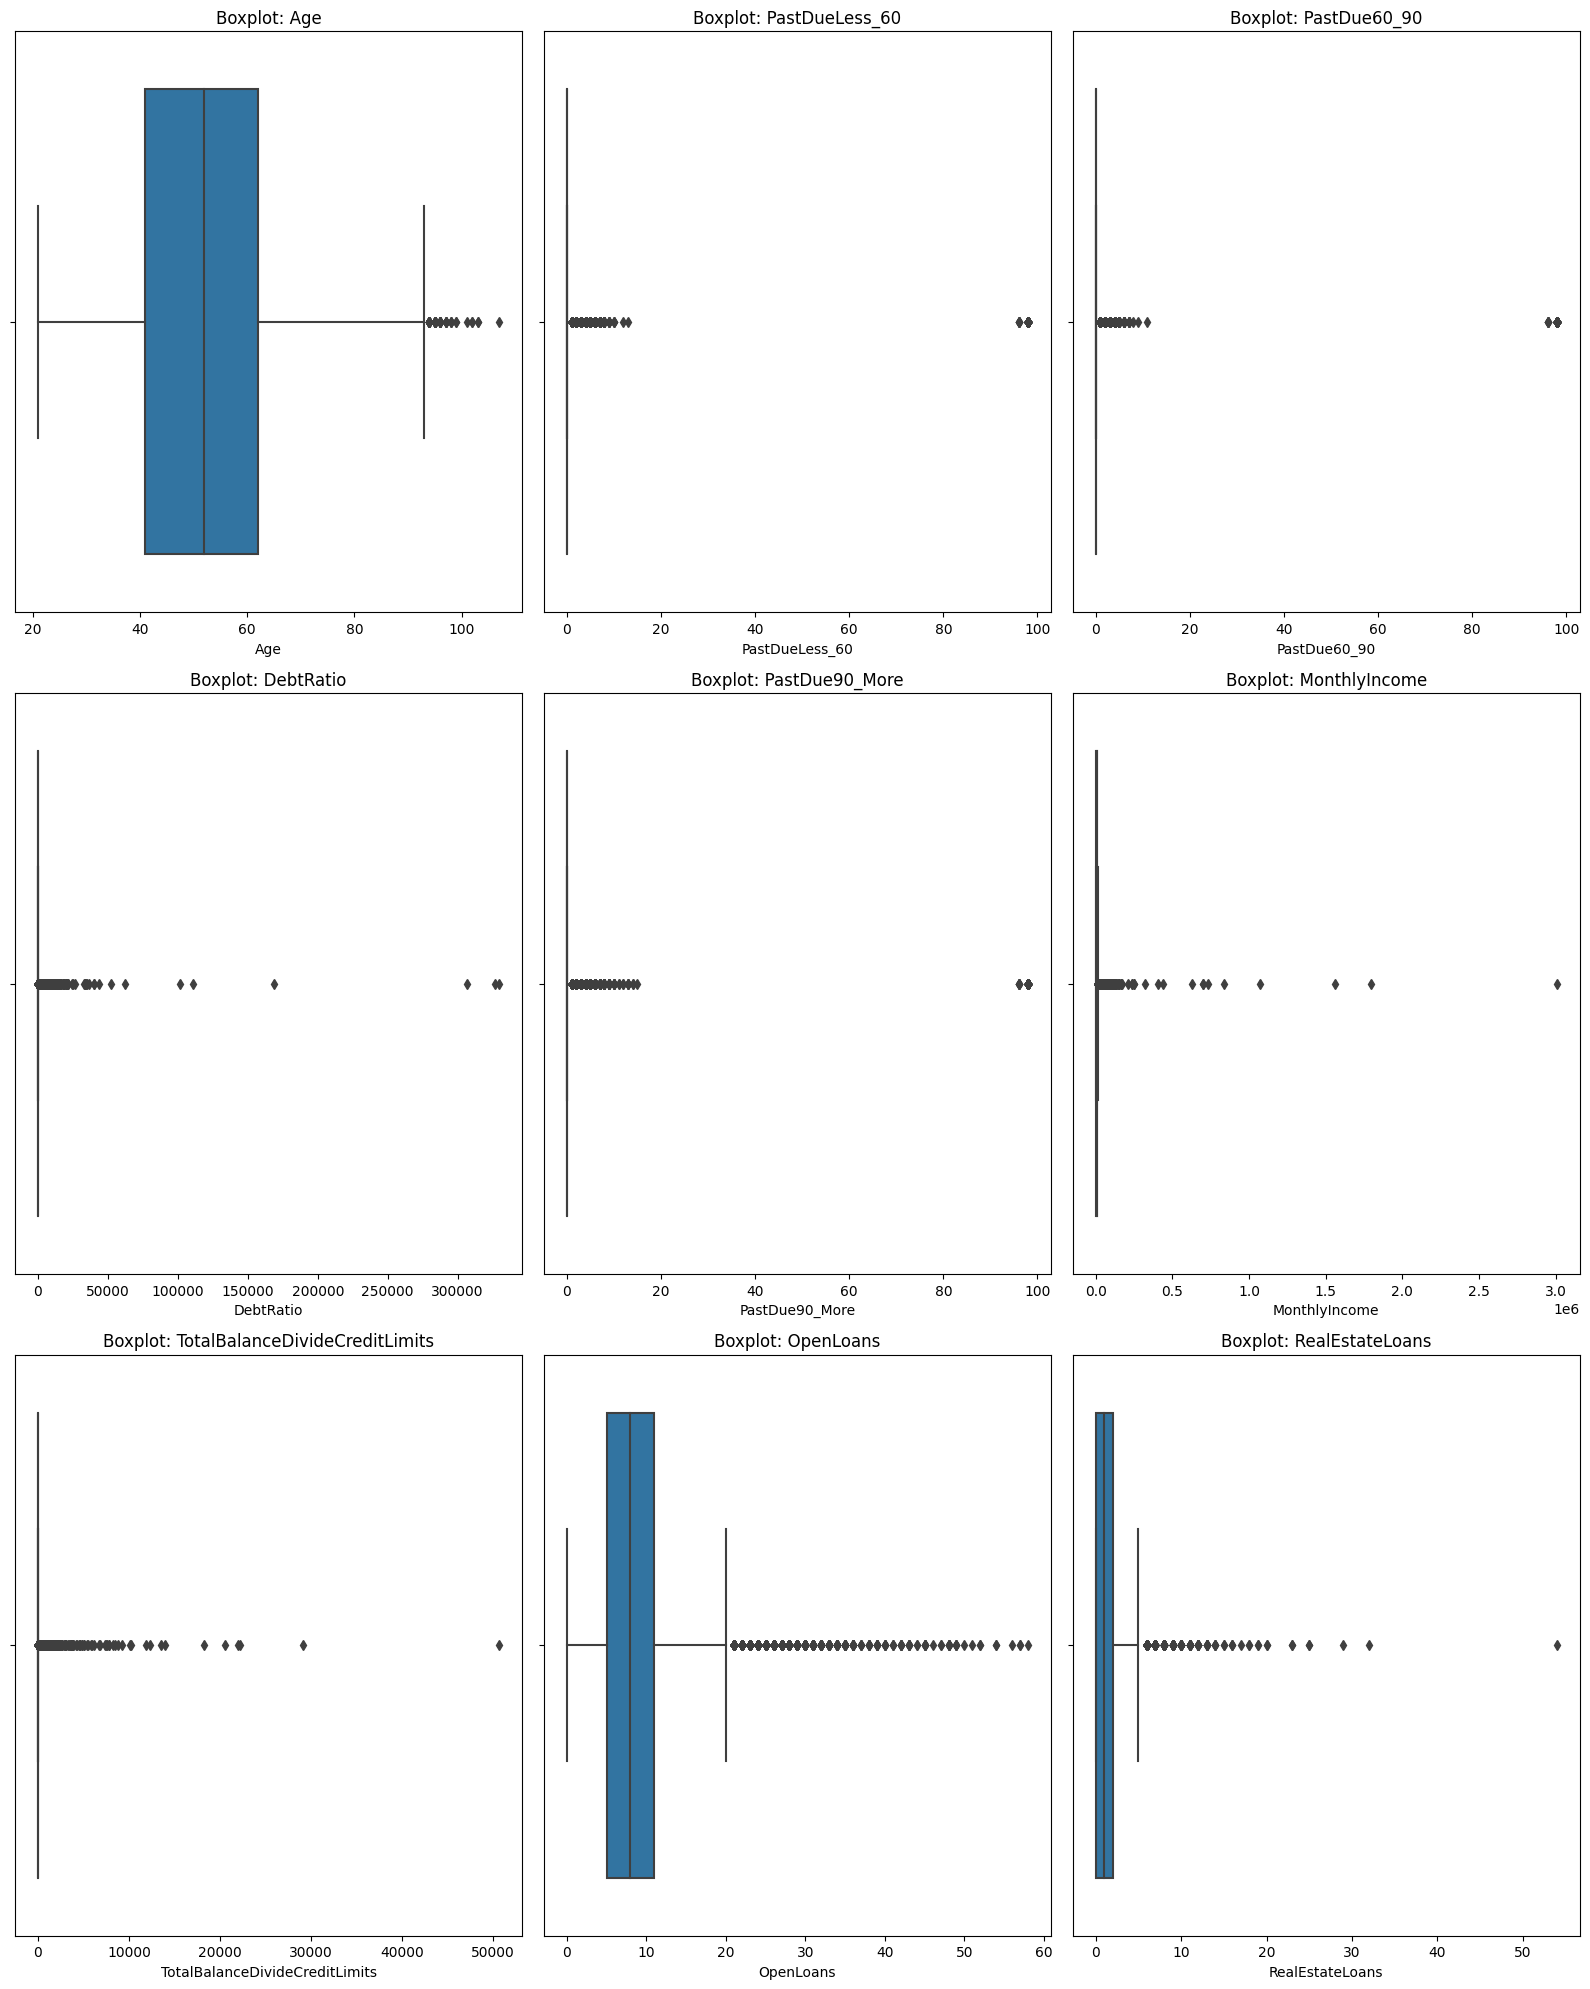

In [14]:
cols = [
    'Age', 'PastDueLess_60', 'PastDue60_90', 'DebtRatio', 'PastDue90_More',
    'MonthlyIncome', 'TotalBalanceDivideCreditLimits', 'OpenLoans', 'RealEstateLoans'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.tight_layout()

plt.show()

Удалим данные по 99 квантилю у непрерывных данных, бинарные данные не будем трогать, так как они могут быть важны

In [15]:
continuous_cols = ['DebtRatio', 'MonthlyIncome', 'TotalBalanceDivideCreditLimits']
for col in continuous_cols:
    upper_bound = train_data[col].quantile(0.99)
    train_data[col] = train_data[col].clip(upper=upper_bound)


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_36/1384168905.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


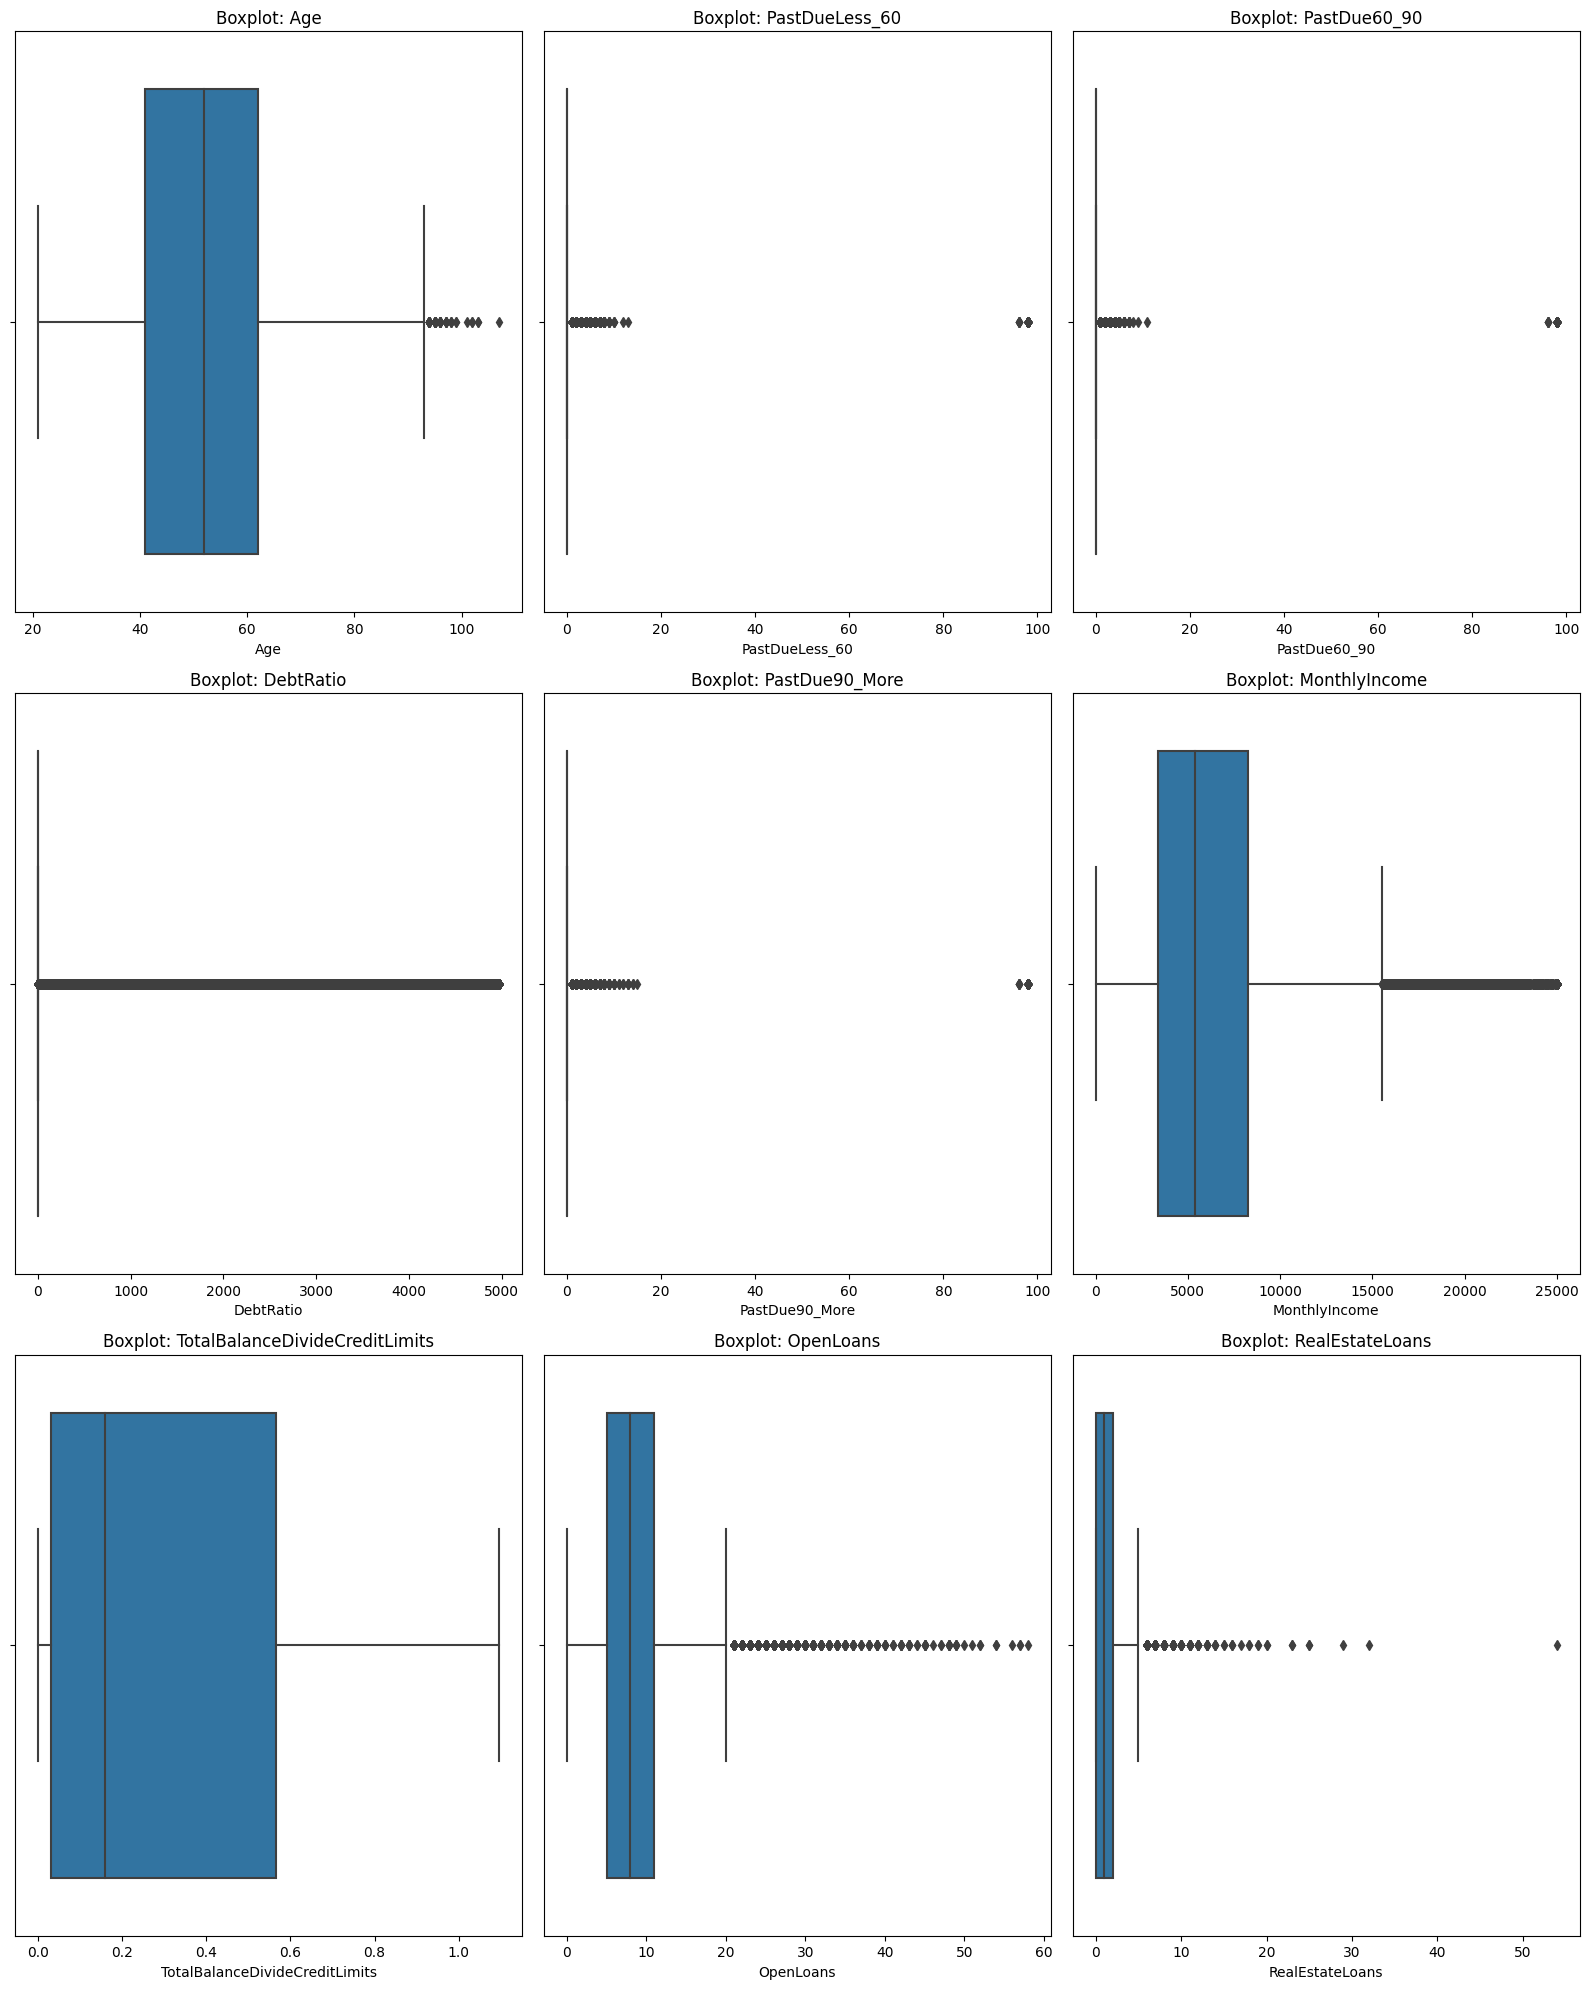

In [16]:
cols = [
    'Age', 'PastDueLess_60', 'PastDue60_90', 'DebtRatio', 'PastDue90_More',
    'MonthlyIncome', 'TotalBalanceDivideCreditLimits', 'OpenLoans', 'RealEstateLoans'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.tight_layout()

plt.show()

Перед заполнением пропусков, для начала посмотрим на распределения переменных MonthlyIncome и FamilySize

/tmp/ipykernel_36/981343950.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(median_val, inplace=True)
/tmp/ipykernel_36/981343950.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

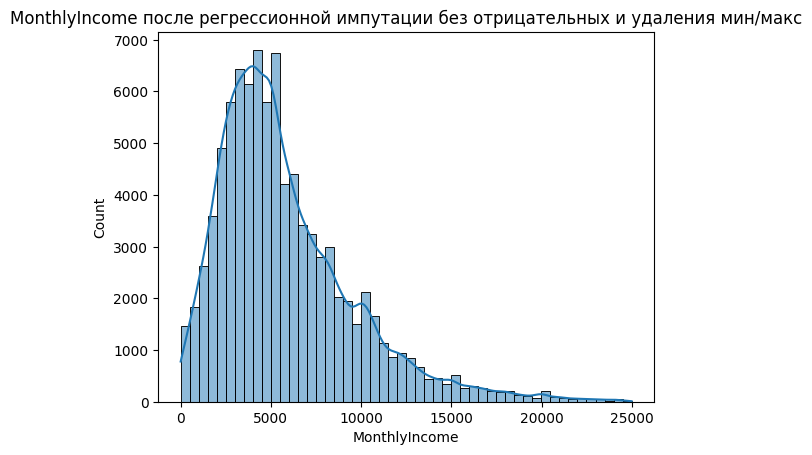

In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Разделяем на строки с доходом и без
train = train_data[train_data['MonthlyIncome'].notna()]
test = train_data[train_data['MonthlyIncome'].isna()]

# Создаем X и y
X_train = train.drop('MonthlyIncome', axis=1).copy()
y_train = train['MonthlyIncome'].copy()
X_test = test.drop('MonthlyIncome', axis=1).copy()

# Заполняем числовые признаки медианой
for col in X_train.select_dtypes(include=np.number).columns:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_test[col].fillna(median_val, inplace=True)

# Кодируем категориальные признаки
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Подгоняем колонки теста под train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# Заполняем пропуски
predicted_income = model.predict(X_test)

# Убираем отрицательные значения (clip)
predicted_income = np.clip(predicted_income, a_min=0, a_max=None)

train_data.loc[test.index, 'MonthlyIncome'] = predicted_income

# Удаляем строки с минимальным и максимальным MonthlyIncome
min_val = train_data['MonthlyIncome'].min()
max_val = train_data['MonthlyIncome'].max()
train_data = train_data[(train_data['MonthlyIncome'] != min_val) & 
                        (train_data['MonthlyIncome'] != max_val)]

# Проверяем распределение после импутации и удаления мин/макс
sns.histplot(train_data['MonthlyIncome'], bins=50, kde=True)
plt.title('MonthlyIncome после регрессионной импутации без отрицательных и удаления мин/макс')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


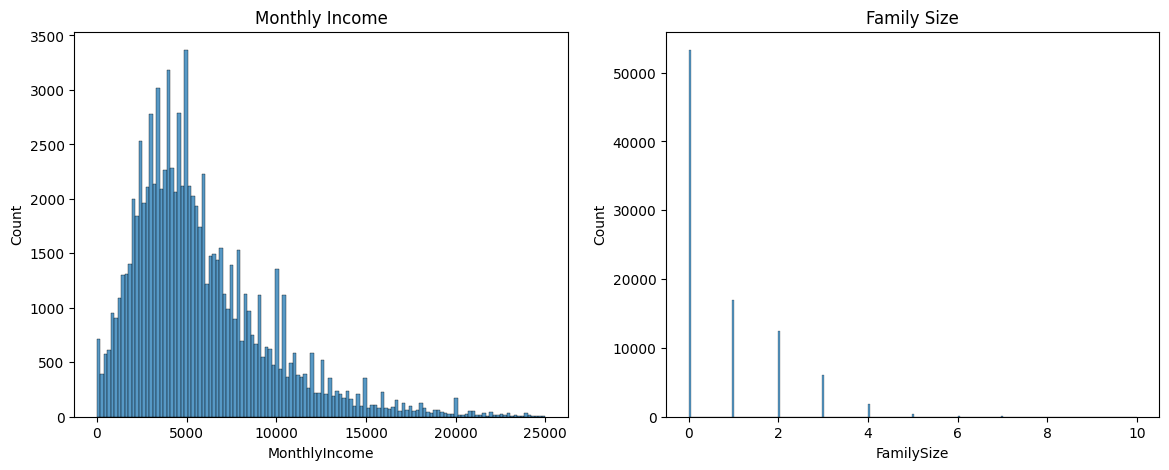

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=train_data, x='MonthlyIncome', ax=axes[0])
axes[0].set_title('Monthly Income')

sns.histplot(data=train_data, x='FamilySize', ax=axes[1])
axes[1].set_title('Family Size');

for col in ['MonthlyIncome']:
    for dataset in [train_data]:
        dataset[col] = np.log1p(dataset[col])

Хоть и распределение немного смещено, не будем логарифмировать месячный доход

# Feature Engineering

<Axes: >

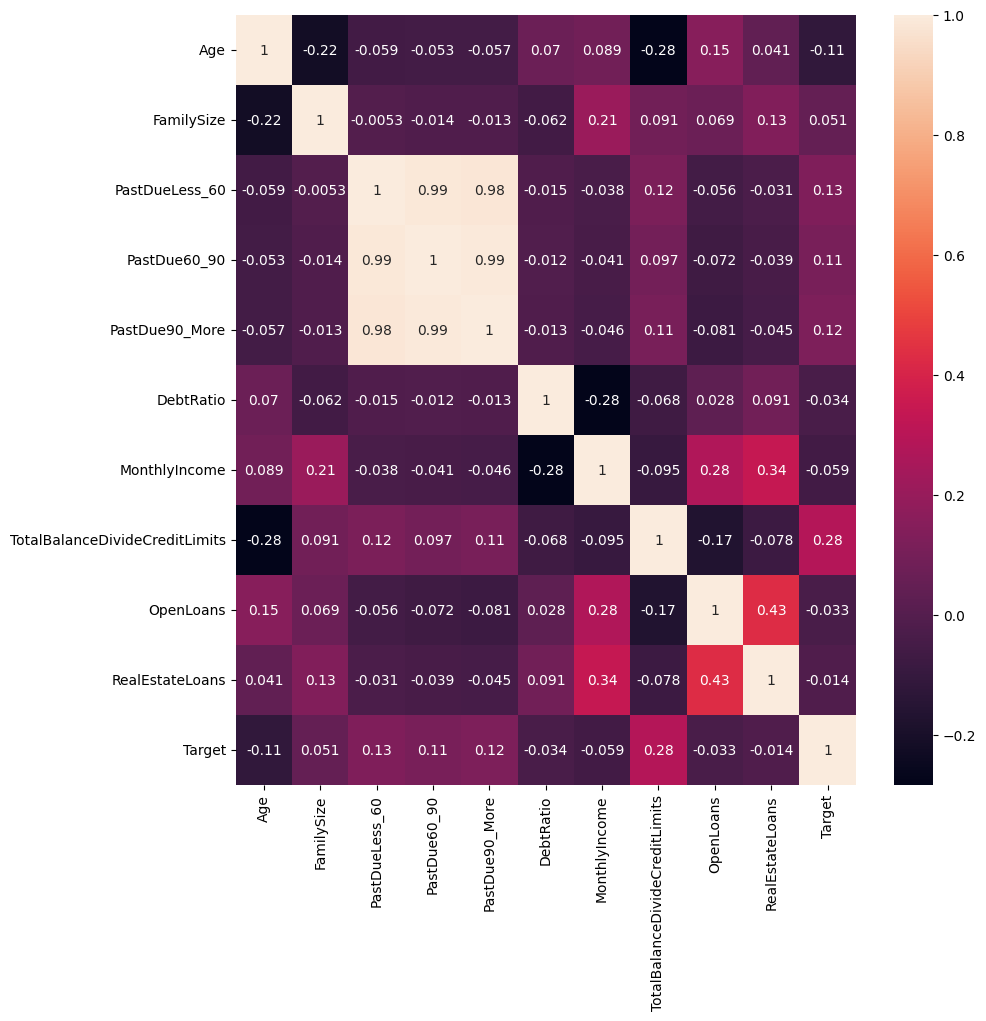

In [19]:
plt.figure(figsize=(10,10))
correlation_matrix = train_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

Сильной корреляции не наблюдается, удалять признаки не будем. Заполним пропуски

In [20]:
for dataset in [train_data]:
    dataset['FamilySize'] = dataset['FamilySize'].fillna(train_data['FamilySize'].median())
    dataset['DebtRatio'] = dataset['DebtRatio'].fillna(train_data['DebtRatio'].median())

Создадим новые признаки: общее число просрочек и бинарный признак есть ли просрочки

In [21]:
for dataset in [train_data]:
    # Соотношение долга к доходу
    dataset['Debt_to_Income'] = dataset['DebtRatio'] * dataset['MonthlyIncome']

    # Общее количество просрочек всех видов
    dataset['TotalPastDue'] = (
        dataset['PastDueLess_60'] + dataset['PastDue60_90'] + dataset['PastDue90_More']
    )

    # Индикатор наличия просрочек вообще
    dataset['HasPastDue'] = (dataset['TotalPastDue'] > 0).astype(int)

    # Среднее количество просрочек на открытую ссуду
    dataset['PastDue_per_Loan'] = dataset['TotalPastDue'] / (dataset['OpenLoans'] + 1)

    # Доход на члена семьи
    dataset['Income_per_FamilyMember'] = dataset['MonthlyIncome'] / (dataset['FamilySize'] + 1)

    # Баланс по кредитным картам на количество открытых кредитов
    dataset['Balance_per_Loan'] = dataset['TotalBalanceDivideCreditLimits'] / (dataset['OpenLoans'] + 1)

    # Наличие недвижимости (факт того, что есть хотя бы один кредит на недвижимость)
    dataset['HasRealEstateLoan'] = (dataset['RealEstateLoans'] > 0).astype(int)

    # Соотношение открытых кредитов к недвижимости
    dataset['OpenLoan_to_RealEstateLoan'] = dataset['OpenLoans'] / (dataset['RealEstateLoans'] + 1)

    # Инверсные признаки для устойчивости
    dataset['Income_inverse'] = 1 / (dataset['MonthlyIncome'] + 1)
    dataset['Age_inverse'] = 1 / (dataset['Age'] + 1)

for col in ['MonthlyIncome', 'Debt_to_Income', 'TotalBalanceDivideCreditLimits',
            'Balance_per_Loan', 'PastDue_per_Loan', 'Income_per_FamilyMember',
            'OpenLoan_to_RealEstateLoan']:
    for dataset in [train_data]:
        dataset[col] = np.log1p(dataset[col])


(-1.0, 4999.0)

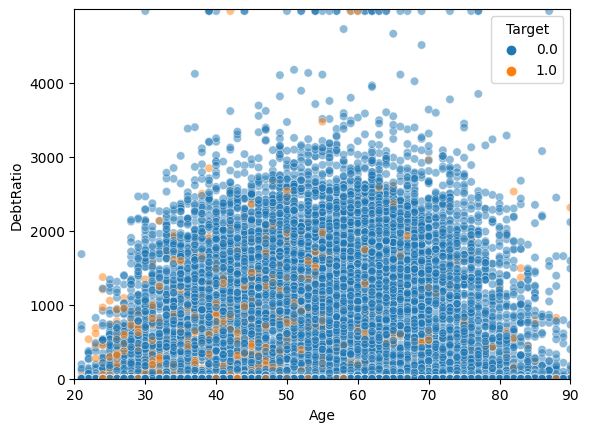

In [22]:
sns.scatterplot(data=train_data, x='Age', y='DebtRatio', hue = 'Target', alpha=0.5)
plt.xlim(20, 90)
plt.ylim(-1, 4999)

# Построение модели

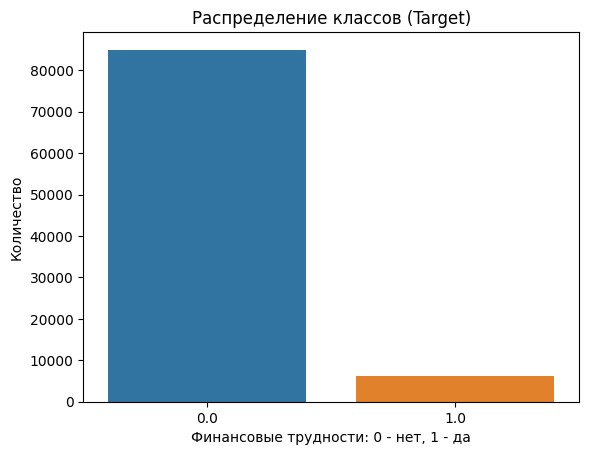

In [23]:
sns.countplot(x='Target', data=train_data)
plt.title('Распределение классов (Target)')
plt.xlabel('Финансовые трудности: 0 - нет, 1 - да')
plt.ylabel('Количество')
plt.show()

Стоит обратить внимание на то, что классы несбалансированы

Разделим тренировочные данные на тестовую и тренировочную выборку, чтобы узнать точность моделей.

In [44]:
from sklearn.model_selection import train_test_split

In [49]:
drop_cols = [
    'PastDueLess_60',
    'PastDue60_90',
    'PastDue90_More',
    'OpenLoans',
    'RealEstateLoans',
    'Income_inverse',
    'HasPastDue',
    'HasRealEstateLoan',
    'Age_inverse'
]

X = train_data.drop(['Target'] + drop_cols, axis=1)
y = train_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Обучение моделей

Сделаем пайплайн для наших моделей. Стандартизируем признаки для тех моделей, где это необходимо и подберем лучшие гиперпараметры

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

Так как наилучший результат показал градиентный бустинг используем другие более расишренные библиотеки для построения модели и подбора гиперпараметров

In [26]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Определим функцию для оптимизации гиперпараметров с использованием Optuna
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'device': 'gpu',  # включаем GPU
        'num_leaves': trial.suggest_int('num_leaves', 31, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-5, 10, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-5, 10, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }



    model = lgb.LGBMClassifier(**param)

    # Обучаем модель
    model.fit(X_train, y_train)

    # Предсказания на тестовых данных
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Метрики
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Оптимизируем модель по ROC AUC
    return roc_auc

# Запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

print("Best hyperparameters:", study.best_params)

# Лучшие параметры
best_params = study.best_params
# Строим модель с лучшими гиперпараметрами
best_model = lgb.LGBMClassifier(**best_params)
# Обучаем финальную модель на всех данных
best_model.fit(X, y)

# Оценка модели на тестовых данных
y_pred_final = best_model.predict(X_test)
y_prob_final = best_model.predict_proba(X_test)[:, 1]
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_prob_final)

print("Final F1 Score:", final_f1)
print("Final ROC AUC:", final_roc_auc)


[I 2025-09-21 06:55:43,573] A new study created in memory with name: no-name-7daade4d-9248-4288-b9a4-42342283fe4d
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l2 is set=0.0001085710302947931, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001085710302947931
[LightGBM] [Warning] lambda_l1 is set=0.1138953104711672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1138953104711672
[LightGBM] [Warning] lambda_l2 is set=0.0001085710302947931, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001085710302947931
[LightGBM] [Warning] lambda_l1 is set=0.1138953104711672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1138953104711672
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (0.73 MB) transferred to GPU in 0.001231 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] lambda_l2 is set=0.0001085710302947931, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001085710302947931
[LightGBM] [Warning] lambda_l1 is set=0.1138953104711672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1138953104711672
[LightGBM] [Warning] lambda_l2 is set=0.0001085710302947931, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001085710302947931
[LightGBM] [Warning] lambda_l1 is set=0.1138953104711672, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1138953104711672


[I 2025-09-21 06:55:52,124] Trial 0 finished with value: 0.8584410733008536 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 203, 'max_depth': 14, 'learning_rate': 7.205252853109242e-05, 'n_estimators': 183, 'subsample': 0.7669062335026713, 'colsample_bytree': 0.5848556324492522, 'min_child_samples': 61, 'lambda_l1': 0.1138953104711672, 'lambda_l2': 0.0001085710302947931, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8584410733008536.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugges

[LightGBM] [Warning] lambda_l2 is set=0.000743130994640809, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000743130994640809
[LightGBM] [Warning] lambda_l1 is set=0.00015043189495131517, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015043189495131517
[LightGBM] [Warning] lambda_l2 is set=0.000743130994640809, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000743130994640809
[LightGBM] [Warning] lambda_l1 is set=0.00015043189495131517, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015043189495131517
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 06:55:57,298] Trial 1 finished with value: 0.8602798467129912 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 50, 'max_depth': 13, 'learning_rate': 0.025855144292797387, 'n_estimators': 604, 'subsample': 0.605816664182576, 'colsample_bytree': 0.839845752981103, 'min_child_samples': 12, 'lambda_l1': 0.00015043189495131517, 'lambda_l2': 0.000743130994640809, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8602798467129912.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest

[LightGBM] [Warning] lambda_l2 is set=1.8026677648760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8026677648760168e-05
[LightGBM] [Warning] lambda_l1 is set=0.04092035061076344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04092035061076344
[LightGBM] [Warning] lambda_l2 is set=1.8026677648760168e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8026677648760168e-05
[LightGBM] [Warning] lambda_l1 is set=0.04092035061076344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04092035061076344
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 06:55:59,686] Trial 2 finished with value: 0.8508469997199652 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 197, 'max_depth': 4, 'learning_rate': 5.483190170934413e-05, 'n_estimators': 547, 'subsample': 0.5826415876446693, 'colsample_bytree': 0.8173943775362178, 'min_child_samples': 74, 'lambda_l1': 0.04092035061076344, 'lambda_l2': 1.8026677648760168e-05, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8602798467129912.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugge

[LightGBM] [Warning] lambda_l2 is set=0.9073212981069486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9073212981069486
[LightGBM] [Warning] lambda_l1 is set=2.73911814782983e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.73911814782983e-05
[LightGBM] [Warning] lambda_l2 is set=0.9073212981069486, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9073212981069486
[LightGBM] [Warning] lambda_l1 is set=2.73911814782983e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.73911814782983e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 06:56:15,414] Trial 3 finished with value: 0.8605200281424965 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 250, 'max_depth': 8, 'learning_rate': 0.0015265628159602013, 'n_estimators': 810, 'subsample': 0.581659584507859, 'colsample_bytree': 0.8526173916781923, 'min_child_samples': 9, 'lambda_l1': 2.73911814782983e-05, 'lambda_l2': 0.9073212981069486, 'class_weight': None}. Best is trial 3 with value: 0.8605200281424965.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform(

[LightGBM] [Warning] lambda_l2 is set=0.004191779480578285, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004191779480578285
[LightGBM] [Warning] lambda_l1 is set=2.253415889829413, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.253415889829413
[LightGBM] [Warning] lambda_l2 is set=0.004191779480578285, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004191779480578285
[LightGBM] [Warning] lambda_l1 is set=2.253415889829413, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.253415889829413
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 06:57:32,736] Trial 4 finished with value: 0.8611095341460777 and parameters: {'boosting_type': 'dart', 'num_leaves': 124, 'max_depth': 15, 'learning_rate': 0.012558088401586169, 'n_estimators': 813, 'subsample': 0.6725449855294312, 'colsample_bytree': 0.535783494949176, 'min_child_samples': 68, 'lambda_l1': 2.253415889829413, 'lambda_l2': 0.004191779480578285, 'class_weight': 'balanced'}. Best is trial 4 with value: 0.8611095341460777.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.000743089252986455, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000743089252986455
[LightGBM] [Warning] lambda_l1 is set=1.6521392353640798e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6521392353640798e-05
[LightGBM] [Warning] lambda_l2 is set=0.000743089252986455, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000743089252986455
[LightGBM] [Warning] lambda_l1 is set=1.6521392353640798e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6521392353640798e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 06:59:05,547] Trial 5 finished with value: 0.8227110577818011 and parameters: {'boosting_type': 'dart', 'num_leaves': 235, 'max_depth': 12, 'learning_rate': 8.174974866492746e-05, 'n_estimators': 816, 'subsample': 0.8317052464297499, 'colsample_bytree': 0.9916192279691796, 'min_child_samples': 7, 'lambda_l1': 1.6521392353640798e-05, 'lambda_l2': 0.000743089252986455, 'class_weight': 'balanced'}. Best is trial 4 with value: 0.8611095341460777.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugg

[LightGBM] [Warning] lambda_l2 is set=0.0032630442331261556, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0032630442331261556
[LightGBM] [Warning] lambda_l1 is set=0.00013330873543384805, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013330873543384805
[LightGBM] [Warning] lambda_l2 is set=0.0032630442331261556, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0032630442331261556
[LightGBM] [Warning] lambda_l1 is set=0.00013330873543384805, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013330873543384805
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 06:59:09,865] Trial 6 finished with value: 0.8614171817871223 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 239, 'max_depth': 5, 'learning_rate': 0.041076453182604424, 'n_estimators': 768, 'subsample': 0.7527970698877163, 'colsample_bytree': 0.53434469994396, 'min_child_samples': 75, 'lambda_l1': 0.00013330873543384805, 'lambda_l2': 0.0032630442331261556, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugges

[LightGBM] [Warning] lambda_l2 is set=3.951972426945153e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.951972426945153e-05
[LightGBM] [Warning] lambda_l1 is set=0.0008912226350155616, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008912226350155616
[LightGBM] [Warning] lambda_l2 is set=3.951972426945153e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.951972426945153e-05
[LightGBM] [Warning] lambda_l1 is set=0.0008912226350155616, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008912226350155616
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 06:59:25,734] Trial 7 finished with value: 0.845775930733345 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 196, 'max_depth': 11, 'learning_rate': 0.0334908455873849, 'n_estimators': 861, 'subsample': 0.518164716981, 'colsample_bytree': 0.8712720388452462, 'min_child_samples': 60, 'lambda_l1': 0.0008912226350155616, 'lambda_l2': 3.951972426945153e-05, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=1.6760403439515955e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6760403439515955e-05
[LightGBM] [Warning] lambda_l1 is set=1.8525474846983239, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8525474846983239
[LightGBM] [Warning] lambda_l2 is set=1.6760403439515955e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6760403439515955e-05
[LightGBM] [Warning] lambda_l1 is set=1.8525474846983239, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8525474846983239
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 06:59:33,079] Trial 8 finished with value: 0.8556794213315009 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'max_depth': 15, 'learning_rate': 2.652356239583082e-05, 'n_estimators': 929, 'subsample': 0.6866471918242393, 'colsample_bytree': 0.7865358447065696, 'min_child_samples': 12, 'lambda_l1': 1.8525474846983239, 'lambda_l2': 1.6760403439515955e-05, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugges

[LightGBM] [Warning] lambda_l2 is set=0.008104759045749657, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008104759045749657
[LightGBM] [Warning] lambda_l1 is set=0.019615060908741922, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019615060908741922
[LightGBM] [Warning] lambda_l2 is set=0.008104759045749657, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008104759045749657
[LightGBM] [Warning] lambda_l1 is set=0.019615060908741922, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019615060908741922
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:00:18,864] Trial 9 finished with value: 0.8514776355462594 and parameters: {'boosting_type': 'dart', 'num_leaves': 235, 'max_depth': 11, 'learning_rate': 0.00014735404588362406, 'n_estimators': 523, 'subsample': 0.7210013809467122, 'colsample_bytree': 0.8459091581677611, 'min_child_samples': 41, 'lambda_l1': 0.019615060908741922, 'lambda_l2': 0.008104759045749657, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugg

[LightGBM] [Warning] lambda_l2 is set=0.20593153102745257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20593153102745257
[LightGBM] [Warning] lambda_l1 is set=0.0012470484726454418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012470484726454418
[LightGBM] [Warning] lambda_l2 is set=0.20593153102745257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20593153102745257
[LightGBM] [Warning] lambda_l1 is set=0.0012470484726454418, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012470484726454418
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:00:29,447] Trial 10 finished with value: 0.8595113819972298 and parameters: {'boosting_type': 'dart', 'num_leaves': 133, 'max_depth': 0, 'learning_rate': 0.003055154645256376, 'n_estimators': 261, 'subsample': 0.9954503989746143, 'colsample_bytree': 0.6876732763106784, 'min_child_samples': 97, 'lambda_l1': 0.0012470484726454418, 'lambda_l2': 0.20593153102745257, 'class_weight': None}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.052969771745466965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.052969771745466965
[LightGBM] [Warning] lambda_l1 is set=8.84875605797322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.84875605797322
[LightGBM] [Warning] lambda_l2 is set=0.052969771745466965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.052969771745466965
[LightGBM] [Warning] lambda_l1 is set=8.84875605797322, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.84875605797322
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:00:51,316] Trial 11 finished with value: 0.8529793997302982 and parameters: {'boosting_type': 'dart', 'num_leaves': 116, 'max_depth': 5, 'learning_rate': 0.006304858721187461, 'n_estimators': 678, 'subsample': 0.8674383817847593, 'colsample_bytree': 0.5145386251815227, 'min_child_samples': 86, 'lambda_l1': 8.84875605797322, 'lambda_l2': 0.052969771745466965, 'class_weight': None}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform(

[LightGBM] [Warning] lambda_l2 is set=0.006916722015862221, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006916722015862221
[LightGBM] [Warning] lambda_l1 is set=0.38776200224481006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.38776200224481006
[LightGBM] [Warning] lambda_l2 is set=0.006916722015862221, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006916722015862221
[LightGBM] [Warning] lambda_l1 is set=0.38776200224481006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.38776200224481006
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:02:16,639] Trial 12 finished with value: 0.8492168255260476 and parameters: {'boosting_type': 'dart', 'num_leaves': 94, 'max_depth': 8, 'learning_rate': 0.09155076249023429, 'n_estimators': 998, 'subsample': 0.6852256436185096, 'colsample_bytree': 0.6336185653019397, 'min_child_samples': 38, 'lambda_l1': 0.38776200224481006, 'lambda_l2': 0.006916722015862221, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.0016465054525129292, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0016465054525129292
[LightGBM] [Warning] lambda_l1 is set=0.0032699602320589456, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032699602320589456
[LightGBM] [Warning] lambda_l2 is set=0.0016465054525129292, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0016465054525129292
[LightGBM] [Warning] lambda_l1 is set=0.0032699602320589456, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032699602320589456
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:02:19,812] Trial 13 finished with value: 0.8381895381522123 and parameters: {'boosting_type': 'dart', 'num_leaves': 163, 'max_depth': 1, 'learning_rate': 0.012092217103326947, 'n_estimators': 389, 'subsample': 0.8009392229900136, 'colsample_bytree': 0.5079678725256431, 'min_child_samples': 77, 'lambda_l1': 0.0032699602320589456, 'lambda_l2': 0.0016465054525129292, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugg

[LightGBM] [Warning] lambda_l2 is set=0.05291935461803039, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05291935461803039
[LightGBM] [Warning] lambda_l1 is set=0.00019937446373664475, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019937446373664475
[LightGBM] [Warning] lambda_l2 is set=0.05291935461803039, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.05291935461803039
[LightGBM] [Warning] lambda_l1 is set=0.00019937446373664475, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00019937446373664475
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:02:24,382] Trial 14 finished with value: 0.855628153876429 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 85, 'max_depth': 5, 'learning_rate': 0.0007324875282337583, 'n_estimators': 717, 'subsample': 0.8765480584049671, 'colsample_bytree': 0.6151483046524489, 'min_child_samples': 44, 'lambda_l1': 0.00019937446373664475, 'lambda_l2': 0.05291935461803039, 'class_weight': None}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=2.7330168704309417, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7330168704309417
[LightGBM] [Warning] lambda_l1 is set=0.4121918693881704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4121918693881704
[LightGBM] [Warning] lambda_l2 is set=2.7330168704309417, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7330168704309417
[LightGBM] [Warning] lambda_l1 is set=0.4121918693881704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4121918693881704
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:02:24,864] Trial 15 finished with value: 0.8512860718414634 and parameters: {'boosting_type': 'dart', 'num_leaves': 159, 'max_depth': 2, 'learning_rate': 0.09396733618475644, 'n_estimators': 52, 'subsample': 0.6449331264324154, 'colsample_bytree': 0.709677102248268, 'min_child_samples': 69, 'lambda_l1': 0.4121918693881704, 'lambda_l2': 2.7330168704309417, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00021092012477635547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021092012477635547
[LightGBM] [Warning] lambda_l1 is set=0.004356088569230904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004356088569230904
[LightGBM] [Warning] lambda_l2 is set=0.00021092012477635547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021092012477635547
[LightGBM] [Warning] lambda_l1 is set=0.004356088569230904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004356088569230904
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:03:15,399] Trial 16 finished with value: 0.8587366523319472 and parameters: {'boosting_type': 'dart', 'num_leaves': 75, 'max_depth': 7, 'learning_rate': 0.00047408427488011286, 'n_estimators': 709, 'subsample': 0.9284352921849901, 'colsample_bytree': 0.5629672596576742, 'min_child_samples': 93, 'lambda_l1': 0.004356088569230904, 'lambda_l2': 0.00021092012477635547, 'class_weight': 'balanced'}. Best is trial 6 with value: 0.8614171817871223.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sug

[LightGBM] [Warning] lambda_l2 is set=0.03643426412123303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03643426412123303
[LightGBM] [Warning] lambda_l1 is set=6.977333787092614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.977333787092614
[LightGBM] [Warning] lambda_l2 is set=0.03643426412123303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03643426412123303
[LightGBM] [Warning] lambda_l1 is set=6.977333787092614, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.977333787092614
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:03:22,268] Trial 17 finished with value: 0.8624766019154095 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 127, 'max_depth': 9, 'learning_rate': 0.01096016247069587, 'n_estimators': 440, 'subsample': 0.7558676477403734, 'colsample_bytree': 0.6705506686785971, 'min_child_samples': 29, 'lambda_l1': 6.977333787092614, 'lambda_l2': 0.03643426412123303, 'class_weight': 'balanced'}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.03835664393128963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03835664393128963
[LightGBM] [Warning] lambda_l1 is set=0.0002499861695181972, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002499861695181972
[LightGBM] [Warning] lambda_l2 is set=0.03835664393128963, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03835664393128963
[LightGBM] [Warning] lambda_l1 is set=0.0002499861695181972, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002499861695181972
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:03:29,818] Trial 18 finished with value: 0.8618216035884944 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 163, 'max_depth': 9, 'learning_rate': 0.0039255708604632195, 'n_estimators': 435, 'subsample': 0.7340493278966601, 'colsample_bytree': 0.6648884397751229, 'min_child_samples': 25, 'lambda_l1': 0.0002499861695181972, 'lambda_l2': 0.03835664393128963, 'class_weight': None}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.09906992650553045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09906992650553045
[LightGBM] [Warning] lambda_l1 is set=0.0005810770737738364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005810770737738364
[LightGBM] [Warning] lambda_l2 is set=0.09906992650553045, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09906992650553045
[LightGBM] [Warning] lambda_l1 is set=0.0005810770737738364, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005810770737738364
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:03:37,235] Trial 19 finished with value: 0.8615570167477549 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 161, 'max_depth': 10, 'learning_rate': 0.0035514465756297836, 'n_estimators': 420, 'subsample': 0.7961080022148659, 'colsample_bytree': 0.677845749818663, 'min_child_samples': 26, 'lambda_l1': 0.0005810770737738364, 'lambda_l2': 0.09906992650553045, 'class_weight': None}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.4019741293061467, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4019741293061467
[LightGBM] [Warning] lambda_l1 is set=0.00917997693296588, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00917997693296588
[LightGBM] [Warning] lambda_l2 is set=0.4019741293061467, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.4019741293061467
[LightGBM] [Warning] lambda_l1 is set=0.00917997693296588, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00917997693296588
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:03:42,050] Trial 20 finished with value: 0.858175638975504 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 103, 'max_depth': 9, 'learning_rate': 0.00039679304842302904, 'n_estimators': 380, 'subsample': 0.7424274470675999, 'colsample_bytree': 0.7559695890560685, 'min_child_samples': 25, 'lambda_l1': 0.00917997693296588, 'lambda_l2': 0.4019741293061467, 'class_weight': None}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.027404418244616816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.027404418244616816
[LightGBM] [Warning] lambda_l1 is set=0.0006814705662153012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006814705662153012
[LightGBM] [Warning] lambda_l2 is set=0.027404418244616816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.027404418244616816
[LightGBM] [Warning] lambda_l1 is set=0.0006814705662153012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006814705662153012
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:03:49,660] Trial 21 finished with value: 0.8613814801569739 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 157, 'max_depth': 10, 'learning_rate': 0.003071501285836644, 'n_estimators': 441, 'subsample': 0.7969531473966159, 'colsample_bytree': 0.6793929438272704, 'min_child_samples': 26, 'lambda_l1': 0.0006814705662153012, 'lambda_l2': 0.027404418244616816, 'class_weight': None}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.1517293115759363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1517293115759363
[LightGBM] [Warning] lambda_l1 is set=0.00043522337188111763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00043522337188111763
[LightGBM] [Warning] lambda_l2 is set=0.1517293115759363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1517293115759363
[LightGBM] [Warning] lambda_l1 is set=0.00043522337188111763, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00043522337188111763
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:03:53,111] Trial 22 finished with value: 0.8606183470848976 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 185, 'max_depth': 7, 'learning_rate': 0.002848800745183983, 'n_estimators': 280, 'subsample': 0.8346313963924246, 'colsample_bytree': 0.6493201163192094, 'min_child_samples': 23, 'lambda_l1': 0.00043522337188111763, 'lambda_l2': 0.1517293115759363, 'class_weight': None}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.036631739195109064, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.036631739195109064
[LightGBM] [Warning] lambda_l1 is set=3.7637082393983304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7637082393983304e-05
[LightGBM] [Warning] lambda_l2 is set=0.036631739195109064, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.036631739195109064
[LightGBM] [Warning] lambda_l1 is set=3.7637082393983304e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7637082393983304e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:04:01,133] Trial 23 finished with value: 0.8624371777895696 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 138, 'max_depth': 10, 'learning_rate': 0.009401790248214468, 'n_estimators': 478, 'subsample': 0.7102902994250526, 'colsample_bytree': 0.7300266026853544, 'min_child_samples': 35, 'lambda_l1': 3.7637082393983304e-05, 'lambda_l2': 0.036631739195109064, 'class_weight': None}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=0.020911162143588534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020911162143588534
[LightGBM] [Warning] lambda_l1 is set=4.294647065788495e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.294647065788495e-05
[LightGBM] [Warning] lambda_l2 is set=0.020911162143588534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.020911162143588534
[LightGBM] [Warning] lambda_l1 is set=4.294647065788495e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.294647065788495e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:04:09,363] Trial 24 finished with value: 0.8617244539603021 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 142, 'max_depth': 9, 'learning_rate': 0.008420590068138046, 'n_estimators': 509, 'subsample': 0.6274566494174357, 'colsample_bytree': 0.7360218289672522, 'min_child_samples': 33, 'lambda_l1': 4.294647065788495e-05, 'lambda_l2': 0.020911162143588534, 'class_weight': None}. Best is trial 17 with value: 0.8624766019154095.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=5.916054639683436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.916054639683436
[LightGBM] [Warning] lambda_l1 is set=1.15272976042611e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.15272976042611e-05
[LightGBM] [Warning] lambda_l2 is set=5.916054639683436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.916054639683436
[LightGBM] [Warning] lambda_l1 is set=1.15272976042611e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.15272976042611e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:04:15,873] Trial 25 finished with value: 0.8625047620052954 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 176, 'max_depth': 13, 'learning_rate': 0.02077622085450671, 'n_estimators': 317, 'subsample': 0.7176081808917074, 'colsample_bytree': 0.9077991566860755, 'min_child_samples': 46, 'lambda_l1': 1.15272976042611e-05, 'lambda_l2': 5.916054639683436, 'class_weight': None}. Best is trial 25 with value: 0.8625047620052954.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=9.406206351821009, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.406206351821009
[LightGBM] [Warning] lambda_l1 is set=6.565520289223399e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.565520289223399e-05
[LightGBM] [Warning] lambda_l2 is set=9.406206351821009, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.406206351821009
[LightGBM] [Warning] lambda_l1 is set=6.565520289223399e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.565520289223399e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:04:21,910] Trial 26 finished with value: 0.8634984967124892 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 180, 'max_depth': 13, 'learning_rate': 0.01983053873427714, 'n_estimators': 298, 'subsample': 0.714415669457939, 'colsample_bytree': 0.9241897987331035, 'min_child_samples': 50, 'lambda_l1': 6.565520289223399e-05, 'lambda_l2': 9.406206351821009, 'class_weight': None}. Best is trial 26 with value: 0.8634984967124892.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=9.293341980626314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.293341980626314
[LightGBM] [Warning] lambda_l1 is set=1.1024936487696672e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1024936487696672e-05
[LightGBM] [Warning] lambda_l2 is set=9.293341980626314, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.293341980626314
[LightGBM] [Warning] lambda_l1 is set=1.1024936487696672e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1024936487696672e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:04:28,156] Trial 27 finished with value: 0.8635015862766366 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 179, 'max_depth': 13, 'learning_rate': 0.019711797650226737, 'n_estimators': 303, 'subsample': 0.6528073016674119, 'colsample_bytree': 0.9198346063202361, 'min_child_samples': 50, 'lambda_l1': 1.1024936487696672e-05, 'lambda_l2': 9.293341980626314, 'class_weight': None}. Best is trial 27 with value: 0.8635015862766366.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=9.357367209916436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.357367209916436
[LightGBM] [Warning] lambda_l1 is set=1.0203842586909241e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0203842586909241e-05
[LightGBM] [Warning] lambda_l2 is set=9.357367209916436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.357367209916436
[LightGBM] [Warning] lambda_l1 is set=1.0203842586909241e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0203842586909241e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:04:34,487] Trial 28 finished with value: 0.8635460309442162 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 211, 'max_depth': 13, 'learning_rate': 0.022105376541334577, 'n_estimators': 290, 'subsample': 0.5519001596707668, 'colsample_bytree': 0.9228562567993, 'min_child_samples': 50, 'lambda_l1': 1.0203842586909241e-05, 'lambda_l2': 9.357367209916436, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=8.398906659225908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.398906659225908
[LightGBM] [Warning] lambda_l1 is set=6.1007878780472206e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.1007878780472206e-05
[LightGBM] [Warning] lambda_l2 is set=8.398906659225908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.398906659225908
[LightGBM] [Warning] lambda_l1 is set=6.1007878780472206e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.1007878780472206e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:04:38,543] Trial 29 finished with value: 0.8617178886364887 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 216, 'max_depth': 14, 'learning_rate': 0.05484831244906808, 'n_estimators': 177, 'subsample': 0.5201836526006609, 'colsample_bytree': 0.9548381963492389, 'min_child_samples': 51, 'lambda_l1': 6.1007878780472206e-05, 'lambda_l2': 8.398906659225908, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=1.7258642897732623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7258642897732623
[LightGBM] [Warning] lambda_l1 is set=1.011792989321683e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.011792989321683e-05
[LightGBM] [Warning] lambda_l2 is set=1.7258642897732623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7258642897732623
[LightGBM] [Warning] lambda_l1 is set=1.011792989321683e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.011792989321683e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:04:42,541] Trial 30 finished with value: 0.8598978564346482 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 218, 'max_depth': 13, 'learning_rate': 0.02292017605334939, 'n_estimators': 169, 'subsample': 0.5608400204530627, 'colsample_bytree': 0.9208286402440091, 'min_child_samples': 56, 'lambda_l1': 1.011792989321683e-05, 'lambda_l2': 1.7258642897732623, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=9.606930409048553, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.606930409048553
[LightGBM] [Warning] lambda_l1 is set=1.125668103013436e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.125668103013436e-05
[LightGBM] [Warning] lambda_l2 is set=9.606930409048553, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.606930409048553
[LightGBM] [Warning] lambda_l1 is set=1.125668103013436e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.125668103013436e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:04:48,811] Trial 31 finished with value: 0.8634739840247219 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 184, 'max_depth': 14, 'learning_rate': 0.018252461898121904, 'n_estimators': 294, 'subsample': 0.6531767787498333, 'colsample_bytree': 0.8997106415348723, 'min_child_samples': 48, 'lambda_l1': 1.125668103013436e-05, 'lambda_l2': 9.606930409048553, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=3.779401955954367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.779401955954367
[LightGBM] [Warning] lambda_l1 is set=9.127033452718093e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.127033452718093e-05
[LightGBM] [Warning] lambda_l2 is set=3.779401955954367, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.779401955954367
[LightGBM] [Warning] lambda_l1 is set=9.127033452718093e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.127033452718093e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:04:51,489] Trial 32 finished with value: 0.8626708904441412 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 213, 'max_depth': 14, 'learning_rate': 0.053353584821396904, 'n_estimators': 118, 'subsample': 0.6341437328682709, 'colsample_bytree': 0.8999694101617565, 'min_child_samples': 50, 'lambda_l1': 9.127033452718093e-05, 'lambda_l2': 3.779401955954367, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=1.0138539114436402, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0138539114436402
[LightGBM] [Warning] lambda_l1 is set=2.3836998565492823e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3836998565492823e-05
[LightGBM] [Warning] lambda_l2 is set=1.0138539114436402, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0138539114436402
[LightGBM] [Warning] lambda_l1 is set=2.3836998565492823e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3836998565492823e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:04:57,492] Trial 33 finished with value: 0.8599529643895979 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 184, 'max_depth': 12, 'learning_rate': 0.019338147181930502, 'n_estimators': 329, 'subsample': 0.5524876053163398, 'colsample_bytree': 0.9957811901118983, 'min_child_samples': 58, 'lambda_l1': 2.3836998565492823e-05, 'lambda_l2': 1.0138539114436402, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=9.50605363271196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.50605363271196
[LightGBM] [Warning] lambda_l1 is set=7.20089892975891e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.20089892975891e-05
[LightGBM] [Warning] lambda_l2 is set=9.50605363271196, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.50605363271196
[LightGBM] [Warning] lambda_l1 is set=7.20089892975891e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.20089892975891e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:05:02,136] Trial 34 finished with value: 0.8626896423820918 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 202, 'max_depth': 12, 'learning_rate': 0.03085577346563067, 'n_estimators': 239, 'subsample': 0.5971716184806534, 'colsample_bytree': 0.9308655203997109, 'min_child_samples': 64, 'lambda_l1': 7.20089892975891e-05, 'lambda_l2': 9.50605363271196, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform

[LightGBM] [Warning] lambda_l2 is set=0.5722100950119375, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5722100950119375
[LightGBM] [Warning] lambda_l1 is set=2.1388641120062847e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1388641120062847e-05
[LightGBM] [Warning] lambda_l2 is set=0.5722100950119375, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5722100950119375
[LightGBM] [Warning] lambda_l1 is set=2.1388641120062847e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1388641120062847e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:05:06,202] Trial 35 finished with value: 0.8572500677773134 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 177, 'max_depth': 15, 'learning_rate': 0.0015397266358241624, 'n_estimators': 211, 'subsample': 0.6644092211452105, 'colsample_bytree': 0.9546555995520954, 'min_child_samples': 53, 'lambda_l1': 2.1388641120062847e-05, 'lambda_l2': 0.5722100950119375, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=2.5058471186054363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5058471186054363
[LightGBM] [Warning] lambda_l1 is set=3.2114569851485746e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2114569851485746e-05
[LightGBM] [Warning] lambda_l2 is set=2.5058471186054363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5058471186054363
[LightGBM] [Warning] lambda_l1 is set=3.2114569851485746e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2114569851485746e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:05:12,928] Trial 36 finished with value: 0.8622605362504998 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 193, 'max_depth': 14, 'learning_rate': 0.005478165889974543, 'n_estimators': 318, 'subsample': 0.6256570109329739, 'colsample_bytree': 0.8052496395263823, 'min_child_samples': 44, 'lambda_l1': 3.2114569851485746e-05, 'lambda_l2': 2.5058471186054363, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=1.295047520065178, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.295047520065178
[LightGBM] [Warning] lambda_l1 is set=1.0597940802822473e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0597940802822473e-05
[LightGBM] [Warning] lambda_l2 is set=1.295047520065178, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.295047520065178
[LightGBM] [Warning] lambda_l1 is set=1.0597940802822473e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0597940802822473e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:05:25,713] Trial 37 finished with value: 0.8605968274123981 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 208, 'max_depth': 13, 'learning_rate': 0.01870076543665253, 'n_estimators': 579, 'subsample': 0.5995412506820649, 'colsample_bytree': 0.8774619645957196, 'min_child_samples': 48, 'lambda_l1': 1.0597940802822473e-05, 'lambda_l2': 1.295047520065178, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=4.881401548427876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.881401548427876
[LightGBM] [Warning] lambda_l1 is set=0.00011508952487737572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011508952487737572
[LightGBM] [Warning] lambda_l2 is set=4.881401548427876, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.881401548427876
[LightGBM] [Warning] lambda_l1 is set=0.00011508952487737572, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011508952487737572
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:05:28,127] Trial 38 finished with value: 0.8622534345440219 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 228, 'max_depth': 11, 'learning_rate': 0.05412875606209903, 'n_estimators': 125, 'subsample': 0.659380498903157, 'colsample_bytree': 0.9510709474630197, 'min_child_samples': 64, 'lambda_l1': 0.00011508952487737572, 'lambda_l2': 4.881401548427876, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.41699013022579645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41699013022579645
[LightGBM] [Warning] lambda_l1 is set=2.271258833685879e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.271258833685879e-05
[LightGBM] [Warning] lambda_l2 is set=0.41699013022579645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41699013022579645
[LightGBM] [Warning] lambda_l1 is set=2.271258833685879e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.271258833685879e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:05:37,289] Trial 39 finished with value: 0.8406998948432514 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 251, 'max_depth': 15, 'learning_rate': 1.375322297872047e-05, 'n_estimators': 383, 'subsample': 0.558934290041329, 'colsample_bytree': 0.9751486132536683, 'min_child_samples': 55, 'lambda_l1': 2.271258833685879e-05, 'lambda_l2': 0.41699013022579645, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=3.684661230539794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.684661230539794
[LightGBM] [Warning] lambda_l1 is set=0.0003311542259211299, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003311542259211299
[LightGBM] [Warning] lambda_l2 is set=3.684661230539794, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.684661230539794
[LightGBM] [Warning] lambda_l1 is set=0.0003311542259211299, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003311542259211299
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:05:43,330] Trial 40 finished with value: 0.8595067583786619 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 148, 'max_depth': 13, 'learning_rate': 0.0019750718774165735, 'n_estimators': 350, 'subsample': 0.5072638850917435, 'colsample_bytree': 0.8737812643859986, 'min_child_samples': 19, 'lambda_l1': 0.0003311542259211299, 'lambda_l2': 3.684661230539794, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=9.397191453265117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.397191453265117
[LightGBM] [Warning] lambda_l1 is set=6.517405942118435e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.517405942118435e-05
[LightGBM] [Warning] lambda_l2 is set=9.397191453265117, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.397191453265117
[LightGBM] [Warning] lambda_l1 is set=6.517405942118435e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.517405942118435e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:05:47,799] Trial 41 finished with value: 0.8628549340639808 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 201, 'max_depth': 12, 'learning_rate': 0.03274860181752273, 'n_estimators': 233, 'subsample': 0.5417371032260487, 'colsample_bytree': 0.9319777350449383, 'min_child_samples': 66, 'lambda_l1': 6.517405942118435e-05, 'lambda_l2': 9.397191453265117, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=9.074972130200797, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.074972130200797
[LightGBM] [Warning] lambda_l1 is set=6.025909701634132e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.025909701634132e-05
[LightGBM] [Warning] lambda_l2 is set=9.074972130200797, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.074972130200797
[LightGBM] [Warning] lambda_l1 is set=6.025909701634132e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.025909701634132e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:05:53,077] Trial 42 finished with value: 0.8618597082129797 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 176, 'max_depth': 12, 'learning_rate': 0.014685784010698644, 'n_estimators': 274, 'subsample': 0.5381339914353027, 'colsample_bytree': 0.903247786199328, 'min_child_samples': 71, 'lambda_l1': 6.025909701634132e-05, 'lambda_l2': 9.074972130200797, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=1.8150233750345215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8150233750345215
[LightGBM] [Warning] lambda_l1 is set=1.9676617961553137e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9676617961553137e-05
[LightGBM] [Warning] lambda_l2 is set=1.8150233750345215, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8150233750345215
[LightGBM] [Warning] lambda_l1 is set=1.9676617961553137e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9676617961553137e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:05:57,599] Trial 43 finished with value: 0.8611863977818988 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 193, 'max_depth': 14, 'learning_rate': 0.039153256234795236, 'n_estimators': 233, 'subsample': 0.5817940830718294, 'colsample_bytree': 0.8249656392982077, 'min_child_samples': 63, 'lambda_l1': 1.9676617961553137e-05, 'lambda_l2': 1.8150233750345215, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.8015475521175173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8015475521175173
[LightGBM] [Warning] lambda_l1 is set=0.000146596601493528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000146596601493528
[LightGBM] [Warning] lambda_l2 is set=0.8015475521175173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8015475521175173
[LightGBM] [Warning] lambda_l1 is set=0.000146596601493528, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000146596601493528
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:06:01,341] Trial 44 finished with value: 0.859224610369487 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 229, 'max_depth': 15, 'learning_rate': 0.028290652293821186, 'n_estimators': 155, 'subsample': 0.689530707452948, 'colsample_bytree': 0.936638013824243, 'min_child_samples': 78, 'lambda_l1': 0.000146596601493528, 'lambda_l2': 0.8015475521175173, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform

[LightGBM] [Warning] lambda_l2 is set=5.002890452698167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.002890452698167
[LightGBM] [Warning] lambda_l1 is set=0.0015765096244477383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015765096244477383
[LightGBM] [Warning] lambda_l2 is set=5.002890452698167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.002890452698167
[LightGBM] [Warning] lambda_l1 is set=0.0015765096244477383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015765096244477383
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:06:03,345] Trial 45 finished with value: 0.8583931528736077 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 203, 'max_depth': 11, 'learning_rate': 0.006138738972656132, 'n_estimators': 92, 'subsample': 0.5759182818115739, 'colsample_bytree': 0.8694491610138101, 'min_child_samples': 39, 'lambda_l1': 0.0015765096244477383, 'lambda_l2': 5.002890452698167, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=2.443083502985649, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.443083502985649
[LightGBM] [Warning] lambda_l1 is set=0.07599260764590686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07599260764590686
[LightGBM] [Warning] lambda_l2 is set=2.443083502985649, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.443083502985649
[LightGBM] [Warning] lambda_l1 is set=0.07599260764590686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07599260764590686
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:06:07,948] Trial 46 finished with value: 0.8572077471850853 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 223, 'max_depth': 12, 'learning_rate': 0.07375051330542058, 'n_estimators': 281, 'subsample': 0.6111202989702389, 'colsample_bytree': 0.9764711754399669, 'min_child_samples': 83, 'lambda_l1': 0.07599260764590686, 'lambda_l2': 2.443083502985649, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform

[LightGBM] [Warning] lambda_l2 is set=8.949953840842724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.949953840842724
[LightGBM] [Warning] lambda_l1 is set=4.234554359176107e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.234554359176107e-05
[LightGBM] [Warning] lambda_l2 is set=8.949953840842724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.949953840842724
[LightGBM] [Warning] lambda_l1 is set=4.234554359176107e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.234554359176107e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:06:12,368] Trial 47 finished with value: 0.8623244408811471 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 185, 'max_depth': 13, 'learning_rate': 0.01651829077894523, 'n_estimators': 214, 'subsample': 0.5323086644082892, 'colsample_bytree': 0.7826572534571082, 'min_child_samples': 59, 'lambda_l1': 4.234554359176107e-05, 'lambda_l2': 8.949953840842724, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=4.378398908491387, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.378398908491387
[LightGBM] [Warning] lambda_l1 is set=1.6622884069399804e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6622884069399804e-05
[LightGBM] [Warning] lambda_l2 is set=4.378398908491387, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.378398908491387
[LightGBM] [Warning] lambda_l1 is set=1.6622884069399804e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6622884069399804e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:06:20,145] Trial 48 finished with value: 0.8598139232753088 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 244, 'max_depth': 14, 'learning_rate': 0.043939602068474096, 'n_estimators': 357, 'subsample': 0.7007495444729195, 'colsample_bytree': 0.8469823768456199, 'min_child_samples': 52, 'lambda_l1': 1.6622884069399804e-05, 'lambda_l2': 4.378398908491387, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=1.177665209163502, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.177665209163502
[LightGBM] [Warning] lambda_l1 is set=0.0001463609404038571, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001463609404038571
[LightGBM] [Warning] lambda_l2 is set=1.177665209163502, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.177665209163502
[LightGBM] [Warning] lambda_l1 is set=0.0001463609404038571, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001463609404038571
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:06:32,805] Trial 49 finished with value: 0.85623324716024 and parameters: {'boosting_type': 'dart', 'num_leaves': 170, 'max_depth': 11, 'learning_rate': 0.007557438973790953, 'n_estimators': 295, 'subsample': 0.503765930563919, 'colsample_bytree': 0.8907469936834077, 'min_child_samples': 42, 'lambda_l1': 0.0001463609404038571, 'lambda_l2': 1.177665209163502, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform

[LightGBM] [Warning] lambda_l2 is set=5.271115232018943e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.271115232018943e-05
[LightGBM] [Warning] lambda_l1 is set=6.153845761239658e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.153845761239658e-05
[LightGBM] [Warning] lambda_l2 is set=5.271115232018943e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.271115232018943e-05
[LightGBM] [Warning] lambda_l1 is set=6.153845761239658e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.153845761239658e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:06:36,377] Trial 50 finished with value: 0.860826184639734 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 150, 'max_depth': 15, 'learning_rate': 0.03177108788444934, 'n_estimators': 200, 'subsample': 0.6498926320052495, 'colsample_bytree': 0.9709320148415046, 'min_child_samples': 68, 'lambda_l1': 6.153845761239658e-05, 'lambda_l2': 5.271115232018943e-05, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=7.405573979140639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.405573979140639
[LightGBM] [Warning] lambda_l1 is set=8.630032055366892e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.630032055366892e-05
[LightGBM] [Warning] lambda_l2 is set=7.405573979140639, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.405573979140639
[LightGBM] [Warning] lambda_l1 is set=8.630032055366892e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.630032055366892e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:06:41,060] Trial 51 finished with value: 0.8629972149295635 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 201, 'max_depth': 12, 'learning_rate': 0.03315316027880392, 'n_estimators': 250, 'subsample': 0.6005459308791978, 'colsample_bytree': 0.9269152315855711, 'min_child_samples': 64, 'lambda_l1': 8.630032055366892e-05, 'lambda_l2': 7.405573979140639, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=5.899711623153936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.899711623153936
[LightGBM] [Warning] lambda_l1 is set=1.0425582560838268e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0425582560838268e-05
[LightGBM] [Warning] lambda_l2 is set=5.899711623153936, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.899711623153936
[LightGBM] [Warning] lambda_l1 is set=1.0425582560838268e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0425582560838268e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:06:45,814] Trial 52 finished with value: 0.8593140575426174 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 198, 'max_depth': 13, 'learning_rate': 0.06750442103619232, 'n_estimators': 248, 'subsample': 0.6142688855952774, 'colsample_bytree': 0.9234726566801233, 'min_child_samples': 61, 'lambda_l1': 1.0425582560838268e-05, 'lambda_l2': 5.899711623153936, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=2.9548555205668583, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9548555205668583
[LightGBM] [Warning] lambda_l1 is set=3.2464646312320265e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2464646312320265e-05
[LightGBM] [Warning] lambda_l2 is set=2.9548555205668583, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9548555205668583
[LightGBM] [Warning] lambda_l1 is set=3.2464646312320265e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2464646312320265e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:06:48,802] Trial 53 finished with value: 0.8610700241990111 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 192, 'max_depth': 12, 'learning_rate': 0.012117041058413203, 'n_estimators': 139, 'subsample': 0.6684923845576769, 'colsample_bytree': 0.9489225335399234, 'min_child_samples': 47, 'lambda_l1': 3.2464646312320265e-05, 'lambda_l2': 2.9548555205668583, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0002891265203877111, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002891265203877111
[LightGBM] [Warning] lambda_l1 is set=0.0002527763737417019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002527763737417019
[LightGBM] [Warning] lambda_l2 is set=0.0002891265203877111, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002891265203877111
[LightGBM] [Warning] lambda_l1 is set=0.0002527763737417019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002527763737417019
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:06:55,039] Trial 54 finished with value: 0.8543415113238104 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 209, 'max_depth': 13, 'learning_rate': 0.00018642887491067314, 'n_estimators': 308, 'subsample': 0.5749990962018756, 'colsample_bytree': 0.9206263699714955, 'min_child_samples': 67, 'lambda_l1': 0.0002527763737417019, 'lambda_l2': 0.0002891265203877111, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugges

[LightGBM] [Warning] lambda_l2 is set=1.738063382460435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.738063382460435
[LightGBM] [Warning] lambda_l1 is set=1.7675855443564756e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7675855443564756e-05
[LightGBM] [Warning] lambda_l2 is set=1.738063382460435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.738063382460435
[LightGBM] [Warning] lambda_l1 is set=1.7675855443564756e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7675855443564756e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:06:56,993] Trial 55 finished with value: 0.8581366546834488 and parameters: {'boosting_type': 'dart', 'num_leaves': 170, 'max_depth': 10, 'learning_rate': 0.02647359879950974, 'n_estimators': 66, 'subsample': 0.5909680195929844, 'colsample_bytree': 0.8582795275619975, 'min_child_samples': 74, 'lambda_l1': 1.7675855443564756e-05, 'lambda_l2': 1.738063382460435, 'class_weight': 'balanced'}. Best is trial 28 with value: 0.8635460309442162.


[LightGBM] [Warning] lambda_l2 is set=1.738063382460435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.738063382460435
[LightGBM] [Warning] lambda_l1 is set=1.7675855443564756e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7675855443564756e-05
[LightGBM] [Warning] lambda_l2 is set=1.738063382460435, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.738063382460435
[LightGBM] [Warning] lambda_l1 is set=1.7675855443564756e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7675855443564756e-05


/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l2 is set=6.538055680482377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.538055680482377
[LightGBM] [Warning] lambda_l1 is set=0.00010276070251014271, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010276070251014271
[LightGBM] [Warning] lambda_l2 is set=6.538055680482377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.538055680482377
[LightGBM] [Warning] lambda_l1 is set=0.00010276070251014271, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010276070251014271
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:06:58,305] Trial 56 finished with value: 0.8513003932586054 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 188, 'max_depth': 3, 'learning_rate': 0.00490158485215666, 'n_estimators': 342, 'subsample': 0.7739214626201717, 'colsample_bytree': 0.8894411500833203, 'min_child_samples': 57, 'lambda_l1': 0.00010276070251014271, 'lambda_l2': 6.538055680482377, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.


[LightGBM] [Warning] lambda_l2 is set=6.538055680482377, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.538055680482377
[LightGBM] [Warning] lambda_l1 is set=0.00010276070251014271, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010276070251014271
[LightGBM] [Warning] lambda_l2 is set=0.26016392579119485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26016392579119485
[LightGBM] [Warning] lambda_l1 is set=4.7046397195473624e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7046397195473624e-05


/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l2 is set=0.26016392579119485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.26016392579119485
[LightGBM] [Warning] lambda_l1 is set=4.7046397195473624e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7046397195473624e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 10 dense feature groups (0.73 MB) transferred to GPU in 0.001234 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067742 -> initscore=-2.621910
[LightGBM] [Info] Start training from score -2.62

[I 2025-09-21 07:07:02,053] Trial 57 finished with value: 0.8549050349511235 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 62, 'max_depth': 14, 'learning_rate': 0.092671530578315, 'n_estimators': 410, 'subsample': 0.682839615689256, 'colsample_bytree': 0.8256144070294127, 'min_child_samples': 39, 'lambda_l1': 4.7046397195473624e-05, 'lambda_l2': 0.26016392579119485, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=9.78100800464436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.78100800464436
[LightGBM] [Warning] lambda_l1 is set=0.0016643966624895414, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016643966624895414
[LightGBM] [Warning] lambda_l2 is set=9.78100800464436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.78100800464436
[LightGBM] [Warning] lambda_l1 is set=0.0016643966624895414, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016643966624895414
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:07:08,225] Trial 58 finished with value: 0.8574670238374463 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 239, 'max_depth': 11, 'learning_rate': 0.014046550446894806, 'n_estimators': 250, 'subsample': 0.5419593986773756, 'colsample_bytree': 0.9812955268374091, 'min_child_samples': 35, 'lambda_l1': 0.0016643966624895414, 'lambda_l2': 9.78100800464436, 'class_weight': 'balanced'}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest

[LightGBM] [Warning] lambda_l2 is set=2.9427250679131958, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9427250679131958
[LightGBM] [Warning] lambda_l1 is set=0.00020173039149060378, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020173039149060378
[LightGBM] [Warning] lambda_l2 is set=2.9427250679131958, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9427250679131958
[LightGBM] [Warning] lambda_l1 is set=0.00020173039149060378, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020173039149060378
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:07:42,719] Trial 59 finished with value: 0.8599637671364606 and parameters: {'boosting_type': 'dart', 'num_leaves': 206, 'max_depth': -1, 'learning_rate': 0.03874289576240152, 'n_estimators': 488, 'subsample': 0.6407645876396364, 'colsample_bytree': 0.9144061571221855, 'min_child_samples': 49, 'lambda_l1': 0.00020173039149060378, 'lambda_l2': 2.9427250679131958, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=5.064406310715973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.064406310715973
[LightGBM] [Warning] lambda_l1 is set=0.017520038545008266, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017520038545008266
[LightGBM] [Warning] lambda_l2 is set=5.064406310715973, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.064406310715973
[LightGBM] [Warning] lambda_l1 is set=0.017520038545008266, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017520038545008266
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:07:45,596] Trial 60 finished with value: 0.8610137683851595 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 169, 'max_depth': 8, 'learning_rate': 0.011889986152713427, 'n_estimators': 191, 'subsample': 0.6140907012536285, 'colsample_bytree': 0.9383637406914926, 'min_child_samples': 54, 'lambda_l1': 0.017520038545008266, 'lambda_l2': 5.064406310715973, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=9.748719024865903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.748719024865903
[LightGBM] [Warning] lambda_l1 is set=7.20094343582905e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.20094343582905e-05
[LightGBM] [Warning] lambda_l2 is set=9.748719024865903, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.748719024865903
[LightGBM] [Warning] lambda_l1 is set=7.20094343582905e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.20094343582905e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:07:50,285] Trial 61 finished with value: 0.8631097909231867 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 200, 'max_depth': 12, 'learning_rate': 0.024258061762162574, 'n_estimators': 240, 'subsample': 0.5959704964560825, 'colsample_bytree': 0.9360861030801856, 'min_child_samples': 63, 'lambda_l1': 7.20094343582905e-05, 'lambda_l2': 9.748719024865903, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=9.992751318560202, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.992751318560202
[LightGBM] [Warning] lambda_l1 is set=2.8905839602113323e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8905839602113323e-05
[LightGBM] [Warning] lambda_l2 is set=9.992751318560202, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.992751318560202
[LightGBM] [Warning] lambda_l1 is set=2.8905839602113323e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.8905839602113323e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:07:55,473] Trial 62 finished with value: 0.8624050699232733 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 221, 'max_depth': 12, 'learning_rate': 0.023325429174775408, 'n_estimators': 261, 'subsample': 0.5642357510587814, 'colsample_bytree': 0.963022334071105, 'min_child_samples': 71, 'lambda_l1': 2.8905839602113323e-05, 'lambda_l2': 9.992751318560202, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=2.0115283988442525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0115283988442525
[LightGBM] [Warning] lambda_l1 is set=1.5184106120008438e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5184106120008438e-05
[LightGBM] [Warning] lambda_l2 is set=2.0115283988442525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0115283988442525
[LightGBM] [Warning] lambda_l1 is set=1.5184106120008438e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5184106120008438e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:08:03,186] Trial 63 finished with value: 0.8597991191137688 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 181, 'max_depth': 14, 'learning_rate': 0.008957685789069806, 'n_estimators': 373, 'subsample': 0.524284378344525, 'colsample_bytree': 0.9987056147737958, 'min_child_samples': 60, 'lambda_l1': 1.5184106120008438e-05, 'lambda_l2': 2.0115283988442525, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=3.6721991399052185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6721991399052185
[LightGBM] [Warning] lambda_l1 is set=8.149961471354968e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.149961471354968e-05
[LightGBM] [Warning] lambda_l2 is set=3.6721991399052185, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6721991399052185
[LightGBM] [Warning] lambda_l1 is set=8.149961471354968e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.149961471354968e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:08:07,826] Trial 64 finished with value: 0.8613290648429999 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 199, 'max_depth': 13, 'learning_rate': 0.04396009406977285, 'n_estimators': 220, 'subsample': 0.7338125326859387, 'colsample_bytree': 0.8910799468684232, 'min_child_samples': 44, 'lambda_l1': 8.149961471354968e-05, 'lambda_l2': 3.6721991399052185, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.6404044093067266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6404044093067266
[LightGBM] [Warning] lambda_l1 is set=4.336025449159931e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.336025449159931e-05
[LightGBM] [Warning] lambda_l2 is set=0.6404044093067266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6404044093067266
[LightGBM] [Warning] lambda_l1 is set=4.336025449159931e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.336025449159931e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:08:13,126] Trial 65 finished with value: 0.8613833360409932 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 229, 'max_depth': 10, 'learning_rate': 0.017676334994881693, 'n_estimators': 296, 'subsample': 0.6223613660198497, 'colsample_bytree': 0.9397692018562641, 'min_child_samples': 65, 'lambda_l1': 4.336025449159931e-05, 'lambda_l2': 0.6404044093067266, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0017740493833650161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0017740493833650161
[LightGBM] [Warning] lambda_l1 is set=0.00035176304420442555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00035176304420442555
[LightGBM] [Warning] lambda_l2 is set=0.0017740493833650161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0017740493833650161
[LightGBM] [Warning] lambda_l1 is set=0.00035176304420442555, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00035176304420442555
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:08:23,545] Trial 66 finished with value: 0.8453054802259742 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 209, 'max_depth': 11, 'learning_rate': 0.06829639056398278, 'n_estimators': 654, 'subsample': 0.6540329720718145, 'colsample_bytree': 0.9096210972713651, 'min_child_samples': 81, 'lambda_l1': 0.00035176304420442555, 'lambda_l2': 0.0017740493833650161, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=6.182943184620069, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.182943184620069
[LightGBM] [Warning] lambda_l1 is set=0.30888027477476504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.30888027477476504
[LightGBM] [Warning] lambda_l2 is set=6.182943184620069, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.182943184620069
[LightGBM] [Warning] lambda_l1 is set=0.30888027477476504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.30888027477476504
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:08:25,161] Trial 67 finished with value: 0.8622915820791204 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 154, 'max_depth': 6, 'learning_rate': 0.026378883485133606, 'n_estimators': 174, 'subsample': 0.5463263682825108, 'colsample_bytree': 0.858630233881429, 'min_child_samples': 52, 'lambda_l1': 0.30888027477476504, 'lambda_l2': 6.182943184620069, 'class_weight': 'balanced'}. Best is trial 28 with value: 0.8635460309442162.


[LightGBM] [Warning] lambda_l2 is set=6.182943184620069, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.182943184620069
[LightGBM] [Warning] lambda_l1 is set=0.30888027477476504, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.30888027477476504


/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l2 is set=5.678829103447547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.678829103447547
[LightGBM] [Warning] lambda_l1 is set=1.577040338114962e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.577040338114962e-05
[LightGBM] [Warning] lambda_l2 is set=5.678829103447547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.678829103447547
[LightGBM] [Warning] lambda_l1 is set=1.577040338114962e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.577040338114962e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:08:31,291] Trial 68 finished with value: 0.8628316765116485 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 213, 'max_depth': 12, 'learning_rate': 0.03409847393017569, 'n_estimators': 328, 'subsample': 0.5950875815032036, 'colsample_bytree': 0.9381613169225413, 'min_child_samples': 56, 'lambda_l1': 1.577040338114962e-05, 'lambda_l2': 5.678829103447547, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=1.4156814447335981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4156814447335981
[LightGBM] [Warning] lambda_l1 is set=0.0006471118019988063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006471118019988063
[LightGBM] [Warning] lambda_l2 is set=1.4156814447335981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4156814447335981
[LightGBM] [Warning] lambda_l1 is set=0.0006471118019988063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006471118019988063
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:08:33,518] Trial 69 finished with value: 0.8465692406941255 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 189, 'max_depth': 14, 'learning_rate': 4.7567585854572944e-05, 'n_estimators': 109, 'subsample': 0.5716313664733526, 'colsample_bytree': 0.9632261569657998, 'min_child_samples': 62, 'lambda_l1': 0.0006471118019988063, 'lambda_l2': 1.4156814447335981, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.


[LightGBM] [Warning] lambda_l2 is set=1.4156814447335981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4156814447335981
[LightGBM] [Warning] lambda_l1 is set=0.0006471118019988063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006471118019988063
[LightGBM] [Warning] lambda_l2 is set=1.4156814447335981, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4156814447335981
[LightGBM] [Warning] lambda_l1 is set=0.0006471118019988063, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006471118019988063


/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l2 is set=3.361819341742574, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361819341742574
[LightGBM] [Warning] lambda_l1 is set=0.003016644206919668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003016644206919668
[LightGBM] [Warning] lambda_l2 is set=3.361819341742574, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.361819341742574
[LightGBM] [Warning] lambda_l1 is set=0.003016644206919668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003016644206919668
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:08:43,651] Trial 70 finished with value: 0.8566143684986665 and parameters: {'boosting_type': 'dart', 'num_leaves': 198, 'max_depth': 12, 'learning_rate': 0.0008148226145120882, 'n_estimators': 266, 'subsample': 0.9828430272825823, 'colsample_bytree': 0.8827709979779798, 'min_child_samples': 46, 'lambda_l1': 0.003016644206919668, 'lambda_l2': 3.361819341742574, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=6.2492139888437555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.2492139888437555
[LightGBM] [Warning] lambda_l1 is set=1.465520837446083e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.465520837446083e-05
[LightGBM] [Warning] lambda_l2 is set=6.2492139888437555, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.2492139888437555
[LightGBM] [Warning] lambda_l1 is set=1.465520837446083e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.465520837446083e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:08:49,765] Trial 71 finished with value: 0.862471141539885 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 214, 'max_depth': 12, 'learning_rate': 0.032824571304604505, 'n_estimators': 319, 'subsample': 0.5990120786293164, 'colsample_bytree': 0.9321436946944639, 'min_child_samples': 55, 'lambda_l1': 1.465520837446083e-05, 'lambda_l2': 6.2492139888437555, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=7.138482077299407, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.138482077299407
[LightGBM] [Warning] lambda_l1 is set=2.9111821603296034e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9111821603296034e-05
[LightGBM] [Warning] lambda_l2 is set=7.138482077299407, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.138482077299407
[LightGBM] [Warning] lambda_l1 is set=2.9111821603296034e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9111821603296034e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:08:56,661] Trial 72 finished with value: 0.862208979148789 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 181, 'max_depth': 13, 'learning_rate': 0.020826089037446236, 'n_estimators': 349, 'subsample': 0.5890206063524179, 'colsample_bytree': 0.9859837716723492, 'min_child_samples': 57, 'lambda_l1': 2.9111821603296034e-05, 'lambda_l2': 7.138482077299407, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=4.420522275443227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.420522275443227
[LightGBM] [Warning] lambda_l1 is set=1.4081247735081433e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4081247735081433e-05
[LightGBM] [Warning] lambda_l2 is set=4.420522275443227, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.420522275443227
[LightGBM] [Warning] lambda_l1 is set=1.4081247735081433e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4081247735081433e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:09:01,866] Trial 73 finished with value: 0.8614710667895971 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 220, 'max_depth': 11, 'learning_rate': 0.015358180073113502, 'n_estimators': 232, 'subsample': 0.6312544370818866, 'colsample_bytree': 0.94361159165053, 'min_child_samples': 49, 'lambda_l1': 1.4081247735081433e-05, 'lambda_l2': 4.420522275443227, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=2.7236932330237886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7236932330237886
[LightGBM] [Warning] lambda_l1 is set=5.541535948395248e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.541535948395248e-05
[LightGBM] [Warning] lambda_l2 is set=2.7236932330237886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7236932330237886
[LightGBM] [Warning] lambda_l1 is set=5.541535948395248e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.541535948395248e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:09:04,952] Trial 74 finished with value: 0.8633383650318324 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 15, 'learning_rate': 0.010464301846565521, 'n_estimators': 409, 'subsample': 0.6980224470997873, 'colsample_bytree': 0.9002982938039107, 'min_child_samples': 70, 'lambda_l1': 5.541535948395248e-05, 'lambda_l2': 2.7236932330237886, 'class_weight': None}. Best is trial 28 with value: 0.8635460309442162.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=1.9788831949339054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9788831949339054
[LightGBM] [Warning] lambda_l1 is set=9.978773155930703e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.978773155930703e-05
[LightGBM] [Warning] lambda_l2 is set=1.9788831949339054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9788831949339054
[LightGBM] [Warning] lambda_l1 is set=9.978773155930703e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.978773155930703e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:09:09,156] Trial 75 finished with value: 0.8635893813911603 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 48, 'max_depth': 15, 'learning_rate': 0.009751534193522577, 'n_estimators': 458, 'subsample': 0.6793216531455263, 'colsample_bytree': 0.901391819763956, 'min_child_samples': 71, 'lambda_l1': 9.978773155930703e-05, 'lambda_l2': 1.9788831949339054, 'class_weight': None}. Best is trial 75 with value: 0.8635893813911603.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=2.334371396000998, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.334371396000998
[LightGBM] [Warning] lambda_l1 is set=9.853968954228922e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.853968954228922e-05
[LightGBM] [Warning] lambda_l2 is set=2.334371396000998, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.334371396000998
[LightGBM] [Warning] lambda_l1 is set=9.853968954228922e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.853968954228922e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:09:12,954] Trial 76 finished with value: 0.8626030809476964 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 15, 'learning_rate': 0.007603218579034252, 'n_estimators': 473, 'subsample': 0.7026885145130063, 'colsample_bytree': 0.8347081788462873, 'min_child_samples': 74, 'lambda_l1': 9.853968954228922e-05, 'lambda_l2': 2.334371396000998, 'class_weight': None}. Best is trial 75 with value: 0.8635893813911603.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=1.0659793907223685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0659793907223685
[LightGBM] [Warning] lambda_l1 is set=0.00024180031348845473, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024180031348845473
[LightGBM] [Warning] lambda_l2 is set=1.0659793907223685, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0659793907223685
[LightGBM] [Warning] lambda_l1 is set=0.00024180031348845473, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024180031348845473
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:09:16,704] Trial 77 finished with value: 0.8628872243003832 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 46, 'max_depth': 15, 'learning_rate': 0.01014241396652584, 'n_estimators': 416, 'subsample': 0.677695285804959, 'colsample_bytree': 0.8992317039537123, 'min_child_samples': 87, 'lambda_l1': 0.00024180031348845473, 'lambda_l2': 1.0659793907223685, 'class_weight': None}. Best is trial 75 with value: 0.8635893813911603.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.09740684788723769, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09740684788723769
[LightGBM] [Warning] lambda_l1 is set=2.6345393947611314e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6345393947611314e-05
[LightGBM] [Warning] lambda_l2 is set=0.09740684788723769, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.09740684788723769
[LightGBM] [Warning] lambda_l1 is set=2.6345393947611314e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6345393947611314e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:09:21,494] Trial 78 finished with value: 0.8613296655915841 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 66, 'max_depth': 14, 'learning_rate': 0.004286798423225622, 'n_estimators': 460, 'subsample': 0.7256706025703415, 'colsample_bytree': 0.8677449189601601, 'min_child_samples': 71, 'lambda_l1': 2.6345393947611314e-05, 'lambda_l2': 0.09740684788723769, 'class_weight': None}. Best is trial 75 with value: 0.8635893813911603.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.016350092475644565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016350092475644565
[LightGBM] [Warning] lambda_l1 is set=0.0001868633862023892, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001868633862023892
[LightGBM] [Warning] lambda_l2 is set=0.016350092475644565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.016350092475644565
[LightGBM] [Warning] lambda_l1 is set=0.0001868633862023892, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001868633862023892
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:09:27,000] Trial 79 finished with value: 0.8602868947812027 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'max_depth': 15, 'learning_rate': 0.0023973593365126623, 'n_estimators': 556, 'subsample': 0.7615009431409258, 'colsample_bytree': 0.5883496993346753, 'min_child_samples': 78, 'lambda_l1': 0.0001868633862023892, 'lambda_l2': 0.016350092475644565, 'class_weight': 'balanced'}. Best is trial 75 with value: 0.8635893813911603.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sug

[LightGBM] [Warning] lambda_l2 is set=2.8106338836703086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8106338836703086
[LightGBM] [Warning] lambda_l1 is set=4.37354240185154e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.37354240185154e-05
[LightGBM] [Warning] lambda_l2 is set=2.8106338836703086, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8106338836703086
[LightGBM] [Warning] lambda_l1 is set=4.37354240185154e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.37354240185154e-05
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:09:32,930] Trial 80 finished with value: 0.8602087867375995 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 112, 'max_depth': 14, 'learning_rate': 0.05336656674005921, 'n_estimators': 388, 'subsample': 0.6921808748873782, 'colsample_bytree': 0.8012141602917475, 'min_child_samples': 42, 'lambda_l1': 4.37354240185154e-05, 'lambda_l2': 2.8106338836703086, 'class_weight': None}. Best is trial 75 with value: 0.8635893813911603.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=1.2067006961923896e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2067006961923896e-05
[LightGBM] [Warning] lambda_l1 is set=0.0009514736159178456, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009514736159178456
[LightGBM] [Warning] lambda_l2 is set=1.2067006961923896e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2067006961923896e-05
[LightGBM] [Warning] lambda_l1 is set=0.0009514736159178456, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009514736159178456
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:09:37,001] Trial 81 finished with value: 0.8637459729462315 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 15, 'learning_rate': 0.010766206956364701, 'n_estimators': 512, 'subsample': 0.6772202004216176, 'colsample_bytree': 0.908468044923485, 'min_child_samples': 98, 'lambda_l1': 0.0009514736159178456, 'lambda_l2': 1.2067006961923896e-05, 'class_weight': None}. Best is trial 81 with value: 0.8637459729462315.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.0036238027142446645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0036238027142446645
[LightGBM] [Warning] lambda_l1 is set=0.00012585920749698246, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012585920749698246
[LightGBM] [Warning] lambda_l2 is set=0.0036238027142446645, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0036238027142446645
[LightGBM] [Warning] lambda_l1 is set=0.00012585920749698246, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012585920749698246
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:09:41,007] Trial 82 finished with value: 0.863203754438352 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 15, 'learning_rate': 0.01284767189372418, 'n_estimators': 497, 'subsample': 0.7126147569316843, 'colsample_bytree': 0.9098789343003058, 'min_child_samples': 84, 'lambda_l1': 0.00012585920749698246, 'lambda_l2': 0.0036238027142446645, 'class_weight': None}. Best is trial 81 with value: 0.8637459729462315.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=2.7659625644463392e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7659625644463392e-05
[LightGBM] [Warning] lambda_l1 is set=0.00040442868026569493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040442868026569493
[LightGBM] [Warning] lambda_l2 is set=2.7659625644463392e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7659625644463392e-05
[LightGBM] [Warning] lambda_l1 is set=0.00040442868026569493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00040442868026569493
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[L

[I 2025-09-21 07:09:44,982] Trial 83 finished with value: 0.8634542344150155 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'max_depth': 15, 'learning_rate': 0.010567386419662013, 'n_estimators': 525, 'subsample': 0.7062378191060108, 'colsample_bytree': 0.8978757882080408, 'min_child_samples': 99, 'lambda_l1': 0.00040442868026569493, 'lambda_l2': 2.7659625644463392e-05, 'class_weight': None}. Best is trial 81 with value: 0.8637459729462315.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest

[LightGBM] [Warning] lambda_l2 is set=2.2103068908586165e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2103068908586165e-05
[LightGBM] [Warning] lambda_l1 is set=0.00047157651031729404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047157651031729404
[LightGBM] [Warning] lambda_l2 is set=2.2103068908586165e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2103068908586165e-05
[LightGBM] [Warning] lambda_l1 is set=0.00047157651031729404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00047157651031729404
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[L

[I 2025-09-21 07:09:49,183] Trial 84 finished with value: 0.861870564598109 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 15, 'learning_rate': 0.006494248931027135, 'n_estimators': 518, 'subsample': 0.7161886840470031, 'colsample_bytree': 0.9156402656445488, 'min_child_samples': 97, 'lambda_l1': 0.00047157651031729404, 'lambda_l2': 2.2103068908586165e-05, 'class_weight': None}. Best is trial 81 with value: 0.8637459729462315.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=1.477411547158805e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.477411547158805e-05
[LightGBM] [Warning] lambda_l1 is set=0.001030561700849542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001030561700849542
[LightGBM] [Warning] lambda_l2 is set=1.477411547158805e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.477411547158805e-05
[LightGBM] [Warning] lambda_l1 is set=0.001030561700849542, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001030561700849542
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:09:53,650] Trial 85 finished with value: 0.8636836774635777 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'max_depth': 15, 'learning_rate': 0.009468385918288896, 'n_estimators': 599, 'subsample': 0.7453461211000337, 'colsample_bytree': 0.9019631314658743, 'min_child_samples': 100, 'lambda_l1': 0.001030561700849542, 'lambda_l2': 1.477411547158805e-05, 'class_weight': None}. Best is trial 81 with value: 0.8637459729462315.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=1.2557620274011914e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2557620274011914e-05
[LightGBM] [Warning] lambda_l1 is set=0.0011168915075631123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011168915075631123
[LightGBM] [Warning] lambda_l2 is set=1.2557620274011914e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2557620274011914e-05
[LightGBM] [Warning] lambda_l1 is set=0.0011168915075631123, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011168915075631123
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:09:58,264] Trial 86 finished with value: 0.8638927379708894 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 15, 'learning_rate': 0.009809355601229823, 'n_estimators': 600, 'subsample': 0.7746519719870003, 'colsample_bytree': 0.9010329113766975, 'min_child_samples': 95, 'lambda_l1': 0.0011168915075631123, 'lambda_l2': 1.2557620274011914e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=1.1113094491629182e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1113094491629182e-05
[LightGBM] [Warning] lambda_l1 is set=0.000860682758683117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000860682758683117
[LightGBM] [Warning] lambda_l2 is set=1.1113094491629182e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1113094491629182e-05
[LightGBM] [Warning] lambda_l1 is set=0.000860682758683117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000860682758683117
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:10:04,373] Trial 87 finished with value: 0.8624537734692088 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 53, 'max_depth': 14, 'learning_rate': 0.006603961961107758, 'n_estimators': 626, 'subsample': 0.7759042756106539, 'colsample_bytree': 0.8804529268271903, 'min_child_samples': 100, 'lambda_l1': 0.000860682758683117, 'lambda_l2': 1.1113094491629182e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=6.658996320818384e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.658996320818384e-05
[LightGBM] [Warning] lambda_l1 is set=0.005262086573420985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005262086573420985
[LightGBM] [Warning] lambda_l2 is set=6.658996320818384e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.658996320818384e-05
[LightGBM] [Warning] lambda_l1 is set=0.005262086573420985, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005262086573420985
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:10:09,830] Trial 88 finished with value: 0.8613907810323762 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 59, 'max_depth': 15, 'learning_rate': 0.004918800732510624, 'n_estimators': 547, 'subsample': 0.8142282132628808, 'colsample_bytree': 0.8566230773932739, 'min_child_samples': 91, 'lambda_l1': 0.005262086573420985, 'lambda_l2': 6.658996320818384e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=2.9916889578898706e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9916889578898706e-05
[LightGBM] [Warning] lambda_l1 is set=0.001056268999818944, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001056268999818944
[LightGBM] [Warning] lambda_l2 is set=2.9916889578898706e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9916889578898706e-05
[LightGBM] [Warning] lambda_l1 is set=0.001056268999818944, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001056268999818944
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:10:33,888] Trial 89 finished with value: 0.8513687820483279 and parameters: {'boosting_type': 'dart', 'num_leaves': 34, 'max_depth': 14, 'learning_rate': 0.0034909419855656066, 'n_estimators': 597, 'subsample': 0.7444509856723908, 'colsample_bytree': 0.891511039538822, 'min_child_samples': 92, 'lambda_l1': 0.001056268999818944, 'lambda_l2': 2.9916889578898706e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=1.1004877780877722e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1004877780877722e-05
[LightGBM] [Warning] lambda_l1 is set=0.0038228956245093654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0038228956245093654
[LightGBM] [Warning] lambda_l2 is set=1.1004877780877722e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1004877780877722e-05
[LightGBM] [Warning] lambda_l1 is set=0.0038228956245093654, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0038228956245093654
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:10:40,121] Trial 90 finished with value: 0.8638707248263385 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 48, 'max_depth': 13, 'learning_rate': 0.01669795738226211, 'n_estimators': 681, 'subsample': 0.7905058236257245, 'colsample_bytree': 0.8697254348660866, 'min_child_samples': 97, 'lambda_l1': 0.0038228956245093654, 'lambda_l2': 1.1004877780877722e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=1.533891579512543e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.533891579512543e-05
[LightGBM] [Warning] lambda_l1 is set=0.0021613063869166016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021613063869166016
[LightGBM] [Warning] lambda_l2 is set=1.533891579512543e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.533891579512543e-05
[LightGBM] [Warning] lambda_l1 is set=0.0021613063869166016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021613063869166016
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:10:49,965] Trial 91 finished with value: 0.8635514805920875 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 73, 'max_depth': 13, 'learning_rate': 0.016760996597487383, 'n_estimators': 771, 'subsample': 0.7914981250309383, 'colsample_bytree': 0.8673036707041344, 'min_child_samples': 96, 'lambda_l1': 0.0021613063869166016, 'lambda_l2': 1.533891579512543e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=1.1091962440002016e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1091962440002016e-05
[LightGBM] [Warning] lambda_l1 is set=0.0023890892367303368, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023890892367303368
[LightGBM] [Warning] lambda_l2 is set=1.1091962440002016e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1091962440002016e-05
[LightGBM] [Warning] lambda_l1 is set=0.0023890892367303368, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023890892367303368
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:11:00,114] Trial 92 finished with value: 0.8632036686171259 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 76, 'max_depth': 13, 'learning_rate': 0.017257604149441566, 'n_estimators': 775, 'subsample': 0.7833391656593077, 'colsample_bytree': 0.8682885542749801, 'min_child_samples': 96, 'lambda_l1': 0.0023890892367303368, 'lambda_l2': 1.1091962440002016e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=1.4816584853981161e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4816584853981161e-05
[LightGBM] [Warning] lambda_l1 is set=0.0017531225258207272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017531225258207272
[LightGBM] [Warning] lambda_l2 is set=1.4816584853981161e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4816584853981161e-05
[LightGBM] [Warning] lambda_l1 is set=0.0017531225258207272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017531225258207272
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:11:06,596] Trial 93 finished with value: 0.8632624454295005 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 14, 'learning_rate': 0.008515657362561527, 'n_estimators': 713, 'subsample': 0.8221109641551836, 'colsample_bytree': 0.8427555585496647, 'min_child_samples': 94, 'lambda_l1': 0.0017531225258207272, 'lambda_l2': 1.4816584853981161e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=4.54364037583937e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.54364037583937e-05
[LightGBM] [Warning] lambda_l1 is set=0.013113101503943101, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013113101503943101
[LightGBM] [Warning] lambda_l2 is set=4.54364037583937e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.54364037583937e-05
[LightGBM] [Warning] lambda_l1 is set=0.013113101503943101, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013113101503943101
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:11:15,112] Trial 94 finished with value: 0.8638459010366261 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'max_depth': 13, 'learning_rate': 0.01375750601909948, 'n_estimators': 883, 'subsample': 0.8721870691890787, 'colsample_bytree': 0.9206053656992607, 'min_child_samples': 90, 'lambda_l1': 0.013113101503943101, 'lambda_l2': 4.54364037583937e-05, 'class_weight': None}. Best is trial 86 with value: 0.8638927379708894.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=8.708290569487158e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.708290569487158e-05
[LightGBM] [Warning] lambda_l1 is set=0.0073073302682075845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0073073302682075845
[LightGBM] [Warning] lambda_l2 is set=8.708290569487158e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.708290569487158e-05
[LightGBM] [Warning] lambda_l1 is set=0.0073073302682075845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0073073302682075845
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:11:23,488] Trial 95 finished with value: 0.8640452315624036 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'max_depth': 13, 'learning_rate': 0.014637760647910166, 'n_estimators': 883, 'subsample': 0.8672282429967229, 'colsample_bytree': 0.9584026029193119, 'min_child_samples': 90, 'lambda_l1': 0.0073073302682075845, 'lambda_l2': 8.708290569487158e-05, 'class_weight': None}. Best is trial 95 with value: 0.8640452315624036.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.00010123036695525606, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010123036695525606
[LightGBM] [Warning] lambda_l1 is set=0.007489499146473334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007489499146473334
[LightGBM] [Warning] lambda_l2 is set=0.00010123036695525606, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010123036695525606
[LightGBM] [Warning] lambda_l1 is set=0.007489499146473334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007489499146473334
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:11:32,742] Trial 96 finished with value: 0.8641461358692475 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 48, 'max_depth': 13, 'learning_rate': 0.013724485352722575, 'n_estimators': 988, 'subsample': 0.870081560664916, 'colsample_bytree': 0.9565322686770281, 'min_child_samples': 89, 'lambda_l1': 0.007489499146473334, 'lambda_l2': 0.00010123036695525606, 'class_weight': None}. Best is trial 96 with value: 0.8641461358692475.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00021640067724750257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021640067724750257
[LightGBM] [Warning] lambda_l1 is set=0.007238508740849486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007238508740849486
[LightGBM] [Warning] lambda_l2 is set=0.00021640067724750257, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021640067724750257
[LightGBM] [Warning] lambda_l1 is set=0.007238508740849486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007238508740849486
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:11:43,576] Trial 97 finished with value: 0.8628666593890267 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 70, 'max_depth': 13, 'learning_rate': 0.013841406792248715, 'n_estimators': 895, 'subsample': 0.8564315938708712, 'colsample_bytree': 0.9597563135357257, 'min_child_samples': 88, 'lambda_l1': 0.007238508740849486, 'lambda_l2': 0.00021640067724750257, 'class_weight': None}. Best is trial 96 with value: 0.8641461358692475.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.0001013970706538248, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001013970706538248
[LightGBM] [Warning] lambda_l1 is set=0.02009067585244903, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02009067585244903
[LightGBM] [Warning] lambda_l2 is set=0.0001013970706538248, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001013970706538248
[LightGBM] [Warning] lambda_l1 is set=0.02009067585244903, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02009067585244903
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:11:52,609] Trial 98 finished with value: 0.8624663248235581 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 48, 'max_depth': 13, 'learning_rate': 0.008643370182635939, 'n_estimators': 971, 'subsample': 0.9022878359471928, 'colsample_bytree': 0.9680417283190842, 'min_child_samples': 90, 'lambda_l1': 0.02009067585244903, 'lambda_l2': 0.0001013970706538248, 'class_weight': None}. Best is trial 96 with value: 0.8641461358692475.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=4.320864105197883e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.320864105197883e-05
[LightGBM] [Warning] lambda_l1 is set=0.004461627430305682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004461627430305682
[LightGBM] [Warning] lambda_l2 is set=4.320864105197883e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.320864105197883e-05
[LightGBM] [Warning] lambda_l1 is set=0.004461627430305682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004461627430305682
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:12:01,398] Trial 99 finished with value: 0.8643191514615056 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 57, 'max_depth': 14, 'learning_rate': 0.015782900124023943, 'n_estimators': 831, 'subsample': 0.8883090183687375, 'colsample_bytree': 0.8826124548362939, 'min_child_samples': 95, 'lambda_l1': 0.004461627430305682, 'lambda_l2': 4.320864105197883e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=4.172967568255036e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.172967568255036e-05
[LightGBM] [Warning] lambda_l1 is set=0.01129638013503776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01129638013503776
[LightGBM] [Warning] lambda_l2 is set=4.172967568255036e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.172967568255036e-05
[LightGBM] [Warning] lambda_l1 is set=0.01129638013503776, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01129638013503776
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:12:10,809] Trial 100 finished with value: 0.8627042319905659 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': 14, 'learning_rate': 0.005471308943395902, 'n_estimators': 841, 'subsample': 0.8912926803515352, 'colsample_bytree': 0.8809268670682502, 'min_child_samples': 95, 'lambda_l1': 0.01129638013503776, 'lambda_l2': 4.172967568255036e-05, 'class_weight': 'balanced'}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugg

[LightGBM] [Warning] lambda_l2 is set=1.549949104230388e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.549949104230388e-05
[LightGBM] [Warning] lambda_l1 is set=0.004440388007137162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004440388007137162
[LightGBM] [Warning] lambda_l2 is set=1.549949104230388e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.549949104230388e-05
[LightGBM] [Warning] lambda_l1 is set=0.004440388007137162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004440388007137162
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:12:21,052] Trial 101 finished with value: 0.8633318962568987 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 83, 'max_depth': 14, 'learning_rate': 0.014153711527385746, 'n_estimators': 747, 'subsample': 0.8622219392105243, 'colsample_bytree': 0.9477449769280356, 'min_child_samples': 98, 'lambda_l1': 0.004440388007137162, 'lambda_l2': 1.549949104230388e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.00010804489970953406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010804489970953406
[LightGBM] [Warning] lambda_l1 is set=0.03404373832464215, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03404373832464215
[LightGBM] [Warning] lambda_l2 is set=0.00010804489970953406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00010804489970953406
[LightGBM] [Warning] lambda_l1 is set=0.03404373832464215, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03404373832464215
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:12:29,939] Trial 102 finished with value: 0.8629527058960641 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'max_depth': 13, 'learning_rate': 0.007477600001798784, 'n_estimators': 894, 'subsample': 0.8511608574540888, 'colsample_bytree': 0.9137840232640057, 'min_child_samples': 89, 'lambda_l1': 0.03404373832464215, 'lambda_l2': 0.00010804489970953406, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=6.737585439895668e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.737585439895668e-05
[LightGBM] [Warning] lambda_l1 is set=0.00672549876432631, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00672549876432631
[LightGBM] [Warning] lambda_l2 is set=6.737585439895668e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.737585439895668e-05
[LightGBM] [Warning] lambda_l1 is set=0.00672549876432631, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00672549876432631
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:12:37,474] Trial 103 finished with value: 0.8634046082908969 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 61, 'max_depth': 15, 'learning_rate': 0.01119133068775967, 'n_estimators': 685, 'subsample': 0.9216797636904435, 'colsample_bytree': 0.9280835370281983, 'min_child_samples': 94, 'lambda_l1': 0.00672549876432631, 'lambda_l2': 6.737585439895668e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=2.0007988198147907e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0007988198147907e-05
[LightGBM] [Warning] lambda_l1 is set=0.00305329338266482, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00305329338266482
[LightGBM] [Warning] lambda_l2 is set=2.0007988198147907e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0007988198147907e-05
[LightGBM] [Warning] lambda_l1 is set=0.00305329338266482, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00305329338266482
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:12:43,781] Trial 104 finished with value: 0.8635439819624379 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 13, 'learning_rate': 0.021457067339038467, 'n_estimators': 798, 'subsample': 0.840262338860982, 'colsample_bytree': 0.8666950147171346, 'min_child_samples': 93, 'lambda_l1': 0.00305329338266482, 'lambda_l2': 2.0007988198147907e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=3.129334630908986e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.129334630908986e-05
[LightGBM] [Warning] lambda_l1 is set=0.010451721048279801, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010451721048279801
[LightGBM] [Warning] lambda_l2 is set=3.129334630908986e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.129334630908986e-05
[LightGBM] [Warning] lambda_l1 is set=0.010451721048279801, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010451721048279801
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:12:53,857] Trial 105 finished with value: 0.8625127111963831 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': 15, 'learning_rate': 0.01698698405218212, 'n_estimators': 975, 'subsample': 0.8816403304972446, 'colsample_bytree': 0.9529002537796258, 'min_child_samples': 100, 'lambda_l1': 0.010451721048279801, 'lambda_l2': 3.129334630908986e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.00036604075341390796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00036604075341390796
[LightGBM] [Warning] lambda_l1 is set=0.0023705064573740675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023705064573740675
[LightGBM] [Warning] lambda_l2 is set=0.00036604075341390796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00036604075341390796
[LightGBM] [Warning] lambda_l1 is set=0.0023705064573740675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0023705064573740675
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:13:04,030] Trial 106 finished with value: 0.862504300716204 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 66, 'max_depth': 14, 'learning_rate': 0.013096024581900319, 'n_estimators': 856, 'subsample': 0.804373490451088, 'colsample_bytree': 0.8867126979540556, 'min_child_samples': 86, 'lambda_l1': 0.0023705064573740675, 'lambda_l2': 0.00036604075341390796, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=5.1033411901303515e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1033411901303515e-05
[LightGBM] [Warning] lambda_l1 is set=0.0011920674528461636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011920674528461636
[LightGBM] [Warning] lambda_l2 is set=5.1033411901303515e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1033411901303515e-05
[LightGBM] [Warning] lambda_l1 is set=0.0011920674528461636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011920674528461636
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[Light

[I 2025-09-21 07:13:08,309] Trial 107 finished with value: 0.8619199118032422 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 4, 'learning_rate': 0.009868067471576838, 'n_estimators': 925, 'subsample': 0.9106877089390258, 'colsample_bytree': 0.9074396085337108, 'min_child_samples': 96, 'lambda_l1': 0.0011920674528461636, 'lambda_l2': 5.1033411901303515e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=1.3348606417183853e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3348606417183853e-05
[LightGBM] [Warning] lambda_l1 is set=0.014974381254607523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014974381254607523
[LightGBM] [Warning] lambda_l2 is set=1.3348606417183853e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3348606417183853e-05
[LightGBM] [Warning] lambda_l1 is set=0.014974381254607523, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014974381254607523
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:13:57,285] Trial 108 finished with value: 0.8617706686906745 and parameters: {'boosting_type': 'dart', 'num_leaves': 46, 'max_depth': 14, 'learning_rate': 0.02478756351143605, 'n_estimators': 823, 'subsample': 0.8764688899319448, 'colsample_bytree': 0.8492494949107852, 'min_child_samples': 92, 'lambda_l1': 0.014974381254607523, 'lambda_l2': 1.3348606417183853e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=1.9654734225936826e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9654734225936826e-05
[LightGBM] [Warning] lambda_l1 is set=0.006070763906427162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006070763906427162
[LightGBM] [Warning] lambda_l2 is set=1.9654734225936826e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9654734225936826e-05
[LightGBM] [Warning] lambda_l1 is set=0.006070763906427162, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006070763906427162
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:14:01,833] Trial 109 finished with value: 0.8641673658951081 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 15, 'learning_rate': 0.016136071401492993, 'n_estimators': 666, 'subsample': 0.8440484644373979, 'colsample_bytree': 0.9226454685381591, 'min_child_samples': 81, 'lambda_l1': 0.006070763906427162, 'lambda_l2': 1.9654734225936826e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=1.8674511771843366e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8674511771843366e-05
[LightGBM] [Warning] lambda_l1 is set=0.02430545626998766, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02430545626998766
[LightGBM] [Warning] lambda_l2 is set=1.8674511771843366e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8674511771843366e-05
[LightGBM] [Warning] lambda_l1 is set=0.02430545626998766, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02430545626998766
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:14:09,326] Trial 110 finished with value: 0.8636761895615815 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'max_depth': 15, 'learning_rate': 0.007418173398549297, 'n_estimators': 742, 'subsample': 0.8430043311601583, 'colsample_bytree': 0.7667233448128573, 'min_child_samples': 83, 'lambda_l1': 0.02430545626998766, 'lambda_l2': 1.8674511771843366e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=2.5875092452880775e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5875092452880775e-05
[LightGBM] [Warning] lambda_l1 is set=0.024563778140943758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024563778140943758
[LightGBM] [Warning] lambda_l2 is set=2.5875092452880775e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5875092452880775e-05
[LightGBM] [Warning] lambda_l1 is set=0.024563778140943758, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024563778140943758
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:14:14,945] Trial 111 finished with value: 0.863834347354033 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'max_depth': 15, 'learning_rate': 0.007273092627447271, 'n_estimators': 737, 'subsample': 0.8329695291175934, 'colsample_bytree': 0.7677435585991594, 'min_child_samples': 81, 'lambda_l1': 0.024563778140943758, 'lambda_l2': 2.5875092452880775e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=2.1374103672345688e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1374103672345688e-05
[LightGBM] [Warning] lambda_l1 is set=0.02654973053769563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02654973053769563
[LightGBM] [Warning] lambda_l2 is set=2.1374103672345688e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1374103672345688e-05
[LightGBM] [Warning] lambda_l1 is set=0.02654973053769563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02654973053769563
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:14:20,663] Trial 112 finished with value: 0.8638474994569662 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'max_depth': 15, 'learning_rate': 0.007007816163561802, 'n_estimators': 742, 'subsample': 0.845333075829988, 'colsample_bytree': 0.783496132651486, 'min_child_samples': 81, 'lambda_l1': 0.02654973053769563, 'lambda_l2': 2.1374103672345688e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=2.3611883864865942e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3611883864865942e-05
[LightGBM] [Warning] lambda_l1 is set=0.03626108878220488, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03626108878220488
[LightGBM] [Warning] lambda_l2 is set=2.3611883864865942e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3611883864865942e-05
[LightGBM] [Warning] lambda_l1 is set=0.03626108878220488, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03626108878220488
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:14:26,274] Trial 113 finished with value: 0.8618245000548826 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'max_depth': 15, 'learning_rate': 0.004192600274099127, 'n_estimators': 741, 'subsample': 0.8451735365166646, 'colsample_bytree': 0.7660664400613941, 'min_child_samples': 84, 'lambda_l1': 0.03626108878220488, 'lambda_l2': 2.3611883864865942e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=4.0508746849601605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0508746849601605e-05
[LightGBM] [Warning] lambda_l1 is set=0.023729370597072863, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023729370597072863
[LightGBM] [Warning] lambda_l2 is set=4.0508746849601605e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.0508746849601605e-05
[LightGBM] [Warning] lambda_l1 is set=0.023729370597072863, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023729370597072863
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:14:32,683] Trial 114 finished with value: 0.8631982618798675 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 54, 'max_depth': 15, 'learning_rate': 0.006510348638631364, 'n_estimators': 649, 'subsample': 0.8319013318779412, 'colsample_bytree': 0.706649551539855, 'min_child_samples': 81, 'lambda_l1': 0.023729370597072863, 'lambda_l2': 4.0508746849601605e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=1.051458105558637e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.051458105558637e-05
[LightGBM] [Warning] lambda_l1 is set=0.05562478733012404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05562478733012404
[LightGBM] [Warning] lambda_l2 is set=1.051458105558637e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.051458105558637e-05
[LightGBM] [Warning] lambda_l1 is set=0.05562478733012404, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05562478733012404
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:14:38,178] Trial 115 finished with value: 0.8636258661399989 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 15, 'learning_rate': 0.007476868514718822, 'n_estimators': 667, 'subsample': 0.8200511122900181, 'colsample_bytree': 0.7755793461657946, 'min_child_samples': 81, 'lambda_l1': 0.05562478733012404, 'lambda_l2': 1.051458105558637e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=7.973921920790212e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.973921920790212e-05
[LightGBM] [Warning] lambda_l1 is set=0.006860285767458739, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006860285767458739
[LightGBM] [Warning] lambda_l2 is set=7.973921920790212e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.973921920790212e-05
[LightGBM] [Warning] lambda_l1 is set=0.006860285767458739, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006860285767458739
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:14:43,264] Trial 116 finished with value: 0.8630006692339229 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 14, 'learning_rate': 0.005617773213626679, 'n_estimators': 693, 'subsample': 0.8648354260965777, 'colsample_bytree': 0.7451056310564467, 'min_child_samples': 86, 'lambda_l1': 0.006860285767458739, 'lambda_l2': 7.973921920790212e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=1.9026007490906997e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9026007490906997e-05
[LightGBM] [Warning] lambda_l1 is set=0.013866604471704846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013866604471704846
[LightGBM] [Warning] lambda_l2 is set=1.9026007490906997e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9026007490906997e-05
[LightGBM] [Warning] lambda_l1 is set=0.013866604471704846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013866604471704846
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:14:49,604] Trial 117 finished with value: 0.8611845418978799 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 14, 'learning_rate': 0.002710807896704125, 'n_estimators': 796, 'subsample': 0.8766561726299806, 'colsample_bytree': 0.8024483307639962, 'min_child_samples': 90, 'lambda_l1': 0.013866604471704846, 'lambda_l2': 1.9026007490906997e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=0.00014785369058728138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014785369058728138
[LightGBM] [Warning] lambda_l1 is set=0.09587998120160349, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09587998120160349
[LightGBM] [Warning] lambda_l2 is set=0.00014785369058728138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014785369058728138
[LightGBM] [Warning] lambda_l1 is set=0.09587998120160349, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09587998120160349
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:14:56,145] Trial 118 finished with value: 0.8640720399679749 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'max_depth': 15, 'learning_rate': 0.008512059132290507, 'n_estimators': 732, 'subsample': 0.88970242124408, 'colsample_bytree': 0.7272126253491241, 'min_child_samples': 83, 'lambda_l1': 0.09587998120160349, 'lambda_l2': 0.00014785369058728138, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=3.3916095847972495e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3916095847972495e-05
[LightGBM] [Warning] lambda_l1 is set=0.21620776531556493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21620776531556493
[LightGBM] [Warning] lambda_l2 is set=3.3916095847972495e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3916095847972495e-05
[LightGBM] [Warning] lambda_l1 is set=0.21620776531556493, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21620776531556493
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:15:01,416] Trial 119 finished with value: 0.8642873010588881 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 14, 'learning_rate': 0.012108562323056507, 'n_estimators': 627, 'subsample': 0.8857970014203088, 'colsample_bytree': 0.7486977315545961, 'min_child_samples': 77, 'lambda_l1': 0.21620776531556493, 'lambda_l2': 3.3916095847972495e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=5.3854548178302294e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3854548178302294e-05
[LightGBM] [Warning] lambda_l1 is set=0.047607063422540744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047607063422540744
[LightGBM] [Warning] lambda_l2 is set=5.3854548178302294e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3854548178302294e-05
[LightGBM] [Warning] lambda_l1 is set=0.047607063422540744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047607063422540744
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM]

[I 2025-09-21 07:15:07,355] Trial 120 finished with value: 0.8588656738180636 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 14, 'learning_rate': 0.0012519207380351442, 'n_estimators': 725, 'subsample': 0.8922358609510304, 'colsample_bytree': 0.7252314050768963, 'min_child_samples': 76, 'lambda_l1': 0.047607063422540744, 'lambda_l2': 5.3854548178302294e-05, 'class_weight': None}. Best is trial 99 with value: 0.8643191514615056.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest

[LightGBM] [Warning] lambda_l2 is set=0.00013198647140043047, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013198647140043047
[LightGBM] [Warning] lambda_l1 is set=0.583157574247016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.583157574247016
[LightGBM] [Warning] lambda_l2 is set=0.00013198647140043047, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013198647140043047
[LightGBM] [Warning] lambda_l1 is set=0.583157574247016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.583157574247016
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:15:12,191] Trial 121 finished with value: 0.8643515811574004 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 15, 'learning_rate': 0.012372352099940195, 'n_estimators': 618, 'subsample': 0.8871426772342557, 'colsample_bytree': 0.7498125996012366, 'min_child_samples': 79, 'lambda_l1': 0.583157574247016, 'lambda_l2': 0.00013198647140043047, 'class_weight': None}. Best is trial 121 with value: 0.8643515811574004.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00012557560527506163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012557560527506163
[LightGBM] [Warning] lambda_l1 is set=0.6897265906375644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6897265906375644
[LightGBM] [Warning] lambda_l2 is set=0.00012557560527506163, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00012557560527506163
[LightGBM] [Warning] lambda_l1 is set=0.6897265906375644, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6897265906375644
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:15:17,484] Trial 122 finished with value: 0.8641993128466051 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 15, 'learning_rate': 0.011681961577041029, 'n_estimators': 642, 'subsample': 0.9439254289821949, 'colsample_bytree': 0.7158259965114974, 'min_child_samples': 77, 'lambda_l1': 0.6897265906375644, 'lambda_l2': 0.00012557560527506163, 'class_weight': None}. Best is trial 121 with value: 0.8643515811574004.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.0001569114303351135, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001569114303351135
[LightGBM] [Warning] lambda_l1 is set=1.0805038822540185, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0805038822540185
[LightGBM] [Warning] lambda_l2 is set=0.0001569114303351135, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001569114303351135
[LightGBM] [Warning] lambda_l1 is set=1.0805038822540185, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0805038822540185
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:15:22,957] Trial 123 finished with value: 0.8644263529008305 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'max_depth': 14, 'learning_rate': 0.01283676953493718, 'n_estimators': 629, 'subsample': 0.944124539220254, 'colsample_bytree': 0.7194135771548483, 'min_child_samples': 79, 'lambda_l1': 1.0805038822540185, 'lambda_l2': 0.0001569114303351135, 'class_weight': None}. Best is trial 123 with value: 0.8644263529008305.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00016816941211192076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016816941211192076
[LightGBM] [Warning] lambda_l1 is set=1.0498370368976484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0498370368976484
[LightGBM] [Warning] lambda_l2 is set=0.00016816941211192076, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016816941211192076
[LightGBM] [Warning] lambda_l1 is set=1.0498370368976484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0498370368976484
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:15:28,418] Trial 124 finished with value: 0.864460466838292 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 14, 'learning_rate': 0.014655169272484855, 'n_estimators': 633, 'subsample': 0.9461644942399751, 'colsample_bytree': 0.699993051892645, 'min_child_samples': 78, 'lambda_l1': 1.0498370368976484, 'lambda_l2': 0.00016816941211192076, 'class_weight': None}. Best is trial 124 with value: 0.864460466838292.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00018193429805847986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018193429805847986
[LightGBM] [Warning] lambda_l1 is set=1.1898522723687126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1898522723687126
[LightGBM] [Warning] lambda_l2 is set=0.00018193429805847986, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018193429805847986
[LightGBM] [Warning] lambda_l1 is set=1.1898522723687126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1898522723687126
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:15:33,715] Trial 125 finished with value: 0.8636481582035351 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 14, 'learning_rate': 0.019122742028856644, 'n_estimators': 640, 'subsample': 0.9497250381707122, 'colsample_bytree': 0.7176541843142548, 'min_child_samples': 79, 'lambda_l1': 1.1898522723687126, 'lambda_l2': 0.00018193429805847986, 'class_weight': 'balanced'}. Best is trial 124 with value: 0.864460466838292.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugg

[LightGBM] [Warning] lambda_l2 is set=0.00015552933723582467, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015552933723582467
[LightGBM] [Warning] lambda_l1 is set=0.26629833582216816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26629833582216816
[LightGBM] [Warning] lambda_l2 is set=0.00015552933723582467, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00015552933723582467
[LightGBM] [Warning] lambda_l1 is set=0.26629833582216816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.26629833582216816
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [In

[I 2025-09-21 07:15:40,273] Trial 126 finished with value: 0.8641607362053748 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 58, 'max_depth': 14, 'learning_rate': 0.01509090178073472, 'n_estimators': 628, 'subsample': 0.9340645036729626, 'colsample_bytree': 0.7448322167901915, 'min_child_samples': 76, 'lambda_l1': 0.26629833582216816, 'lambda_l2': 0.00015552933723582467, 'class_weight': None}. Best is trial 124 with value: 0.864460466838292.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00016781052313310832, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016781052313310832
[LightGBM] [Warning] lambda_l1 is set=0.674465246439029, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.674465246439029
[LightGBM] [Warning] lambda_l2 is set=0.00016781052313310832, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00016781052313310832
[LightGBM] [Warning] lambda_l1 is set=0.674465246439029, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.674465246439029
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:15:47,354] Trial 127 finished with value: 0.8641268260933259 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 65, 'max_depth': 14, 'learning_rate': 0.01546271702270676, 'n_estimators': 622, 'subsample': 0.9555453836573589, 'colsample_bytree': 0.6855361858823483, 'min_child_samples': 73, 'lambda_l1': 0.674465246439029, 'lambda_l2': 0.00016781052313310832, 'class_weight': None}. Best is trial 124 with value: 0.864460466838292.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0005894137507542103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005894137507542103
[LightGBM] [Warning] lambda_l1 is set=0.22792986161098777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22792986161098777
[LightGBM] [Warning] lambda_l2 is set=0.0005894137507542103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005894137507542103
[LightGBM] [Warning] lambda_l1 is set=0.22792986161098777, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.22792986161098777
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:15:53,749] Trial 128 finished with value: 0.8633578035395936 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 58, 'max_depth': 14, 'learning_rate': 0.01227197996017898, 'n_estimators': 615, 'subsample': 0.9465342649476299, 'colsample_bytree': 0.6991032766380091, 'min_child_samples': 75, 'lambda_l1': 0.22792986161098777, 'lambda_l2': 0.0005894137507542103, 'class_weight': None}. Best is trial 124 with value: 0.864460466838292.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.00017504630717932534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017504630717932534
[LightGBM] [Warning] lambda_l1 is set=0.9039305226810391, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9039305226810391
[LightGBM] [Warning] lambda_l2 is set=0.00017504630717932534, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00017504630717932534
[LightGBM] [Warning] lambda_l1 is set=0.9039305226810391, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9039305226810391
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:16:23,420] Trial 129 finished with value: 0.8620097344442377 and parameters: {'boosting_type': 'dart', 'num_leaves': 65, 'max_depth': 14, 'learning_rate': 0.023632518106123285, 'n_estimators': 580, 'subsample': 0.9447395162015162, 'colsample_bytree': 0.6841845029841246, 'min_child_samples': 73, 'lambda_l1': 0.9039305226810391, 'lambda_l2': 0.00017504630717932534, 'class_weight': None}. Best is trial 124 with value: 0.864460466838292.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0001289892119981827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001289892119981827
[LightGBM] [Warning] lambda_l1 is set=0.5650518757835831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5650518757835831
[LightGBM] [Warning] lambda_l2 is set=0.0001289892119981827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001289892119981827
[LightGBM] [Warning] lambda_l1 is set=0.5650518757835831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5650518757835831
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:16:24,911] Trial 130 finished with value: 0.8561009322845636 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 62, 'max_depth': 1, 'learning_rate': 0.027985936130667532, 'n_estimators': 635, 'subsample': 0.9686456418691705, 'colsample_bytree': 0.7390694857733847, 'min_child_samples': 79, 'lambda_l1': 0.5650518757835831, 'lambda_l2': 0.0001289892119981827, 'class_weight': None}. Best is trial 124 with value: 0.864460466838292.


[LightGBM] [Warning] lambda_l2 is set=0.0001289892119981827, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001289892119981827
[LightGBM] [Warning] lambda_l1 is set=0.5650518757835831, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5650518757835831


/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l2 is set=0.0002732881005151449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002732881005151449
[LightGBM] [Warning] lambda_l1 is set=0.16741136769441117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16741136769441117
[LightGBM] [Warning] lambda_l2 is set=0.0002732881005151449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002732881005151449
[LightGBM] [Warning] lambda_l1 is set=0.16741136769441117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16741136769441117
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:16:30,410] Trial 131 finished with value: 0.8633305016619709 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'max_depth': 14, 'learning_rate': 0.015742988432086095, 'n_estimators': 578, 'subsample': 0.9322671322364011, 'colsample_bytree': 0.6593133623470547, 'min_child_samples': 76, 'lambda_l1': 0.16741136769441117, 'lambda_l2': 0.0002732881005151449, 'class_weight': None}. Best is trial 124 with value: 0.864460466838292.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00013425111964766816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013425111964766816
[LightGBM] [Warning] lambda_l1 is set=4.013832740377469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.013832740377469
[LightGBM] [Warning] lambda_l2 is set=0.00013425111964766816, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00013425111964766816
[LightGBM] [Warning] lambda_l1 is set=4.013832740377469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.013832740377469
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:16:37,038] Trial 132 finished with value: 0.8646857046467646 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 14, 'learning_rate': 0.018945839936436875, 'n_estimators': 697, 'subsample': 0.9689728810041429, 'colsample_bytree': 0.7530967510317714, 'min_child_samples': 78, 'lambda_l1': 4.013832740377469, 'lambda_l2': 0.00013425111964766816, 'class_weight': None}. Best is trial 132 with value: 0.8646857046467646.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00014456133455225865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014456133455225865
[LightGBM] [Warning] lambda_l1 is set=6.7034050710092306, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.7034050710092306
[LightGBM] [Warning] lambda_l2 is set=0.00014456133455225865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014456133455225865
[LightGBM] [Warning] lambda_l1 is set=6.7034050710092306, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.7034050710092306
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:16:43,347] Trial 133 finished with value: 0.8650920466980756 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'max_depth': 14, 'learning_rate': 0.012181052143050803, 'n_estimators': 664, 'subsample': 0.9636574735964581, 'colsample_bytree': 0.7009801095798701, 'min_child_samples': 77, 'lambda_l1': 6.7034050710092306, 'lambda_l2': 0.00014456133455225865, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.00014923866384416575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014923866384416575
[LightGBM] [Warning] lambda_l1 is set=4.188860031277449, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.188860031277449
[LightGBM] [Warning] lambda_l2 is set=0.00014923866384416575, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014923866384416575
[LightGBM] [Warning] lambda_l1 is set=4.188860031277449, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.188860031277449
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:16:50,173] Trial 134 finished with value: 0.8644535582295733 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 46, 'max_depth': 14, 'learning_rate': 0.02036613475582553, 'n_estimators': 698, 'subsample': 0.9655720131369921, 'colsample_bytree': 0.7565249550348928, 'min_child_samples': 73, 'lambda_l1': 4.188860031277449, 'lambda_l2': 0.00014923866384416575, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.00014145129026516977, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014145129026516977
[LightGBM] [Warning] lambda_l1 is set=4.7035553801519905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7035553801519905
[LightGBM] [Warning] lambda_l2 is set=0.00014145129026516977, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00014145129026516977
[LightGBM] [Warning] lambda_l1 is set=4.7035553801519905, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7035553801519905
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:16:56,286] Trial 135 finished with value: 0.8645212926324453 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 14, 'learning_rate': 0.020403993492154476, 'n_estimators': 665, 'subsample': 0.9644405198828858, 'colsample_bytree': 0.7533577129170522, 'min_child_samples': 78, 'lambda_l1': 4.7035553801519905, 'lambda_l2': 0.00014145129026516977, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.0004161900328966085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004161900328966085
[LightGBM] [Warning] lambda_l1 is set=4.432178934383374, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.432178934383374
[LightGBM] [Warning] lambda_l2 is set=0.0004161900328966085, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004161900328966085
[LightGBM] [Warning] lambda_l1 is set=4.432178934383374, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.432178934383374
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:17:02,302] Trial 136 finished with value: 0.8650738418704427 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 14, 'learning_rate': 0.021289156158855876, 'n_estimators': 667, 'subsample': 0.9674136335692496, 'colsample_bytree': 0.6940754179103372, 'min_child_samples': 73, 'lambda_l1': 4.432178934383374, 'lambda_l2': 0.0004161900328966085, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0003338737639207512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003338737639207512
[LightGBM] [Warning] lambda_l1 is set=4.957401639325668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.957401639325668
[LightGBM] [Warning] lambda_l2 is set=0.0003338737639207512, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003338737639207512
[LightGBM] [Warning] lambda_l1 is set=4.957401639325668, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.957401639325668
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:17:08,021] Trial 137 finished with value: 0.8630318759773428 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 14, 'learning_rate': 0.03734521057217929, 'n_estimators': 663, 'subsample': 0.9866558082746278, 'colsample_bytree': 0.7524135367106667, 'min_child_samples': 77, 'lambda_l1': 4.957401639325668, 'lambda_l2': 0.0003338737639207512, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0005222823955923726, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005222823955923726
[LightGBM] [Warning] lambda_l1 is set=3.11566227589258, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.11566227589258
[LightGBM] [Warning] lambda_l2 is set=0.0005222823955923726, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005222823955923726
[LightGBM] [Warning] lambda_l1 is set=3.11566227589258, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.11566227589258
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:17:14,585] Trial 138 finished with value: 0.8648973612461723 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 14, 'learning_rate': 0.022262083992757985, 'n_estimators': 703, 'subsample': 0.9703941291837355, 'colsample_bytree': 0.6960027267154649, 'min_child_samples': 78, 'lambda_l1': 3.11566227589258, 'lambda_l2': 0.0005222823955923726, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00047321400420401123, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00047321400420401123
[LightGBM] [Warning] lambda_l1 is set=3.443369285517394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.443369285517394
[LightGBM] [Warning] lambda_l2 is set=0.00047321400420401123, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00047321400420401123
[LightGBM] [Warning] lambda_l1 is set=3.443369285517394, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.443369285517394
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:17:20,786] Trial 139 finished with value: 0.8645717769688269 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 14, 'learning_rate': 0.02090663793792711, 'n_estimators': 707, 'subsample': 0.9705338765941341, 'colsample_bytree': 0.7006263717232174, 'min_child_samples': 79, 'lambda_l1': 3.443369285517394, 'lambda_l2': 0.00047321400420401123, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0006312918387701839, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006312918387701839
[LightGBM] [Warning] lambda_l1 is set=4.698430180198399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.698430180198399
[LightGBM] [Warning] lambda_l2 is set=0.0006312918387701839, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006312918387701839
[LightGBM] [Warning] lambda_l1 is set=4.698430180198399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.698430180198399
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:17:26,815] Trial 140 finished with value: 0.8621789846301908 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 14, 'learning_rate': 0.046090101941792944, 'n_estimators': 700, 'subsample': 0.9678235346114852, 'colsample_bytree': 0.6931181515170585, 'min_child_samples': 69, 'lambda_l1': 4.698430180198399, 'lambda_l2': 0.0006312918387701839, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.001624167898429125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001624167898429125
[LightGBM] [Warning] lambda_l1 is set=2.346451134352085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.346451134352085
[LightGBM] [Warning] lambda_l2 is set=0.001624167898429125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001624167898429125
[LightGBM] [Warning] lambda_l1 is set=2.346451134352085, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.346451134352085
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:17:32,676] Trial 141 finished with value: 0.8649269695692521 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 14, 'learning_rate': 0.020557257821072823, 'n_estimators': 651, 'subsample': 0.9677232224070427, 'colsample_bytree': 0.7163262368326622, 'min_child_samples': 78, 'lambda_l1': 2.346451134352085, 'lambda_l2': 0.001624167898429125, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0015596444279963365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015596444279963365
[LightGBM] [Warning] lambda_l1 is set=1.9671782566928853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9671782566928853
[LightGBM] [Warning] lambda_l2 is set=0.0015596444279963365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0015596444279963365
[LightGBM] [Warning] lambda_l1 is set=1.9671782566928853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9671782566928853
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:17:38,523] Trial 142 finished with value: 0.8642242653681571 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 14, 'learning_rate': 0.029328456378469182, 'n_estimators': 657, 'subsample': 0.9960670752816756, 'colsample_bytree': 0.7155612790738062, 'min_child_samples': 79, 'lambda_l1': 1.9671782566928853, 'lambda_l2': 0.0015596444279963365, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0012312737216768634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012312737216768634
[LightGBM] [Warning] lambda_l1 is set=2.2348806093772913, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2348806093772913
[LightGBM] [Warning] lambda_l2 is set=0.0012312737216768634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012312737216768634
[LightGBM] [Warning] lambda_l1 is set=2.2348806093772913, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2348806093772913
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:17:45,128] Trial 143 finished with value: 0.8646366470882701 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 14, 'learning_rate': 0.021670990799733707, 'n_estimators': 706, 'subsample': 0.9747252663796896, 'colsample_bytree': 0.7137642102036937, 'min_child_samples': 78, 'lambda_l1': 2.2348806093772913, 'lambda_l2': 0.0012312737216768634, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0013055367085280571, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013055367085280571
[LightGBM] [Warning] lambda_l1 is set=2.0610173581348583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0610173581348583
[LightGBM] [Warning] lambda_l2 is set=0.0013055367085280571, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013055367085280571
[LightGBM] [Warning] lambda_l1 is set=2.0610173581348583, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0610173581348583
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:17:51,679] Trial 144 finished with value: 0.8641737703041221 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 14, 'learning_rate': 0.020411962765517187, 'n_estimators': 712, 'subsample': 0.999673437722515, 'colsample_bytree': 0.7034136020336217, 'min_child_samples': 79, 'lambda_l1': 2.0610173581348583, 'lambda_l2': 0.0013055367085280571, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0012354131631045016, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012354131631045016
[LightGBM] [Warning] lambda_l1 is set=3.2928172750872955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2928172750872955
[LightGBM] [Warning] lambda_l2 is set=0.0012354131631045016, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0012354131631045016
[LightGBM] [Warning] lambda_l1 is set=3.2928172750872955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2928172750872955
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:17:58,808] Trial 145 finished with value: 0.8630853211460326 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 53, 'max_depth': 14, 'learning_rate': 0.028760766842831204, 'n_estimators': 679, 'subsample': 0.9670847577886557, 'colsample_bytree': 0.7154619225650763, 'min_child_samples': 73, 'lambda_l1': 3.2928172750872955, 'lambda_l2': 0.0012354131631045016, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00255287888864285, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00255287888864285
[LightGBM] [Warning] lambda_l1 is set=9.92744717733155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.92744717733155
[LightGBM] [Warning] lambda_l2 is set=0.00255287888864285, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00255287888864285
[LightGBM] [Warning] lambda_l1 is set=9.92744717733155, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.92744717733155
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bi

[I 2025-09-21 07:18:05,658] Trial 146 finished with value: 0.8629739251942713 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 46, 'max_depth': 13, 'learning_rate': 0.02347691947950117, 'n_estimators': 703, 'subsample': 0.9842263120284088, 'colsample_bytree': 0.6770391475862676, 'min_child_samples': 79, 'lambda_l1': 9.92744717733155, 'lambda_l2': 0.00255287888864285, 'class_weight': 'balanced'}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_u

[LightGBM] [Warning] lambda_l2 is set=0.00044790646280802945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00044790646280802945
[LightGBM] [Warning] lambda_l1 is set=3.4739450365480242, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4739450365480242
[LightGBM] [Warning] lambda_l2 is set=0.00044790646280802945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00044790646280802945
[LightGBM] [Warning] lambda_l1 is set=3.4739450365480242, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.4739450365480242
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:18:11,366] Trial 147 finished with value: 0.864005410513392 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 13, 'learning_rate': 0.031201071960833073, 'n_estimators': 657, 'subsample': 0.9590368385908046, 'colsample_bytree': 0.6432819469503782, 'min_child_samples': 74, 'lambda_l1': 3.4739450365480242, 'lambda_l2': 0.00044790646280802945, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0005018550259583062, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005018550259583062
[LightGBM] [Warning] lambda_l1 is set=1.7057200853067351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7057200853067351
[LightGBM] [Warning] lambda_l2 is set=0.0005018550259583062, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005018550259583062
[LightGBM] [Warning] lambda_l1 is set=1.7057200853067351, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7057200853067351
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:18:16,950] Trial 148 finished with value: 0.8641708952930404 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 14, 'learning_rate': 0.020641906880629068, 'n_estimators': 686, 'subsample': 0.9754221355756933, 'colsample_bytree': 0.7356276677361272, 'min_child_samples': 84, 'lambda_l1': 1.7057200853067351, 'lambda_l2': 0.0005018550259583062, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.007860845184760136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007860845184760136
[LightGBM] [Warning] lambda_l1 is set=7.064833611102896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.064833611102896
[LightGBM] [Warning] lambda_l2 is set=0.007860845184760136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.007860845184760136
[LightGBM] [Warning] lambda_l1 is set=7.064833611102896, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.064833611102896
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:18:22,297] Trial 149 finished with value: 0.8551827417118366 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 51, 'max_depth': 13, 'learning_rate': 0.00024426344101655166, 'n_estimators': 612, 'subsample': 0.9895140134162377, 'colsample_bytree': 0.6628689183581413, 'min_child_samples': 78, 'lambda_l1': 7.064833611102896, 'lambda_l2': 0.007860845184760136, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0009955508543171142, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009955508543171142
[LightGBM] [Warning] lambda_l1 is set=2.946322194609405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.946322194609405
[LightGBM] [Warning] lambda_l2 is set=0.0009955508543171142, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009955508543171142
[LightGBM] [Warning] lambda_l1 is set=2.946322194609405, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.946322194609405
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:18:29,269] Trial 150 finished with value: 0.8607379282361188 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 14, 'learning_rate': 0.04307865091142355, 'n_estimators': 759, 'subsample': 0.9762870006955078, 'colsample_bytree': 0.696292467713579, 'min_child_samples': 72, 'lambda_l1': 2.946322194609405, 'lambda_l2': 0.0009955508543171142, 'class_weight': None}. Best is trial 133 with value: 0.8650920466980756.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0020654060722524264, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020654060722524264
[LightGBM] [Warning] lambda_l1 is set=1.4114831413489295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4114831413489295
[LightGBM] [Warning] lambda_l2 is set=0.0020654060722524264, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020654060722524264
[LightGBM] [Warning] lambda_l1 is set=1.4114831413489295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4114831413489295
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:18:34,409] Trial 151 finished with value: 0.8651916529588712 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 14, 'learning_rate': 0.024821634969889247, 'n_estimators': 651, 'subsample': 0.9404688960314309, 'colsample_bytree': 0.7154150564879477, 'min_child_samples': 77, 'lambda_l1': 1.4114831413489295, 'lambda_l2': 0.0020654060722524264, 'class_weight': None}. Best is trial 151 with value: 0.8651916529588712.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0008226826207648881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008226826207648881
[LightGBM] [Warning] lambda_l1 is set=1.388598296314766, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.388598296314766
[LightGBM] [Warning] lambda_l2 is set=0.0008226826207648881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008226826207648881
[LightGBM] [Warning] lambda_l1 is set=1.388598296314766, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.388598296314766
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:18:44,749] Trial 152 finished with value: 0.8599610208572185 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 96, 'max_depth': 14, 'learning_rate': 0.02641213140988698, 'n_estimators': 666, 'subsample': 0.9614861742621736, 'colsample_bytree': 0.7237134383214568, 'min_child_samples': 77, 'lambda_l1': 1.388598296314766, 'lambda_l2': 0.0008226826207648881, 'class_weight': None}. Best is trial 151 with value: 0.8651916529588712.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.004714801229248108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004714801229248108
[LightGBM] [Warning] lambda_l1 is set=2.277155369950312, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.277155369950312
[LightGBM] [Warning] lambda_l2 is set=0.004714801229248108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004714801229248108
[LightGBM] [Warning] lambda_l1 is set=2.277155369950312, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.277155369950312
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:18:50,659] Trial 153 finished with value: 0.8641428317520343 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': 14, 'learning_rate': 0.020018978863854533, 'n_estimators': 568, 'subsample': 0.9757646908691608, 'colsample_bytree': 0.7561798331292922, 'min_child_samples': 75, 'lambda_l1': 2.277155369950312, 'lambda_l2': 0.004714801229248108, 'class_weight': None}. Best is trial 151 with value: 0.8651916529588712.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00022656208279188525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022656208279188525
[LightGBM] [Warning] lambda_l1 is set=5.405196384147518, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.405196384147518
[LightGBM] [Warning] lambda_l2 is set=0.00022656208279188525, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022656208279188525
[LightGBM] [Warning] lambda_l1 is set=5.405196384147518, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.405196384147518
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:18:56,706] Trial 154 finished with value: 0.8636838598336837 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 13, 'learning_rate': 0.03541719896939029, 'n_estimators': 703, 'subsample': 0.9175627639579256, 'colsample_bytree': 0.7089620852877289, 'min_child_samples': 80, 'lambda_l1': 5.405196384147518, 'lambda_l2': 0.00022656208279188525, 'class_weight': None}. Best is trial 151 with value: 0.8651916529588712.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0024161056382661786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024161056382661786
[LightGBM] [Warning] lambda_l1 is set=2.598375383458432, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.598375383458432
[LightGBM] [Warning] lambda_l2 is set=0.0024161056382661786, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0024161056382661786
[LightGBM] [Warning] lambda_l1 is set=2.598375383458432, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.598375383458432
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:19:02,551] Trial 155 finished with value: 0.8640143573762357 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 14, 'learning_rate': 0.026899928373370137, 'n_estimators': 645, 'subsample': 0.9384137363025314, 'colsample_bytree': 0.7370924860653123, 'min_child_samples': 75, 'lambda_l1': 2.598375383458432, 'lambda_l2': 0.0024161056382661786, 'class_weight': None}. Best is trial 151 with value: 0.8651916529588712.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0018432209206062232, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018432209206062232
[LightGBM] [Warning] lambda_l1 is set=3.7707920254745626, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7707920254745626
[LightGBM] [Warning] lambda_l2 is set=0.0018432209206062232, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0018432209206062232
[LightGBM] [Warning] lambda_l1 is set=3.7707920254745626, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7707920254745626
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:19:08,628] Trial 156 finished with value: 0.8653533937875215 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 50, 'max_depth': 13, 'learning_rate': 0.02223609093367731, 'n_estimators': 601, 'subsample': 0.9932267664661892, 'colsample_bytree': 0.6900985351477836, 'min_child_samples': 69, 'lambda_l1': 3.7707920254745626, 'lambda_l2': 0.0018432209206062232, 'class_weight': None}. Best is trial 156 with value: 0.8653533937875215.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.00040833161928350106, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00040833161928350106
[LightGBM] [Warning] lambda_l1 is set=6.483131046942132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.483131046942132
[LightGBM] [Warning] lambda_l2 is set=0.00040833161928350106, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00040833161928350106
[LightGBM] [Warning] lambda_l1 is set=6.483131046942132, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.483131046942132
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:19:34,039] Trial 157 finished with value: 0.8594464153289069 and parameters: {'boosting_type': 'dart', 'num_leaves': 50, 'max_depth': 13, 'learning_rate': 0.01875661815885911, 'n_estimators': 606, 'subsample': 0.95984839731236, 'colsample_bytree': 0.6895465049276722, 'min_child_samples': 68, 'lambda_l1': 6.483131046942132, 'lambda_l2': 0.00040833161928350106, 'class_weight': None}. Best is trial 156 with value: 0.8653533937875215.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00028182699682662504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00028182699682662504
[LightGBM] [Warning] lambda_l1 is set=4.157359229244751, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.157359229244751
[LightGBM] [Warning] lambda_l2 is set=0.00028182699682662504, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00028182699682662504
[LightGBM] [Warning] lambda_l1 is set=4.157359229244751, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.157359229244751
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:19:39,156] Trial 158 finished with value: 0.864978194113711 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 13, 'learning_rate': 0.023914853472775863, 'n_estimators': 589, 'subsample': 0.926766707824393, 'colsample_bytree': 0.672878084351421, 'min_child_samples': 83, 'lambda_l1': 4.157359229244751, 'lambda_l2': 0.00028182699682662504, 'class_weight': None}. Best is trial 156 with value: 0.8653533937875215.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0002772015867989585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002772015867989585
[LightGBM] [Warning] lambda_l1 is set=3.8914794762939606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8914794762939606
[LightGBM] [Warning] lambda_l2 is set=0.0002772015867989585, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002772015867989585
[LightGBM] [Warning] lambda_l1 is set=3.8914794762939606, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.8914794762939606
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:19:44,760] Trial 159 finished with value: 0.8654257732642678 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 13, 'learning_rate': 0.022132984694570684, 'n_estimators': 682, 'subsample': 0.9523940466416932, 'colsample_bytree': 0.6762495924993148, 'min_child_samples': 83, 'lambda_l1': 3.8914794762939606, 'lambda_l2': 0.0002772015867989585, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.0002621040307077654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002621040307077654
[LightGBM] [Warning] lambda_l1 is set=4.007371071653785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.007371071653785
[LightGBM] [Warning] lambda_l2 is set=0.0002621040307077654, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002621040307077654
[LightGBM] [Warning] lambda_l1 is set=4.007371071653785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.007371071653785
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:19:49,168] Trial 160 finished with value: 0.8650884851171833 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 7, 'learning_rate': 0.022018272972943533, 'n_estimators': 540, 'subsample': 0.9249566128411773, 'colsample_bytree': 0.6717770772886699, 'min_child_samples': 83, 'lambda_l1': 4.007371071653785, 'lambda_l2': 0.0002621040307077654, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.000262010134733604, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000262010134733604
[LightGBM] [Warning] lambda_l1 is set=4.120566817777363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.120566817777363
[LightGBM] [Warning] lambda_l2 is set=0.000262010134733604, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000262010134733604
[LightGBM] [Warning] lambda_l1 is set=4.120566817777363, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.120566817777363
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:19:53,167] Trial 161 finished with value: 0.8653499073002023 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 6, 'learning_rate': 0.023383681336762413, 'n_estimators': 554, 'subsample': 0.9555778995250382, 'colsample_bytree': 0.670749072569265, 'min_child_samples': 83, 'lambda_l1': 4.120566817777363, 'lambda_l2': 0.000262010134733604, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.00027197235347941993, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027197235347941993
[LightGBM] [Warning] lambda_l1 is set=4.171865597624648, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.171865597624648
[LightGBM] [Warning] lambda_l2 is set=0.00027197235347941993, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027197235347941993
[LightGBM] [Warning] lambda_l1 is set=4.171865597624648, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.171865597624648
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:19:57,445] Trial 162 finished with value: 0.865342194117487 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 7, 'learning_rate': 0.023074268364792035, 'n_estimators': 547, 'subsample': 0.9272423327136182, 'colsample_bytree': 0.6707054307550359, 'min_child_samples': 84, 'lambda_l1': 4.171865597624648, 'lambda_l2': 0.00027197235347941993, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0002661028675228571, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002661028675228571
[LightGBM] [Warning] lambda_l1 is set=3.9758989094177464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9758989094177464
[LightGBM] [Warning] lambda_l2 is set=0.0002661028675228571, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002661028675228571
[LightGBM] [Warning] lambda_l1 is set=3.9758989094177464, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9758989094177464
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:20:01,333] Trial 163 finished with value: 0.8650849986298641 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 6, 'learning_rate': 0.0230420289473904, 'n_estimators': 538, 'subsample': 0.9542347821572402, 'colsample_bytree': 0.6244536682156342, 'min_child_samples': 85, 'lambda_l1': 3.9758989094177464, 'lambda_l2': 0.0002661028675228571, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00027155885056632037, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027155885056632037
[LightGBM] [Warning] lambda_l1 is set=3.819719505900933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.819719505900933
[LightGBM] [Warning] lambda_l2 is set=0.00027155885056632037, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027155885056632037
[LightGBM] [Warning] lambda_l1 is set=3.819719505900933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.819719505900933
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:20:05,321] Trial 164 finished with value: 0.8653264244671511 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 6, 'learning_rate': 0.022832321533622243, 'n_estimators': 547, 'subsample': 0.923704218724209, 'colsample_bytree': 0.6718082622390394, 'min_child_samples': 85, 'lambda_l1': 3.819719505900933, 'lambda_l2': 0.00027155885056632037, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00028666684477426035, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00028666684477426035
[LightGBM] [Warning] lambda_l1 is set=3.6494117383745266, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6494117383745266
[LightGBM] [Warning] lambda_l2 is set=0.00028666684477426035, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00028666684477426035
[LightGBM] [Warning] lambda_l1 is set=3.6494117383745266, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6494117383745266
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:20:09,250] Trial 165 finished with value: 0.8649092153030575 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 6, 'learning_rate': 0.03587817507921855, 'n_estimators': 550, 'subsample': 0.9280339183215135, 'colsample_bytree': 0.6739599886203281, 'min_child_samples': 85, 'lambda_l1': 3.6494117383745266, 'lambda_l2': 0.00028666684477426035, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0002662108720374335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002662108720374335
[LightGBM] [Warning] lambda_l1 is set=7.801743355497652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.801743355497652
[LightGBM] [Warning] lambda_l2 is set=0.0002662108720374335, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002662108720374335
[LightGBM] [Warning] lambda_l1 is set=7.801743355497652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.801743355497652
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:20:13,114] Trial 166 finished with value: 0.8644967906723312 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.03701049977483447, 'n_estimators': 526, 'subsample': 0.9197353406844261, 'colsample_bytree': 0.6726082849631048, 'min_child_samples': 85, 'lambda_l1': 7.801743355497652, 'lambda_l2': 0.0002662108720374335, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00032524883212011125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00032524883212011125
[LightGBM] [Warning] lambda_l1 is set=3.016353724260257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.016353724260257
[LightGBM] [Warning] lambda_l2 is set=0.00032524883212011125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00032524883212011125
[LightGBM] [Warning] lambda_l1 is set=3.016353724260257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.016353724260257
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:20:17,040] Trial 167 finished with value: 0.8639746543314102 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.0506774867887991, 'n_estimators': 547, 'subsample': 0.9110986162588073, 'colsample_bytree': 0.6302683846174232, 'min_child_samples': 87, 'lambda_l1': 3.016353724260257, 'lambda_l2': 0.00032524883212011125, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0007946058343430889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007946058343430889
[LightGBM] [Warning] lambda_l1 is set=3.575714868972647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.575714868972647
[LightGBM] [Warning] lambda_l2 is set=0.0007946058343430889, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007946058343430889
[LightGBM] [Warning] lambda_l1 is set=3.575714868972647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.575714868972647
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:20:20,891] Trial 168 finished with value: 0.8631843910241639 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.06123072047271248, 'n_estimators': 540, 'subsample': 0.9263266557881727, 'colsample_bytree': 0.6513308764898745, 'min_child_samples': 83, 'lambda_l1': 3.575714868972647, 'lambda_l2': 0.0007946058343430889, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00049089990052908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00049089990052908
[LightGBM] [Warning] lambda_l1 is set=6.085888407407326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.085888407407326
[LightGBM] [Warning] lambda_l2 is set=0.00049089990052908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00049089990052908
[LightGBM] [Warning] lambda_l1 is set=6.085888407407326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.085888407407326
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:20:24,103] Trial 169 finished with value: 0.8641850450677298 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 131, 'max_depth': 5, 'learning_rate': 0.024159248188631598, 'n_estimators': 539, 'subsample': 0.9302390445448533, 'colsample_bytree': 0.6717265342105692, 'min_child_samples': 85, 'lambda_l1': 6.085888407407326, 'lambda_l2': 0.00049089990052908, 'class_weight': None}. Best is trial 159 with value: 0.8654257732642678.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0002442785388084243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002442785388084243
[LightGBM] [Warning] lambda_l1 is set=1.5660082485546485, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5660082485546485
[LightGBM] [Warning] lambda_l2 is set=0.0002442785388084243, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002442785388084243
[LightGBM] [Warning] lambda_l1 is set=1.5660082485546485, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5660082485546485
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:20:28,158] Trial 170 finished with value: 0.8655525848538065 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.03233096686924508, 'n_estimators': 582, 'subsample': 0.9537202385324486, 'colsample_bytree': 0.6528172825243197, 'min_child_samples': 82, 'lambda_l1': 1.5660082485546485, 'lambda_l2': 0.0002442785388084243, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00024283140343039767, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024283140343039767
[LightGBM] [Warning] lambda_l1 is set=2.5142964690352527, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5142964690352527
[LightGBM] [Warning] lambda_l2 is set=0.00024283140343039767, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024283140343039767
[LightGBM] [Warning] lambda_l1 is set=2.5142964690352527, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5142964690352527
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:20:32,211] Trial 171 finished with value: 0.8646441242626133 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.04004935768842348, 'n_estimators': 584, 'subsample': 0.9789779614810546, 'colsample_bytree': 0.6074454006568897, 'min_child_samples': 82, 'lambda_l1': 2.5142964690352527, 'lambda_l2': 0.00024283140343039767, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.00027081272103826663, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027081272103826663
[LightGBM] [Warning] lambda_l1 is set=1.6197250400240426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6197250400240426
[LightGBM] [Warning] lambda_l2 is set=0.00027081272103826663, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00027081272103826663
[LightGBM] [Warning] lambda_l1 is set=1.6197250400240426, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6197250400240426
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:20:36,531] Trial 172 finished with value: 0.8647926378947572 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 7, 'learning_rate': 0.032187484792641954, 'n_estimators': 568, 'subsample': 0.9815742191653811, 'colsample_bytree': 0.5930394587793743, 'min_child_samples': 83, 'lambda_l1': 1.6197250400240426, 'lambda_l2': 0.00027081272103826663, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00024777142281572756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024777142281572756
[LightGBM] [Warning] lambda_l1 is set=1.4534084371831772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4534084371831772
[LightGBM] [Warning] lambda_l2 is set=0.00024777142281572756, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00024777142281572756
[LightGBM] [Warning] lambda_l1 is set=1.4534084371831772, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4534084371831772
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:20:40,548] Trial 173 finished with value: 0.8643359187835974 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'max_depth': 7, 'learning_rate': 0.04062286839604114, 'n_estimators': 568, 'subsample': 0.9524238308438681, 'colsample_bytree': 0.5956990595844698, 'min_child_samples': 82, 'lambda_l1': 1.4534084371831772, 'lambda_l2': 0.00024777142281572756, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.00034323457860194884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00034323457860194884
[LightGBM] [Warning] lambda_l1 is set=4.3912590627261965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3912590627261965
[LightGBM] [Warning] lambda_l2 is set=0.00034323457860194884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00034323457860194884
[LightGBM] [Warning] lambda_l1 is set=4.3912590627261965, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.3912590627261965
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:20:45,284] Trial 174 finished with value: 0.8651817835178446 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.03194104181761735, 'n_estimators': 591, 'subsample': 0.9810320419304704, 'colsample_bytree': 0.6063286069331439, 'min_child_samples': 87, 'lambda_l1': 4.3912590627261965, 'lambda_l2': 0.00034323457860194884, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.00034141737555621774, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00034141737555621774
[LightGBM] [Warning] lambda_l1 is set=7.457109464556005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.457109464556005
[LightGBM] [Warning] lambda_l2 is set=0.00034141737555621774, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00034141737555621774
[LightGBM] [Warning] lambda_l1 is set=7.457109464556005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.457109464556005
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:20:49,332] Trial 175 finished with value: 0.8652866141457927 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 8, 'learning_rate': 0.031003555042844726, 'n_estimators': 496, 'subsample': 0.9888137380258153, 'colsample_bytree': 0.6178549610967199, 'min_child_samples': 88, 'lambda_l1': 7.457109464556005, 'lambda_l2': 0.00034141737555621774, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0003475212709766347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003475212709766347
[LightGBM] [Warning] lambda_l1 is set=8.952448812278991, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.952448812278991
[LightGBM] [Warning] lambda_l2 is set=0.0003475212709766347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003475212709766347
[LightGBM] [Warning] lambda_l1 is set=8.952448812278991, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.952448812278991
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:20:53,277] Trial 176 finished with value: 0.8630872092130117 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 8, 'learning_rate': 0.03238884097776861, 'n_estimators': 503, 'subsample': 0.9905749008887886, 'colsample_bytree': 0.6250591621449253, 'min_child_samples': 88, 'lambda_l1': 8.952448812278991, 'lambda_l2': 0.0003475212709766347, 'class_weight': 'balanced'}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest

[LightGBM] [Warning] lambda_l2 is set=0.0006957599581308945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006957599581308945
[LightGBM] [Warning] lambda_l1 is set=7.024606752431894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.024606752431894
[LightGBM] [Warning] lambda_l2 is set=0.0006957599581308945, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006957599581308945
[LightGBM] [Warning] lambda_l1 is set=7.024606752431894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.024606752431894
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:20:57,359] Trial 177 finished with value: 0.8644905686334231 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 6, 'learning_rate': 0.030830682534142468, 'n_estimators': 558, 'subsample': 0.9530333265776831, 'colsample_bytree': 0.5638782876446012, 'min_child_samples': 87, 'lambda_l1': 7.024606752431894, 'lambda_l2': 0.0006957599581308945, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00030538477820122467, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00030538477820122467
[LightGBM] [Warning] lambda_l1 is set=4.895189924076239, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.895189924076239
[LightGBM] [Warning] lambda_l2 is set=0.00030538477820122467, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00030538477820122467
[LightGBM] [Warning] lambda_l1 is set=4.895189924076239, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.895189924076239
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:21:02,105] Trial 178 finished with value: 0.8647942041321376 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 8, 'learning_rate': 0.02638368564459112, 'n_estimators': 589, 'subsample': 0.9349404186630661, 'colsample_bytree': 0.642441992591913, 'min_child_samples': 85, 'lambda_l1': 4.895189924076239, 'lambda_l2': 0.00030538477820122467, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0003808629977469821, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003808629977469821
[LightGBM] [Warning] lambda_l1 is set=4.450670159656329, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.450670159656329
[LightGBM] [Warning] lambda_l2 is set=0.0003808629977469821, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003808629977469821
[LightGBM] [Warning] lambda_l1 is set=4.450670159656329, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.450670159656329
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:21:06,090] Trial 179 finished with value: 0.8653955212819907 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.026324084826898814, 'n_estimators': 537, 'subsample': 0.9386173380164681, 'colsample_bytree': 0.641711714773694, 'min_child_samples': 84, 'lambda_l1': 4.450670159656329, 'lambda_l2': 0.0003808629977469821, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0002076028703700357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002076028703700357
[LightGBM] [Warning] lambda_l1 is set=5.708955453965491, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.708955453965491
[LightGBM] [Warning] lambda_l2 is set=0.0002076028703700357, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002076028703700357
[LightGBM] [Warning] lambda_l1 is set=5.708955453965491, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.708955453965491
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:21:10,440] Trial 180 finished with value: 0.8630622245084998 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.05671218256549639, 'n_estimators': 525, 'subsample': 0.9541718388246976, 'colsample_bytree': 0.6548719037911944, 'min_child_samples': 86, 'lambda_l1': 5.708955453965491, 'lambda_l2': 0.0002076028703700357, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00037135981449520634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00037135981449520634
[LightGBM] [Warning] lambda_l1 is set=4.329130313480016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.329130313480016
[LightGBM] [Warning] lambda_l2 is set=0.00037135981449520634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00037135981449520634
[LightGBM] [Warning] lambda_l1 is set=4.329130313480016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.329130313480016
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:21:14,831] Trial 181 finished with value: 0.8653190116587279 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.025945056120863143, 'n_estimators': 585, 'subsample': 0.9028807235373459, 'colsample_bytree': 0.6401182598898251, 'min_child_samples': 84, 'lambda_l1': 4.329130313480016, 'lambda_l2': 0.00037135981449520634, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0004199348371486781, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004199348371486781
[LightGBM] [Warning] lambda_l1 is set=3.9038703901269307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9038703901269307
[LightGBM] [Warning] lambda_l2 is set=0.0004199348371486781, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004199348371486781
[LightGBM] [Warning] lambda_l1 is set=3.9038703901269307, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.9038703901269307
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:21:18,155] Trial 182 finished with value: 0.8652579498562023 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.025514806287659435, 'n_estimators': 484, 'subsample': 0.9122905448921249, 'colsample_bytree': 0.617479641495918, 'min_child_samples': 88, 'lambda_l1': 3.9038703901269307, 'lambda_l2': 0.0004199348371486781, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00040661515671723943, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00040661515671723943
[LightGBM] [Warning] lambda_l1 is set=4.228087288443352, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.228087288443352
[LightGBM] [Warning] lambda_l2 is set=0.00040661515671723943, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00040661515671723943
[LightGBM] [Warning] lambda_l1 is set=4.228087288443352, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.228087288443352
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:21:21,887] Trial 183 finished with value: 0.8650890000445413 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'max_depth': 9, 'learning_rate': 0.026486319342999366, 'n_estimators': 480, 'subsample': 0.9113006354205214, 'colsample_bytree': 0.6168280235046254, 'min_child_samples': 88, 'lambda_l1': 4.228087288443352, 'lambda_l2': 0.00040661515671723943, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.00038622156223598885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00038622156223598885
[LightGBM] [Warning] lambda_l1 is set=8.02657342108238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.02657342108238
[LightGBM] [Warning] lambda_l2 is set=0.00038622156223598885, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00038622156223598885
[LightGBM] [Warning] lambda_l1 is set=8.02657342108238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.02657342108238
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:21:25,620] Trial 184 finished with value: 0.8648440662646285 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 9, 'learning_rate': 0.02593283392664872, 'n_estimators': 479, 'subsample': 0.8991165187240884, 'colsample_bytree': 0.6169283477875899, 'min_child_samples': 89, 'lambda_l1': 8.02657342108238, 'lambda_l2': 0.00038622156223598885, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0004031462375939245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004031462375939245
[LightGBM] [Warning] lambda_l1 is set=4.4069797478293955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4069797478293955
[LightGBM] [Warning] lambda_l2 is set=0.0004031462375939245, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004031462375939245
[LightGBM] [Warning] lambda_l1 is set=4.4069797478293955, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.4069797478293955
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:21:29,097] Trial 185 finished with value: 0.8652271936742203 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'max_depth': 7, 'learning_rate': 0.02705375945131167, 'n_estimators': 459, 'subsample': 0.9125687850818852, 'colsample_bytree': 0.6378248779429896, 'min_child_samples': 87, 'lambda_l1': 4.4069797478293955, 'lambda_l2': 0.0004031462375939245, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00038355284685351695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00038355284685351695
[LightGBM] [Warning] lambda_l1 is set=5.767478925088986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.767478925088986
[LightGBM] [Warning] lambda_l2 is set=0.00038355284685351695, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00038355284685351695
[LightGBM] [Warning] lambda_l1 is set=5.767478925088986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.767478925088986
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:21:32,555] Trial 186 finished with value: 0.865144773113995 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 9, 'learning_rate': 0.02812486472216847, 'n_estimators': 464, 'subsample': 0.9068863731471092, 'colsample_bytree': 0.6078727352677386, 'min_child_samples': 88, 'lambda_l1': 5.767478925088986, 'lambda_l2': 0.00038355284685351695, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0006452045950232115, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006452045950232115
[LightGBM] [Warning] lambda_l1 is set=6.5684639637847315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.5684639637847315
[LightGBM] [Warning] lambda_l2 is set=0.0006452045950232115, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006452045950232115
[LightGBM] [Warning] lambda_l1 is set=6.5684639637847315, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.5684639637847315
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:21:50,170] Trial 187 finished with value: 0.8623555618033407 and parameters: {'boosting_type': 'dart', 'num_leaves': 32, 'max_depth': 9, 'learning_rate': 0.04269977115762271, 'n_estimators': 487, 'subsample': 0.906991223980463, 'colsample_bytree': 0.6123114561932449, 'min_child_samples': 87, 'lambda_l1': 6.5684639637847315, 'lambda_l2': 0.0006452045950232115, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0004055349741124103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004055349741124103
[LightGBM] [Warning] lambda_l1 is set=5.34854298062125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.34854298062125
[LightGBM] [Warning] lambda_l2 is set=0.0004055349741124103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004055349741124103
[LightGBM] [Warning] lambda_l1 is set=5.34854298062125, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.34854298062125
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:21:53,469] Trial 188 finished with value: 0.8647276497711277 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.031672260517536244, 'n_estimators': 455, 'subsample': 0.9142573465595885, 'colsample_bytree': 0.6360991628102053, 'min_child_samples': 92, 'lambda_l1': 5.34854298062125, 'lambda_l2': 0.0004055349741124103, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.01324037658266957, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01324037658266957
[LightGBM] [Warning] lambda_l1 is set=4.174849052848769, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.174849052848769
[LightGBM] [Warning] lambda_l2 is set=0.01324037658266957, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01324037658266957
[LightGBM] [Warning] lambda_l1 is set=4.174849052848769, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.174849052848769
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:21:56,468] Trial 189 finished with value: 0.8647903421769533 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.028634305296555265, 'n_estimators': 435, 'subsample': 0.8998407362962577, 'colsample_bytree': 0.603965871262026, 'min_child_samples': 89, 'lambda_l1': 4.174849052848769, 'lambda_l2': 0.01324037658266957, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform

[LightGBM] [Warning] lambda_l2 is set=0.00021292112748809658, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021292112748809658
[LightGBM] [Warning] lambda_l1 is set=8.88913393608386, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.88913393608386
[LightGBM] [Warning] lambda_l2 is set=0.00021292112748809658, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021292112748809658
[LightGBM] [Warning] lambda_l1 is set=8.88913393608386, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.88913393608386
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:21:59,544] Trial 190 finished with value: 0.8647470131853158 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 5, 'learning_rate': 0.04711645849639154, 'n_estimators': 507, 'subsample': 0.9381563369822339, 'colsample_bytree': 0.6194189799982561, 'min_child_samples': 87, 'lambda_l1': 8.88913393608386, 'lambda_l2': 0.00021292112748809658, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0003857006094615648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003857006094615648
[LightGBM] [Warning] lambda_l1 is set=4.334960516142781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.334960516142781
[LightGBM] [Warning] lambda_l2 is set=0.0003857006094615648, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003857006094615648
[LightGBM] [Warning] lambda_l1 is set=4.334960516142781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.334960516142781
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:03,449] Trial 191 finished with value: 0.8653206637173344 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.024441950645722892, 'n_estimators': 463, 'subsample': 0.9210145308225018, 'colsample_bytree': 0.6379251440233384, 'min_child_samples': 84, 'lambda_l1': 4.334960516142781, 'lambda_l2': 0.0003857006094615648, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00037305863387825414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00037305863387825414
[LightGBM] [Warning] lambda_l1 is set=6.084083815796402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.084083815796402
[LightGBM] [Warning] lambda_l2 is set=0.00037305863387825414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00037305863387825414
[LightGBM] [Warning] lambda_l1 is set=6.084083815796402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.084083815796402
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:22:07,456] Trial 192 finished with value: 0.8653738728776518 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 8, 'learning_rate': 0.027685354706411664, 'n_estimators': 482, 'subsample': 0.9183726046278162, 'colsample_bytree': 0.5778983463443089, 'min_child_samples': 84, 'lambda_l1': 6.084083815796402, 'lambda_l2': 0.00037305863387825414, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0009009261412573358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009009261412573358
[LightGBM] [Warning] lambda_l1 is set=5.983718400842567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.983718400842567
[LightGBM] [Warning] lambda_l2 is set=0.0009009261412573358, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009009261412573358
[LightGBM] [Warning] lambda_l1 is set=5.983718400842567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.983718400842567
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:11,097] Trial 193 finished with value: 0.8653327645102453 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.027575691523861905, 'n_estimators': 462, 'subsample': 0.9189362532749962, 'colsample_bytree': 0.6368382127154375, 'min_child_samples': 85, 'lambda_l1': 5.983718400842567, 'lambda_l2': 0.0009009261412573358, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0008496112725751716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008496112725751716
[LightGBM] [Warning] lambda_l1 is set=5.842982205613612, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.842982205613612
[LightGBM] [Warning] lambda_l2 is set=0.0008496112725751716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008496112725751716
[LightGBM] [Warning] lambda_l1 is set=5.842982205613612, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.842982205613612
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:14,796] Trial 194 finished with value: 0.8651960405690668 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.037130095375604306, 'n_estimators': 468, 'subsample': 0.9186366696193232, 'colsample_bytree': 0.6367210116950521, 'min_child_samples': 88, 'lambda_l1': 5.842982205613612, 'lambda_l2': 0.0008496112725751716, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0009157952932056813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009157952932056813
[LightGBM] [Warning] lambda_l1 is set=5.747918845398616, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.747918845398616
[LightGBM] [Warning] lambda_l2 is set=0.0009157952932056813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009157952932056813
[LightGBM] [Warning] lambda_l1 is set=5.747918845398616, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.747918845398616
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:18,162] Trial 195 finished with value: 0.8654896242566488 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.037186017988505266, 'n_estimators': 459, 'subsample': 0.9077392082012311, 'colsample_bytree': 0.5792392872904284, 'min_child_samples': 88, 'lambda_l1': 5.747918845398616, 'lambda_l2': 0.0009157952932056813, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0007657113019811186, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007657113019811186
[LightGBM] [Warning] lambda_l1 is set=5.995687869641305, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.995687869641305
[LightGBM] [Warning] lambda_l2 is set=0.0007657113019811186, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007657113019811186
[LightGBM] [Warning] lambda_l1 is set=5.995687869641305, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.995687869641305
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:21,506] Trial 196 finished with value: 0.8634465641429133 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.07183444783185798, 'n_estimators': 462, 'subsample': 0.9025263802008158, 'colsample_bytree': 0.5744161553027114, 'min_child_samples': 91, 'lambda_l1': 5.995687869641305, 'lambda_l2': 0.0007657113019811186, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0005427340668599542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005427340668599542
[LightGBM] [Warning] lambda_l1 is set=9.468764824309243, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.468764824309243
[LightGBM] [Warning] lambda_l2 is set=0.0005427340668599542, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005427340668599542
[LightGBM] [Warning] lambda_l1 is set=9.468764824309243, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.468764824309243
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:24,956] Trial 197 finished with value: 0.8645066493857045 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 8, 'learning_rate': 0.03771638490959841, 'n_estimators': 423, 'subsample': 0.9183627990110032, 'colsample_bytree': 0.6397295183558762, 'min_child_samples': 86, 'lambda_l1': 9.468764824309243, 'lambda_l2': 0.0005427340668599542, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.000969764084030101, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000969764084030101
[LightGBM] [Warning] lambda_l1 is set=6.884388691434347, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.884388691434347
[LightGBM] [Warning] lambda_l2 is set=0.000969764084030101, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000969764084030101
[LightGBM] [Warning] lambda_l1 is set=6.884388691434347, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.884388691434347
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:22:28,613] Trial 198 finished with value: 0.8648160027236226 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.033933361797846354, 'n_estimators': 461, 'subsample': 0.8995507052163434, 'colsample_bytree': 0.5767921011828102, 'min_child_samples': 89, 'lambda_l1': 6.884388691434347, 'lambda_l2': 0.000969764084030101, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0006733020040921454, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006733020040921454
[LightGBM] [Warning] lambda_l1 is set=5.705596922822195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.705596922822195
[LightGBM] [Warning] lambda_l2 is set=0.0006733020040921454, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006733020040921454
[LightGBM] [Warning] lambda_l1 is set=5.705596922822195, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.705596922822195
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:32,694] Trial 199 finished with value: 0.8638140613616618 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.05107179748874718, 'n_estimators': 494, 'subsample': 0.9360892424009026, 'colsample_bytree': 0.6520956576671963, 'min_child_samples': 84, 'lambda_l1': 5.705596922822195, 'lambda_l2': 0.0006733020040921454, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0005596316057578834, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005596316057578834
[LightGBM] [Warning] lambda_l1 is set=2.9221661491385595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9221661491385595
[LightGBM] [Warning] lambda_l2 is set=0.0005596316057578834, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005596316057578834
[LightGBM] [Warning] lambda_l1 is set=2.9221661491385595, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9221661491385595
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:22:35,959] Trial 200 finished with value: 0.8649464831705864 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.029235614600949776, 'n_estimators': 441, 'subsample': 0.9192713011500262, 'colsample_bytree': 0.5334521801182343, 'min_child_samples': 91, 'lambda_l1': 2.9221661491385595, 'lambda_l2': 0.0005596316057578834, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0009291394352002773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009291394352002773
[LightGBM] [Warning] lambda_l1 is set=5.405933980427369, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.405933980427369
[LightGBM] [Warning] lambda_l2 is set=0.0009291394352002773, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009291394352002773
[LightGBM] [Warning] lambda_l1 is set=5.405933980427369, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.405933980427369
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:39,742] Trial 201 finished with value: 0.864921595014954 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 9, 'learning_rate': 0.028646573845012575, 'n_estimators': 471, 'subsample': 0.9081700731819847, 'colsample_bytree': 0.6472559751516781, 'min_child_samples': 88, 'lambda_l1': 5.405933980427369, 'lambda_l2': 0.0009291394352002773, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00041612871738858683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00041612871738858683
[LightGBM] [Warning] lambda_l1 is set=2.742856591313647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.742856591313647
[LightGBM] [Warning] lambda_l2 is set=0.00041612871738858683, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00041612871738858683
[LightGBM] [Warning] lambda_l1 is set=2.742856591313647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.742856591313647
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:22:42,828] Trial 202 finished with value: 0.8648215918309865 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.039063040760240315, 'n_estimators': 439, 'subsample': 0.9104764358750532, 'colsample_bytree': 0.6305561502826826, 'min_child_samples': 87, 'lambda_l1': 2.742856591313647, 'lambda_l2': 0.00041612871738858683, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0020555617729921204, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020555617729921204
[LightGBM] [Warning] lambda_l1 is set=8.155867372005781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.155867372005781
[LightGBM] [Warning] lambda_l2 is set=0.0020555617729921204, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0020555617729921204
[LightGBM] [Warning] lambda_l1 is set=8.155867372005781, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.155867372005781
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:47,056] Trial 203 finished with value: 0.8650097119590763 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 9, 'learning_rate': 0.02622410672777827, 'n_estimators': 484, 'subsample': 0.9188656818901527, 'colsample_bytree': 0.6045827103833211, 'min_child_samples': 88, 'lambda_l1': 8.155867372005781, 'lambda_l2': 0.0020555617729921204, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0003417121615907265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003417121615907265
[LightGBM] [Warning] lambda_l1 is set=4.697626753106313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.697626753106313
[LightGBM] [Warning] lambda_l2 is set=0.0003417121615907265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003417121615907265
[LightGBM] [Warning] lambda_l1 is set=4.697626753106313, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.697626753106313
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:22:53,987] Trial 204 finished with value: 0.8612480603330087 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 116, 'max_depth': 9, 'learning_rate': 0.03419980692248441, 'n_estimators': 497, 'subsample': 0.9421794587825318, 'colsample_bytree': 0.6633132652156574, 'min_child_samples': 82, 'lambda_l1': 4.697626753106313, 'lambda_l2': 0.0003417121615907265, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00019995807536762704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00019995807536762704
[LightGBM] [Warning] lambda_l1 is set=6.643599893929933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.643599893929933
[LightGBM] [Warning] lambda_l2 is set=0.00019995807536762704, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00019995807536762704
[LightGBM] [Warning] lambda_l1 is set=6.643599893929933, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.643599893929933
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:22:58,062] Trial 205 finished with value: 0.8642591731519622 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 8, 'learning_rate': 0.044151731901843766, 'n_estimators': 512, 'subsample': 0.9296541697013619, 'colsample_bytree': 0.6307500544365147, 'min_child_samples': 85, 'lambda_l1': 6.643599893929933, 'lambda_l2': 0.00019995807536762704, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0010398979943089513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010398979943089513
[LightGBM] [Warning] lambda_l1 is set=3.442524416237071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.442524416237071
[LightGBM] [Warning] lambda_l2 is set=0.0010398979943089513, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010398979943089513
[LightGBM] [Warning] lambda_l1 is set=3.442524416237071, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.442524416237071
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:01,760] Trial 206 finished with value: 0.8651424130302711 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 7, 'learning_rate': 0.02637037627072811, 'n_estimators': 468, 'subsample': 0.8977781735997988, 'colsample_bytree': 0.6367093855466961, 'min_child_samples': 8, 'lambda_l1': 3.442524416237071, 'lambda_l2': 0.0010398979943089513, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.0011367458475494033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011367458475494033
[LightGBM] [Warning] lambda_l1 is set=2.065476669812415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.065476669812415
[LightGBM] [Warning] lambda_l2 is set=0.0011367458475494033, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011367458475494033
[LightGBM] [Warning] lambda_l1 is set=2.065476669812415, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.065476669812415
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:04,981] Trial 207 finished with value: 0.8653675542898642 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 7, 'learning_rate': 0.03363992931559032, 'n_estimators': 408, 'subsample': 0.8926522887363555, 'colsample_bytree': 0.6404912761997712, 'min_child_samples': 84, 'lambda_l1': 2.065476669812415, 'lambda_l2': 0.0011367458475494033, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.001355933684597716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001355933684597716
[LightGBM] [Warning] lambda_l1 is set=2.0812947857889963, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0812947857889963
[LightGBM] [Warning] lambda_l2 is set=0.001355933684597716, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001355933684597716
[LightGBM] [Warning] lambda_l1 is set=2.0812947857889963, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0812947857889963
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:08,754] Trial 208 finished with value: 0.8650384727975463 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'max_depth': 7, 'learning_rate': 0.03384902753156906, 'n_estimators': 447, 'subsample': 0.8950441569900114, 'colsample_bytree': 0.6361089472397459, 'min_child_samples': 85, 'lambda_l1': 2.0812947857889963, 'lambda_l2': 0.001355933684597716, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0009086866065997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009086866065997
[LightGBM] [Warning] lambda_l1 is set=2.7160970812078853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7160970812078853
[LightGBM] [Warning] lambda_l2 is set=0.0009086866065997, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009086866065997
[LightGBM] [Warning] lambda_l1 is set=2.7160970812078853, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7160970812078853
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogra

[I 2025-09-21 07:23:11,889] Trial 209 finished with value: 0.8564476500388899 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 7, 'learning_rate': 6.64094776566383e-05, 'n_estimators': 400, 'subsample': 0.9051007492863135, 'colsample_bytree': 0.6583582945759147, 'min_child_samples': 81, 'lambda_l1': 2.7160970812078853, 'lambda_l2': 0.0009086866065997, 'class_weight': 'balanced'}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_

[LightGBM] [Warning] lambda_l2 is set=0.0010914866682993193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010914866682993193
[LightGBM] [Warning] lambda_l1 is set=1.7199275747120992, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7199275747120992
[LightGBM] [Warning] lambda_l2 is set=0.0010914866682993193, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010914866682993193
[LightGBM] [Warning] lambda_l1 is set=1.7199275747120992, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7199275747120992
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:23:15,268] Trial 210 finished with value: 0.86524206220168 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 8, 'learning_rate': 0.026334841406829557, 'n_estimators': 421, 'subsample': 0.9195112557165916, 'colsample_bytree': 0.5801558826810423, 'min_child_samples': 86, 'lambda_l1': 1.7199275747120992, 'lambda_l2': 0.0010914866682993193, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0011839404581013154, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011839404581013154
[LightGBM] [Warning] lambda_l1 is set=3.238427836599103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.238427836599103
[LightGBM] [Warning] lambda_l2 is set=0.0011839404581013154, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011839404581013154
[LightGBM] [Warning] lambda_l1 is set=3.238427836599103, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.238427836599103
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:18,275] Trial 211 finished with value: 0.8643527611992623 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 8, 'learning_rate': 0.025553310588274463, 'n_estimators': 368, 'subsample': 0.922244032832971, 'colsample_bytree': 0.5530503481987269, 'min_child_samples': 86, 'lambda_l1': 3.238427836599103, 'lambda_l2': 0.0011839404581013154, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0021017350986775075, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021017350986775075
[LightGBM] [Warning] lambda_l1 is set=2.347159666897607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.347159666897607
[LightGBM] [Warning] lambda_l2 is set=0.0021017350986775075, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0021017350986775075
[LightGBM] [Warning] lambda_l1 is set=2.347159666897607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.347159666897607
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:21,372] Trial 212 finished with value: 0.8648874918051457 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 8, 'learning_rate': 0.031044253984388922, 'n_estimators': 423, 'subsample': 0.9130934141186307, 'colsample_bytree': 0.5763508031605178, 'min_child_samples': 18, 'lambda_l1': 2.347159666897607, 'lambda_l2': 0.0021017350986775075, 'class_weight': None}. Best is trial 170 with value: 0.8655525848538065.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0006291076502394629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006291076502394629
[LightGBM] [Warning] lambda_l1 is set=1.9525885835392172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9525885835392172
[LightGBM] [Warning] lambda_l2 is set=0.0006291076502394629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006291076502394629
[LightGBM] [Warning] lambda_l1 is set=1.9525885835392172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9525885835392172
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:23:24,176] Trial 213 finished with value: 0.8655752738405145 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.037729546495296425, 'n_estimators': 398, 'subsample': 0.8952763109266417, 'colsample_bytree': 0.6404444518259295, 'min_child_samples': 84, 'lambda_l1': 1.9525885835392172, 'lambda_l2': 0.0006291076502394629, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0006183542055247612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006183542055247612
[LightGBM] [Warning] lambda_l1 is set=1.8573669643052166, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8573669643052166
[LightGBM] [Warning] lambda_l2 is set=0.0006183542055247612, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006183542055247612
[LightGBM] [Warning] lambda_l1 is set=1.8573669643052166, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8573669643052166
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:23:27,182] Trial 214 finished with value: 0.8643888919355424 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'max_depth': 8, 'learning_rate': 0.04524933899204528, 'n_estimators': 417, 'subsample': 0.939364479989437, 'colsample_bytree': 0.5994949302994259, 'min_child_samples': 82, 'lambda_l1': 1.8573669643052166, 'lambda_l2': 0.0006183542055247612, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0005111461573509813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005111461573509813
[LightGBM] [Warning] lambda_l1 is set=1.6385010026100446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6385010026100446
[LightGBM] [Warning] lambda_l2 is set=0.0005111461573509813, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005111461573509813
[LightGBM] [Warning] lambda_l1 is set=1.6385010026100446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6385010026100446
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:23:29,778] Trial 215 finished with value: 0.8645874500702833 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 5, 'learning_rate': 0.03802462035922364, 'n_estimators': 443, 'subsample': 0.9296975038708838, 'colsample_bytree': 0.5854063802493886, 'min_child_samples': 84, 'lambda_l1': 1.6385010026100446, 'lambda_l2': 0.0005111461573509813, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0051671419681310745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0051671419681310745
[LightGBM] [Warning] lambda_l1 is set=1.2491535541635854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2491535541635854
[LightGBM] [Warning] lambda_l2 is set=0.0051671419681310745, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0051671419681310745
[LightGBM] [Warning] lambda_l1 is set=1.2491535541635854, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2491535541635854
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:23:32,736] Trial 216 finished with value: 0.8651241009261055 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 7, 'learning_rate': 0.03160564247807133, 'n_estimators': 400, 'subsample': 0.9227222604454047, 'colsample_bytree': 0.6476543764666186, 'min_child_samples': 91, 'lambda_l1': 1.2491535541635854, 'lambda_l2': 0.0051671419681310745, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0007601577227203134, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007601577227203134
[LightGBM] [Warning] lambda_l1 is set=4.804043436514692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.804043436514692
[LightGBM] [Warning] lambda_l2 is set=0.0007601577227203134, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007601577227203134
[LightGBM] [Warning] lambda_l1 is set=4.804043436514692, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.804043436514692
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:35,901] Trial 217 finished with value: 0.8641391199839961 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'max_depth': 7, 'learning_rate': 0.017771082251618806, 'n_estimators': 385, 'subsample': 0.8833208945880748, 'colsample_bytree': 0.626452633563684, 'min_child_samples': 87, 'lambda_l1': 4.804043436514692, 'lambda_l2': 0.0007601577227203134, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.003330046522692231, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003330046522692231
[LightGBM] [Warning] lambda_l1 is set=2.9900520239864212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9900520239864212
[LightGBM] [Warning] lambda_l2 is set=0.003330046522692231, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003330046522692231
[LightGBM] [Warning] lambda_l1 is set=2.9900520239864212, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.9900520239864212
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:40,519] Trial 218 finished with value: 0.8618260877475695 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 48, 'max_depth': 8, 'learning_rate': 0.05589903597621655, 'n_estimators': 518, 'subsample': 0.9055838637381005, 'colsample_bytree': 0.6574546099693523, 'min_child_samples': 83, 'lambda_l1': 2.9900520239864212, 'lambda_l2': 0.003330046522692231, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.000334036611046665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000334036611046665
[LightGBM] [Warning] lambda_l1 is set=0.8735643001856788, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8735643001856788
[LightGBM] [Warning] lambda_l2 is set=0.000334036611046665, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000334036611046665
[LightGBM] [Warning] lambda_l1 is set=0.8735643001856788, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8735643001856788
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:23:43,509] Trial 219 finished with value: 0.8650060967399177 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.03901165022295612, 'n_estimators': 456, 'subsample': 0.9373697381911528, 'colsample_bytree': 0.6130314397578388, 'min_child_samples': 85, 'lambda_l1': 0.8735643001856788, 'lambda_l2': 0.000334036611046665, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.000510157547057846, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000510157547057846
[LightGBM] [Warning] lambda_l1 is set=5.290192387482236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.290192387482236
[LightGBM] [Warning] lambda_l2 is set=0.000510157547057846, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000510157547057846
[LightGBM] [Warning] lambda_l1 is set=5.290192387482236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.290192387482236
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:24:00,765] Trial 220 finished with value: 0.8601817852342692 and parameters: {'boosting_type': 'dart', 'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.02437645722658156, 'n_estimators': 496, 'subsample': 0.9169391560742207, 'colsample_bytree': 0.6453810243309285, 'min_child_samples': 90, 'lambda_l1': 5.290192387482236, 'lambda_l2': 0.000510157547057846, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.0014501847264427753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014501847264427753
[LightGBM] [Warning] lambda_l1 is set=3.40153069517783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.40153069517783
[LightGBM] [Warning] lambda_l2 is set=0.0014501847264427753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014501847264427753
[LightGBM] [Warning] lambda_l1 is set=3.40153069517783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.40153069517783
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:24:04,436] Trial 221 finished with value: 0.8645721846196519 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 7, 'learning_rate': 0.027274355141847912, 'n_estimators': 464, 'subsample': 0.8939911209230935, 'colsample_bytree': 0.6383528721067979, 'min_child_samples': 8, 'lambda_l1': 3.40153069517783, 'lambda_l2': 0.0014501847264427753, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.0009867291449595337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009867291449595337
[LightGBM] [Warning] lambda_l1 is set=3.7896468596731707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7896468596731707
[LightGBM] [Warning] lambda_l2 is set=0.0009867291449595337, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0009867291449595337
[LightGBM] [Warning] lambda_l1 is set=3.7896468596731707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.7896468596731707
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:24:07,631] Trial 222 finished with value: 0.8652054487210019 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 7, 'learning_rate': 0.029036817025162594, 'n_estimators': 425, 'subsample': 0.8973845262569556, 'colsample_bytree': 0.6641281767731901, 'min_child_samples': 12, 'lambda_l1': 3.7896468596731707, 'lambda_l2': 0.0009867291449595337, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.000805137782250144, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000805137782250144
[LightGBM] [Warning] lambda_l1 is set=2.032502647121954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.032502647121954
[LightGBM] [Warning] lambda_l2 is set=0.000805137782250144, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000805137782250144
[LightGBM] [Warning] lambda_l1 is set=2.032502647121954, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.032502647121954
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:24:10,614] Trial 223 finished with value: 0.8654417896506295 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.03065759339177751, 'n_estimators': 421, 'subsample': 0.9996653698722419, 'colsample_bytree': 0.6670054927015737, 'min_child_samples': 14, 'lambda_l1': 2.032502647121954, 'lambda_l2': 0.000805137782250144, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.000887809618212489, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000887809618212489
[LightGBM] [Warning] lambda_l1 is set=1.5270332816403585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5270332816403585
[LightGBM] [Warning] lambda_l2 is set=0.000887809618212489, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.000887809618212489
[LightGBM] [Warning] lambda_l1 is set=1.5270332816403585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5270332816403585
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:24:13,578] Trial 224 finished with value: 0.864893574384561 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.03531274218567865, 'n_estimators': 425, 'subsample': 0.9999745477486808, 'colsample_bytree': 0.6816612998512889, 'min_child_samples': 15, 'lambda_l1': 1.5270332816403585, 'lambda_l2': 0.000887809618212489, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.0016359427657047247, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0016359427657047247
[LightGBM] [Warning] lambda_l1 is set=2.311520734875855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.311520734875855
[LightGBM] [Warning] lambda_l2 is set=0.0016359427657047247, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0016359427657047247
[LightGBM] [Warning] lambda_l1 is set=2.311520734875855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.311520734875855
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:24:16,488] Trial 225 finished with value: 0.8648226324133556 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 6, 'learning_rate': 0.04541566726535486, 'n_estimators': 404, 'subsample': 0.9905254695012775, 'colsample_bytree': 0.6652508629375138, 'min_child_samples': 10, 'lambda_l1': 2.311520734875855, 'lambda_l2': 0.0016359427657047247, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0007110187094322058, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007110187094322058
[LightGBM] [Warning] lambda_l1 is set=3.866726577058983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.866726577058983
[LightGBM] [Warning] lambda_l2 is set=0.0007110187094322058, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007110187094322058
[LightGBM] [Warning] lambda_l1 is set=3.866726577058983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.866726577058983
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:24:19,786] Trial 226 finished with value: 0.8560328867797464 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'max_depth': 7, 'learning_rate': 0.000471788684638668, 'n_estimators': 432, 'subsample': 0.9477446606702651, 'colsample_bytree': 0.6539418267681603, 'min_child_samples': 82, 'lambda_l1': 3.866726577058983, 'lambda_l2': 0.0007110187094322058, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0010942198244476091, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010942198244476091
[LightGBM] [Warning] lambda_l1 is set=2.6770440090026817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6770440090026817
[LightGBM] [Warning] lambda_l2 is set=0.0010942198244476091, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0010942198244476091
[LightGBM] [Warning] lambda_l1 is set=2.6770440090026817, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6770440090026817
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:24:22,632] Trial 227 finished with value: 0.8645872140619109 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 7, 'learning_rate': 0.023613743105333724, 'n_estimators': 371, 'subsample': 0.9273606305342077, 'colsample_bytree': 0.5595618492660748, 'min_child_samples': 84, 'lambda_l1': 2.6770440090026817, 'lambda_l2': 0.0010942198244476091, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0006014401913413414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006014401913413414
[LightGBM] [Warning] lambda_l1 is set=1.9028326325494227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9028326325494227
[LightGBM] [Warning] lambda_l2 is set=0.0006014401913413414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006014401913413414
[LightGBM] [Warning] lambda_l1 is set=1.9028326325494227, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9028326325494227
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:24:27,075] Trial 228 finished with value: 0.8553793795966385 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 46, 'max_depth': 8, 'learning_rate': 2.859952319084803e-05, 'n_estimators': 560, 'subsample': 0.9909049408131217, 'colsample_bytree': 0.6659303663058513, 'min_child_samples': 12, 'lambda_l1': 1.9028326325494227, 'lambda_l2': 0.0006014401913413414, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_un

[LightGBM] [Warning] lambda_l2 is set=0.00045426691360503905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00045426691360503905
[LightGBM] [Warning] lambda_l1 is set=4.280826213286434, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.280826213286434
[LightGBM] [Warning] lambda_l2 is set=0.00045426691360503905, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00045426691360503905
[LightGBM] [Warning] lambda_l1 is set=4.280826213286434, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.280826213286434
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:24:30,034] Trial 229 finished with value: 0.8638134606130776 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 6, 'learning_rate': 0.0181462410918025, 'n_estimators': 403, 'subsample': 0.9171590326487004, 'colsample_bytree': 0.6235680002783939, 'min_child_samples': 13, 'lambda_l1': 4.280826213286434, 'lambda_l2': 0.00045426691360503905, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0008137295012000031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008137295012000031
[LightGBM] [Warning] lambda_l1 is set=9.677606991836448, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.677606991836448
[LightGBM] [Warning] lambda_l2 is set=0.0008137295012000031, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0008137295012000031
[LightGBM] [Warning] lambda_l1 is set=9.677606991836448, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.677606991836448
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:24:34,912] Trial 230 finished with value: 0.8649606114899691 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 8, 'learning_rate': 0.030740752177549447, 'n_estimators': 594, 'subsample': 0.9315651278598038, 'colsample_bytree': 0.646969247501557, 'min_child_samples': 30, 'lambda_l1': 9.677606991836448, 'lambda_l2': 0.0008137295012000031, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00034315357206707114, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00034315357206707114
[LightGBM] [Warning] lambda_l1 is set=6.1192059540294546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.1192059540294546
[LightGBM] [Warning] lambda_l2 is set=0.00034315357206707114, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00034315357206707114
[LightGBM] [Warning] lambda_l1 is set=6.1192059540294546, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.1192059540294546
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] 

[I 2025-09-21 07:24:38,393] Trial 231 finished with value: 0.8649374183035563 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.03053953441596828, 'n_estimators': 473, 'subsample': 0.9067959281238243, 'colsample_bytree': 0.6849766219919622, 'min_child_samples': 86, 'lambda_l1': 6.1192059540294546, 'lambda_l2': 0.00034315357206707114, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0004324049257864788, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004324049257864788
[LightGBM] [Warning] lambda_l1 is set=5.058991004646189, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.058991004646189
[LightGBM] [Warning] lambda_l2 is set=0.0004324049257864788, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004324049257864788
[LightGBM] [Warning] lambda_l1 is set=5.058991004646189, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.058991004646189
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:24:41,661] Trial 232 finished with value: 0.8650973676141073 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.023606558667773146, 'n_estimators': 449, 'subsample': 0.8872905897855198, 'colsample_bytree': 0.6631736546045016, 'min_child_samples': 88, 'lambda_l1': 5.058991004646189, 'lambda_l2': 0.0004324049257864788, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0003245581014392353, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003245581014392353
[LightGBM] [Warning] lambda_l1 is set=3.5650174565922756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5650174565922756
[LightGBM] [Warning] lambda_l2 is set=0.0003245581014392353, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003245581014392353
[LightGBM] [Warning] lambda_l1 is set=3.5650174565922756, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5650174565922756
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:24:45,663] Trial 233 finished with value: 0.8652712843292415 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'max_depth': 7, 'learning_rate': 0.03681827468833961, 'n_estimators': 526, 'subsample': 0.9100220316416827, 'colsample_bytree': 0.5943566287992124, 'min_child_samples': 84, 'lambda_l1': 3.5650174565922756, 'lambda_l2': 0.0003245581014392353, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00030966293836663276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00030966293836663276
[LightGBM] [Warning] lambda_l1 is set=3.404142531378735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.404142531378735
[LightGBM] [Warning] lambda_l2 is set=0.00030966293836663276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00030966293836663276
[LightGBM] [Warning] lambda_l1 is set=3.404142531378735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.404142531378735
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:24:49,627] Trial 234 finished with value: 0.8646296848412852 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 7, 'learning_rate': 0.039243847989060665, 'n_estimators': 523, 'subsample': 0.8969889819507917, 'colsample_bytree': 0.5762827844046372, 'min_child_samples': 84, 'lambda_l1': 3.404142531378735, 'lambda_l2': 0.00030966293836663276, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0002117094400051437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002117094400051437
[LightGBM] [Warning] lambda_l1 is set=2.421653237502747, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.421653237502747
[LightGBM] [Warning] lambda_l2 is set=0.0002117094400051437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002117094400051437
[LightGBM] [Warning] lambda_l1 is set=2.421653237502747, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.421653237502747
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:24:53,386] Trial 235 finished with value: 0.8558781081980813 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 6, 'learning_rate': 1.0313304778602305e-05, 'n_estimators': 532, 'subsample': 0.914675028772304, 'colsample_bytree': 0.588796940779821, 'min_child_samples': 82, 'lambda_l1': 2.421653237502747, 'lambda_l2': 0.0002117094400051437, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.0006174737754751538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006174737754751538
[LightGBM] [Warning] lambda_l1 is set=3.860128730610081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.860128730610081
[LightGBM] [Warning] lambda_l2 is set=0.0006174737754751538, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0006174737754751538
[LightGBM] [Warning] lambda_l1 is set=3.860128730610081, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.860128730610081
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:24:56,825] Trial 236 finished with value: 0.8650332698857008 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 5, 'learning_rate': 0.033214772075084824, 'n_estimators': 568, 'subsample': 0.9235748291248225, 'colsample_bytree': 0.6389707024855443, 'min_child_samples': 85, 'lambda_l1': 3.860128730610081, 'lambda_l2': 0.0006174737754751538, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00118830284905784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00118830284905784
[LightGBM] [Warning] lambda_l1 is set=1.9989708935518407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9989708935518407
[LightGBM] [Warning] lambda_l2 is set=0.00118830284905784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00118830284905784
[LightGBM] [Warning] lambda_l1 is set=1.9989708935518407, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9989708935518407
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:25:00,720] Trial 237 finished with value: 0.8639745255995707 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 8, 'learning_rate': 0.04989626235138979, 'n_estimators': 504, 'subsample': 0.9368797137306416, 'colsample_bytree': 0.6517554007070845, 'min_child_samples': 86, 'lambda_l1': 1.9989708935518407, 'lambda_l2': 0.00118830284905784, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.001841068459957678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001841068459957678
[LightGBM] [Warning] lambda_l1 is set=7.344859894572265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.344859894572265
[LightGBM] [Warning] lambda_l2 is set=0.001841068459957678, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001841068459957678
[LightGBM] [Warning] lambda_l1 is set=7.344859894572265, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.344859894572265
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of hist

[I 2025-09-21 07:25:04,820] Trial 238 finished with value: 0.8647248176706591 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 7, 'learning_rate': 0.024507891238687803, 'n_estimators': 485, 'subsample': 0.9099798555638634, 'colsample_bytree': 0.5980507994451166, 'min_child_samples': 81, 'lambda_l1': 7.344859894572265, 'lambda_l2': 0.001841068459957678, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00022078821781196543, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022078821781196543
[LightGBM] [Warning] lambda_l1 is set=2.882420486902157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.882420486902157
[LightGBM] [Warning] lambda_l2 is set=0.00022078821781196543, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00022078821781196543
[LightGBM] [Warning] lambda_l1 is set=2.882420486902157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.882420486902157
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:08,725] Trial 239 finished with value: 0.8654888733209185 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.037132259934720385, 'n_estimators': 548, 'subsample': 0.9868560469691232, 'colsample_bytree': 0.6211996802632912, 'min_child_samples': 83, 'lambda_l1': 2.882420486902157, 'lambda_l2': 0.00022078821781196543, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0002267755005437182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002267755005437182
[LightGBM] [Warning] lambda_l1 is set=2.7707109074150567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7707109074150567
[LightGBM] [Warning] lambda_l2 is set=0.0002267755005437182, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002267755005437182
[LightGBM] [Warning] lambda_l1 is set=2.7707109074150567, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7707109074150567
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:12,897] Trial 240 finished with value: 0.8648605761230415 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'max_depth': 6, 'learning_rate': 0.04241530995619689, 'n_estimators': 556, 'subsample': 0.9984458306413786, 'colsample_bytree': 0.6301450162427396, 'min_child_samples': 83, 'lambda_l1': 2.7707109074150567, 'lambda_l2': 0.0002267755005437182, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unif

[LightGBM] [Warning] lambda_l2 is set=0.00033453140890938926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00033453140890938926
[LightGBM] [Warning] lambda_l1 is set=4.462661322806153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.462661322806153
[LightGBM] [Warning] lambda_l2 is set=0.00033453140890938926, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00033453140890938926
[LightGBM] [Warning] lambda_l1 is set=4.462661322806153, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.462661322806153
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:17,353] Trial 241 finished with value: 0.8648362243500738 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 7, 'learning_rate': 0.03487898423462621, 'n_estimators': 577, 'subsample': 0.980752286251357, 'colsample_bytree': 0.6170820523020599, 'min_child_samples': 84, 'lambda_l1': 4.462661322806153, 'lambda_l2': 0.00033453140890938926, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0005161111356142662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005161111356142662
[LightGBM] [Warning] lambda_l1 is set=1.3072060320546837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3072060320546837
[LightGBM] [Warning] lambda_l2 is set=0.0005161111356142662, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005161111356142662
[LightGBM] [Warning] lambda_l1 is set=1.3072060320546837, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3072060320546837
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:21,025] Trial 242 finished with value: 0.8654729320281298 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.028499463893734884, 'n_estimators': 547, 'subsample': 0.9864293379789932, 'colsample_bytree': 0.6796950186212538, 'min_child_samples': 87, 'lambda_l1': 1.3072060320546837, 'lambda_l2': 0.0005161111356142662, 'class_weight': None}. Best is trial 213 with value: 0.8655752738405145.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0004976887939622265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004976887939622265
[LightGBM] [Warning] lambda_l1 is set=1.2494402254360932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2494402254360932
[LightGBM] [Warning] lambda_l2 is set=0.0004976887939622265, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0004976887939622265
[LightGBM] [Warning] lambda_l1 is set=1.2494402254360932, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2494402254360932
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:24,698] Trial 243 finished with value: 0.866044748131436 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.02802150867463216, 'n_estimators': 544, 'subsample': 0.9461282343560417, 'colsample_bytree': 0.6837512275146704, 'min_child_samples': 81, 'lambda_l1': 1.2494402254360932, 'lambda_l2': 0.0004976887939622265, 'class_weight': None}. Best is trial 243 with value: 0.866044748131436.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.0005504103266816796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005504103266816796
[LightGBM] [Warning] lambda_l1 is set=1.1092671455369874, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1092671455369874
[LightGBM] [Warning] lambda_l2 is set=0.0005504103266816796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005504103266816796
[LightGBM] [Warning] lambda_l1 is set=1.1092671455369874, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1092671455369874
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:27,798] Trial 244 finished with value: 0.8648825999952455 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 5, 'learning_rate': 0.02884075265599552, 'n_estimators': 536, 'subsample': 0.9959554746176499, 'colsample_bytree': 0.6664103230329353, 'min_child_samples': 81, 'lambda_l1': 1.1092671455369874, 'lambda_l2': 0.0005504103266816796, 'class_weight': None}. Best is trial 243 with value: 0.866044748131436.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.0007554036684566093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007554036684566093
[LightGBM] [Warning] lambda_l1 is set=1.868415311034674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.868415311034674
[LightGBM] [Warning] lambda_l2 is set=0.0007554036684566093, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007554036684566093
[LightGBM] [Warning] lambda_l1 is set=1.868415311034674, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.868415311034674
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:25:31,491] Trial 245 finished with value: 0.8650853526424227 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.020494382151192824, 'n_estimators': 551, 'subsample': 0.9517248689145889, 'colsample_bytree': 0.6766911988160242, 'min_child_samples': 86, 'lambda_l1': 1.868415311034674, 'lambda_l2': 0.0007554036684566093, 'class_weight': None}. Best is trial 243 with value: 0.866044748131436.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifo

[LightGBM] [Warning] lambda_l2 is set=0.00045823399636328116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00045823399636328116
[LightGBM] [Warning] lambda_l1 is set=3.133711901765184, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.133711901765184
[LightGBM] [Warning] lambda_l2 is set=0.00045823399636328116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00045823399636328116
[LightGBM] [Warning] lambda_l1 is set=3.133711901765184, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.133711901765184
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:35,258] Trial 246 finished with value: 0.8649138818322385 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 6, 'learning_rate': 0.03810410987656781, 'n_estimators': 516, 'subsample': 0.923762517452971, 'colsample_bytree': 0.6851174684010074, 'min_child_samples': 89, 'lambda_l1': 3.133711901765184, 'lambda_l2': 0.00045823399636328116, 'class_weight': None}. Best is trial 243 with value: 0.866044748131436.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_unifor

[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:38,884] Trial 247 finished with value: 0.8661288743885345 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.028405008398308423, 'n_estimators': 524, 'subsample': 0.9879882695716681, 'colsample_bytree': 0.6562502546237645, 'min_child_samples': 83, 'lambda_l1': 1.5525575967599663, 'lambda_l2': 0.0002468397200144922, 'class_weight': None}. Best is trial 247 with value: 0.8661288743885345.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uni

[LightGBM] [Warning] lambda_l2 is set=0.0001977541902959485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001977541902959485
[LightGBM] [Warning] lambda_l1 is set=0.9088754321928563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9088754321928563
[LightGBM] [Warning] lambda_l2 is set=0.0001977541902959485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001977541902959485
[LightGBM] [Warning] lambda_l1 is set=0.9088754321928563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.9088754321928563
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size

[I 2025-09-21 07:25:42,307] Trial 248 finished with value: 0.8627365007716616 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 6, 'learning_rate': 0.027788295368494954, 'n_estimators': 529, 'subsample': 0.9869210219909361, 'colsample_bytree': 0.6567652195839285, 'min_child_samples': 6, 'lambda_l1': 0.9088754321928563, 'lambda_l2': 0.0001977541902959485, 'class_weight': 'balanced'}. Best is trial 247 with value: 0.8661288743885345.
/tmp/ipykernel_36/3202338634.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_36/3202338634.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.sugges

[LightGBM] [Warning] lambda_l2 is set=0.0002740070748752126, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002740070748752126
[LightGBM] [Warning] lambda_l1 is set=1.546285009792326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.546285009792326
[LightGBM] [Warning] lambda_l2 is set=0.0002740070748752126, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002740070748752126
[LightGBM] [Warning] lambda_l1 is set=1.546285009792326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.546285009792326
[LightGBM] [Info] Number of positive: 4319, number of negative: 59438
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1940
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 13
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of 

[I 2025-09-21 07:25:45,313] Trial 249 finished with value: 0.8641874051514534 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 5, 'learning_rate': 0.021276709680731323, 'n_estimators': 504, 'subsample': 0.9860111903415331, 'colsample_bytree': 0.6774169223749061, 'min_child_samples': 83, 'lambda_l1': 1.546285009792326, 'lambda_l2': 0.0002740070748752126, 'class_weight': None}. Best is trial 247 with value: 0.8661288743885345.


Best hyperparameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.028405008398308423, 'n_estimators': 524, 'subsample': 0.9879882695716681, 'colsample_bytree': 0.6562502546237645, 'min_child_samples': 83, 'lambda_l1': 1.5525575967599663, 'lambda_l2': 0.0002468397200144922, 'class_weight': None}
[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Info] Number of positive: 6147, number of negative: 84935
[LightGBM] [Info] Auto-choosing col-wise multi-thread

In [58]:
import lightgbm as lgb
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Разделение на тренировку и тест
X_train, X_test_split, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Рассчитываем scale_pos_weight
pos_weight = sum(y_train == 0) / sum(y_train == 1)

# Параметры модели с улучшением для F1
params = {
    'boosting_type': 'gbdt',
    'num_leaves': 35,
    'max_depth': 6,
    'learning_rate': 0.01,  # уменьшенный learning rate
    'n_estimators': 1000,   # увеличенное количество деревьев
    'subsample': 0.9879882695716681,
    'colsample_bytree': 0.6562502546237645,
    'min_child_samples': 83,
    'lambda_l1': 1.5525575967599663,
    'lambda_l2': 0.0002468397200144922,
    'scale_pos_weight': pos_weight,  # усиление редкого класса
    'class_weight': None           # отключаем, чтобы scale_pos_weight работал
}

# Обучение модели
model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train)

# Предсказания вероятностей
y_prob = model.predict_proba(X_test_split)[:, 1]

# Подбор оптимального порога для F1
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0.5
for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Финальные предсказания
y_pred_final = (y_prob >= best_threshold).astype(int)

# Метрики
final_roc_auc = roc_auc_score(y_test, y_prob)

print(f"Лучший порог для F1: {best_threshold:.2f}")
print(f"Final F1 Score: {best_f1:.4f}")
print(f"Final ROC AUC: {final_roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, digits=4))


[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Info] Number of positive: 4303, number of negative: 59454
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1939
[LightGBM] [Info] Number of data points in the train set: 63757, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067491 -> initscore=-2.625890
[LightGBM] [Inf

In [39]:
from sklearn.metrics import classification_report, f1_score, roc_auc_score

# Предсказания
y_pred_final = model.predict(X_test)
y_prob_final = model.predict_proba(X_test)[:, 1]

# Метрики
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_prob_final)

print("Final F1 Score:", final_f1)
print("Final ROC AUC:", final_roc_auc)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, digits=4))


[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
Final F1 Score: 0.3891030583397584
Final ROC AUC: 0.9111626725038832

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9853    0.8259    0.8986     25497
         1.0     0.2543    0.8282    0.3891      1828

    accuracy                         0.8260     27325
   macro avg     0.6198    0.8270    0.6438     27325
weighted avg     0.9364    0.8260    0.8645     27325



[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663
[LightGBM] [Warning] lambda_l2 is set=0.0002468397200144922, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0002468397200144922
[LightGBM] [Warning] lambda_l1 is set=1.5525575967599663, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5525575967599663


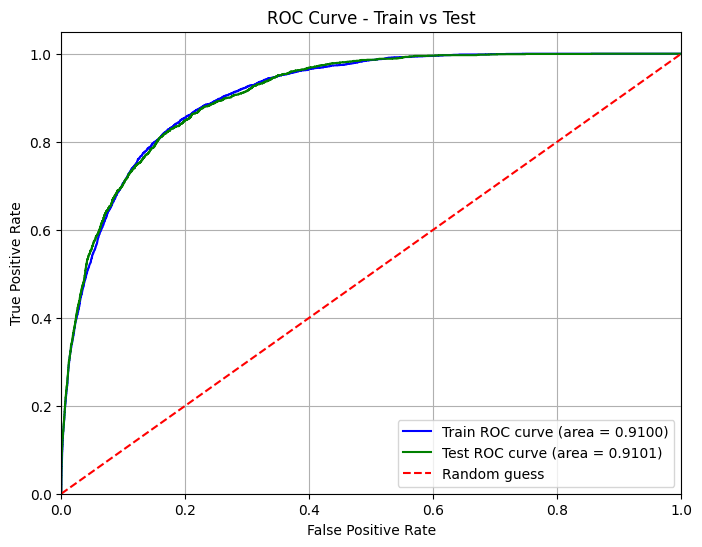

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (area = {roc_auc_train:.4f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (area = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train vs Test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

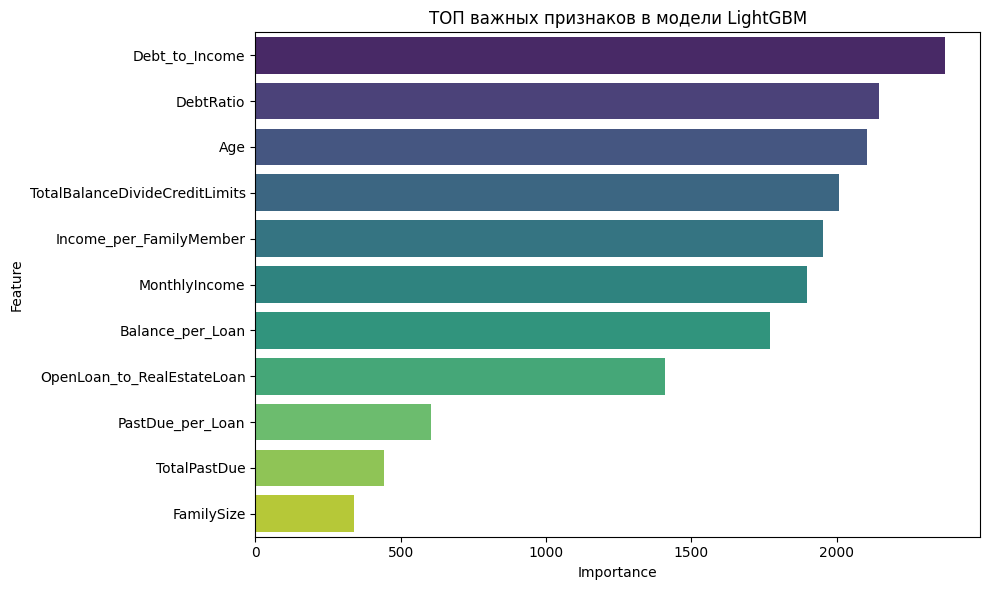

In [52]:
importances = model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(30), x='Importance', y='Feature', palette='viridis')
plt.title('ТОП важных признаков в модели LightGBM')
plt.tight_layout()
plt.show()

In [34]:
import pickle

# Сохраняем обученную модель в файл
with open('best_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Модель успешно сохранена в файл 'best_model.pkl'")

# Пример загрузки модели в будущем
with open('best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


Модель успешно сохранена в файл 'best_model.pkl'


За итоговую модель возьмем градиентный бустинг, так как он показал лучшие результаты

In [30]:
y_prob_kaggle = best_model.predict_proba(test_data[X.columns])[:, 1]


submission = pd.DataFrame({
    'ID': test_data['ID'],  # ID из тестовых данных
    'Target': y_prob_kaggle  # Предсказания вероятности положительного класса
})

# Сохраняем сабмит в файл
submission.to_csv('submission69.csv', index=False)

NameError: name 'test_data' is not defined